In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
# from sklearn.impute import KNNImputer

# !pip install --upgrade gdown
# !gdown --fuzzy https://docs.google.com/spreadsheets/d/11O5QtnXeVyLoaOd0QuoZtltw_tXbVW8SCDLAeTVjdjU

# Load the Excel file
# file_path = 'properties.xlsx'

# Read the file into a DataFrame
# !gdown 11O5QtnXeVyLoaOd0QuoZtltw_tXbVW8SCDLAeTVjdjU
df = pd.read_excel('properties.xlsx')

df = df.drop_duplicates()
# Display the DataFrame
print(df)

Downloading...
From (original): https://drive.google.com/uc?id=11O5QtnXeVyLoaOd0QuoZtltw_tXbVW8SCDLAeTVjdjU
From (redirected): https://docs.google.com/spreadsheets/d/11O5QtnXeVyLoaOd0QuoZtltw_tXbVW8SCDLAeTVjdjU/export?format=xlsx
To: /content/properties.xlsx
6.19MB [00:00, 128MB/s]
          ID   Possession Status Availability Starts From Floor No Commercial  \
0      12685  Under Construction                  Dec '25        5          N   
1      12684       Ready to Move                      NaN       20          Y   
2      12683       Ready to Move                      NaN       18          N   
3      12682  Under Construction                  Dec '25        5          N   
4      12681  Under Construction                  Dec '24        8          Y   
...      ...                 ...                      ...      ...        ...   
12680      5             Dec '26                  Dec '26      NaN          Y   
12681      4  Under Construction                  Mar '26       10   

In [ ]:
df.head()

ID   Possession Status Availability Starts From Floor No Commercial  \
0  12685  Under Construction                  Dec '25        5          N   
1  12684       Ready to Move                      NaN       20          Y   
2  12683       Ready to Move                      NaN       18          N   
3  12682  Under Construction                  Dec '25        5          N   
4  12681  Under Construction                  Dec '24        8          Y   

                               Developer Approved Authority Name  \
0                                    NaN                    KDMC   
1  TATA Housing Development Company Ltd.                     TMC   
2                  Sai Satyam Developers                    KDMC   
3                          Birla Estates                    KDMC   
4                      Godrej Properties                     NaN   

   Units Available      Price Price (English)  ... Rentable CommuniPfty Space  \
0              1.0  3150000.0        31.5 Lac  ...                          1   
1             10.0  6300000.0          63 Lac  ...                          1   
2              0.0  5400000.0          54 Lac  ...                          1   
3             70.0  9000000.0          90 Lac  ...                          1   
4              NaN  4950000.0        49.5 Lac  ...                          1   

  Retail Boulevard (Retail Shops) Cycling & Jogging Track  \
0                               1                       1   
1                               1                       1   
2                               1                       1   
3                               1                       1   
4                               1                       1   

   Fire Fighting Equipment  Aesthetically designed landscape garden  \
0                        1                                        1   
1                        1                                        1   
2                        1                                        1   
3                        1                                        1   
4                        1                                        1   

  Possession By  NRI Pref Land Area / Covered Area  Land Area Unit  \
0           NaN       NaN                      NaN             NaN   
1           NaN       NaN                      NaN             NaN   
2           NaN         Y                      NaN             NaN   
3           NaN       NaN                      NaN             NaN   
4           NaN       NaN                      NaN             NaN   

   Pantry Type  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 145 columns]

In [ ]:
df.describe()

ID  Units Available         Price  Maintenance Charges  \
count  12685.000000      6135.000000  1.260100e+04         6.283000e+03   
mean    6343.000000         7.751589  2.640261e+07         9.076812e+03   
std     3661.988417        26.335448  3.653648e+08         2.399983e+05   
min        1.000000         0.000000  1.000000e+05         0.000000e+00   
25%     3172.000000         0.000000  7.000000e+06         1.000000e+01   
50%     6343.000000         1.000000  1.350000e+07         2.500000e+03   
75%     9514.000000         5.000000  2.550000e+07         6.000000e+03   
max    12685.000000       750.000000  4.080000e+10         1.768000e+07   

       Booking Amount  Covered Area    sqft Price   Carpet Area      Bathroom  \
count    7.701000e+03  11374.000000  1.148000e+04  10133.000000  12616.000000   
mean     8.101702e+05   1037.746439  2.243507e+04    819.201224      2.143389   
std      2.997549e+06    727.327389  3.187654e+05    585.037811      0.926965   
min      0.000000e+00     10.000000  0.000000e+00      2.000000      1.000000   
25%      1.000000e+05    605.500000  1.000000e+04    468.000000      2.000000   
50%      5.000000e+05    850.000000  1.634850e+04    671.000000      2.000000   
75%      9.000000e+05   1200.000000  2.461500e+04    950.000000      2.000000   
max      1.050000e+08  15006.000000  3.400000e+07  20870.000000     10.000000   

            bedroom  ...  Meditation Area  Multipurpose Courts  \
count  12685.000000  ...     12685.000000         12685.000000   
mean       1.987150  ...         0.540402             0.540323   
std        0.943404  ...         0.498385             0.498391   
min        1.000000  ...         0.000000             0.000000   
25%        1.000000  ...         0.000000             0.000000   
50%        2.000000  ...         1.000000             1.000000   
75%        3.000000  ...         1.000000             1.000000   
max        6.000000  ...         1.000000             1.000000   

       Recreational Pool  Rentable CommuniPfty Space  \
count       12685.000000                12685.000000   
mean            0.536539                    0.536855   
std             0.498683                    0.498660   
min             0.000000                    0.000000   
25%             0.000000                    0.000000   
50%             1.000000                    1.000000   
75%             1.000000                    1.000000   
max             1.000000                    1.000000   

       Retail Boulevard (Retail Shops)  Cycling & Jogging Track  \
count                     12685.000000             12685.000000   
mean                          0.537958                 0.540166   
std                           0.498577                 0.498404   
min                           0.000000                 0.000000   
25%                           0.000000                 0.000000   
50%                           1.000000                 1.000000   
75%                           1.000000                 1.000000   
max                           1.000000                 1.000000   

       Fire Fighting Equipment  Aesthetically designed landscape garden  \
count             12685.000000                             12685.000000   
mean                  0.544028                                 0.536382   
std                   0.498077                                 0.498694   
min                   0.000000                                 0.000000   
25%                   0.000000                                 0.000000   
50%                   1.000000                                 1.000000   
75%                   1.000000                                 1.000000   
max                   1.000000                                 1.000000   

       Land Area / Covered Area  Land Area Unit  
count                 84.000000       86.000000  
mean                7248.869048    12847.825581  
std                18240.893916       10.643078  
min                    1.000000

In [ ]:
df.info(verbose=True, show_counts=True, memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12685 entries, 0 to 12684
Data columns (total 145 columns):
 #    Column                                   Non-Null Count  Dtype  
---   ------                                   --------------  -----  
 0    ID                                       12685 non-null  int64  
 1    Possession Status                        12607 non-null  object 
 2    Availability Starts From                 3083 non-null   object 
 3    Floor No                                 11827 non-null  object 
 4    Commercial                               12685 non-null  object 
 5    Developer                                7006 non-null   object 
 6    Approved Authority Name                  6143 non-null   object 
 7    Units Available                          6135 non-null   float64
 8    Price                                    12601 non-null  float64
 9    Price (English)                          12685 non-null  object 
 10   Flooring Type                   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12685 entries, 0 to 12684
Data columns (total 129 columns):
 #    Column                                   Non-Null Count  Dtype  
---   ------                                   --------------  -----  
 0    ID                                       12685 non-null  int64  
 1    Possession Status                        12607 non-null  object 
 2    Availability Starts From                 3083 non-null   object 
 3    Floor No                                 11827 non-null  object 
 4    Commercial                               12685 non-null  object 
 5    Developer                                7006 non-null   object 
 6    Approved Authority Name                  6143 non-null   object 
 7    Units Available                          6135 non-null   float64
 8    Price                                    12685 non-null  object 
 9    Flooring Type                            8151 non-null   object 
 10   Electricity Status              

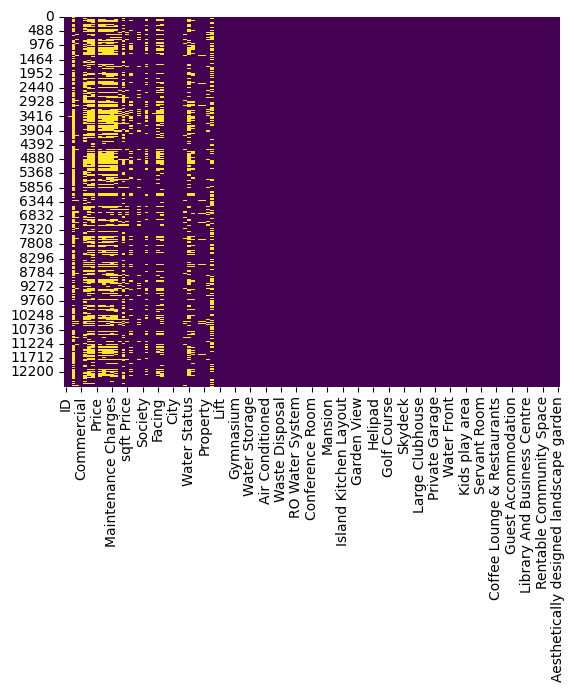

In [ ]:
df2 = df.drop(columns=["Price", "Landmark", "Property Uniqueness", "Parking", "Floor Data", "Luxury Flat", "Covered Area.1", "Tenants Preference", "isLuxuryServiceProvided", "balconies", "Rera", "Possession By", "NRI Pref",  "Land Area / Covered Area", "Land Area Unit", "Pantry Type"]).copy()
df2.rename(columns={'floors': 'Floors', "Price (English)": "Price", 'bedroom': 'Bedroom', 'Parking.1': 'Parking', 'Rentable CommuniPfty Space': 'Rentable Community Space'}, inplace=True)
df2.info(verbose=True, show_counts=True, memory_usage=True)
# Plot missing values heatmap
sns.heatmap(df2.isnull(), cbar=False, cmap='viridis')
plt.show()

# Replace 0 with 'N' and 1 with 'Y' for columns containing only 0 and 1
for column in df2.columns:
    if df2[column].dropna().isin(['N', 'Y']).all():
        df2[column] = df2[column].replace({'N': 0, 'Y': 1})


# Define the mapping dictionary
floor_mapping = {
    'Ground': 0,
    'Lower Basement': -1,
    'Upper Basement': -2
}
# Apply the mapping
df2['Floor No'] = df2['Floor No'].map(floor_mapping).fillna(df2['Floor No'])
# Convert the column to numeric values
df2['Floor No'] = pd.to_numeric(df2['Floor No'])


# Function to extract the first word from a string, handling empty cells
def get_first_word(text):
    if pd.isna(text) or text in ['NA', '']:
        return pd.NA
    words = text.split()
    if words[0].lower() == 'the':
        words = words[1:]
    return words[0] if words else pd.NA

# Apply the function to each cell in the specified columns
df2['Developer'] = df2['Developer'].apply(get_first_word)
df2['Project Name'] = df2['Project Name'].apply(get_first_word)


# Replace values in the 'Possession Status' column
df2['Possession Status'] = df2['Possession Status'].replace({
    'Select Date': 'Under Construction',
    'Immediately': 'Ready to Move'
})


# Drop rows where df['Price'] is 'Call for Price'
df2 = df2[df2['Price'] != 'Call for Price'].copy()

# Function to convert 'Price (English)' to integer
def convert_price(price_str):
    # Split the string into numeric part and unit part
    # print(price_str)
    value, unit = price_str.split()
    # value = float(value)

    # Multiply based on the unit
    if unit == 'Lac':
        return int(float(value) * 1e5)  # 1 Lac = 100,000
    elif unit == 'Cr':
        return int(float(value) * 1e7)  # 1 Cr = 10,000,000

# Apply the conversion function
df2['Price'] = df2['Price'].apply(convert_price)


# # Define a function to parse the date string
# def parse_date(date_str):
#     month_abbr, year = date_str.split()
#     month_abbr = month_abbr[:3]  # Ensure it's the correct format (e.g., 'Jan', 'Feb')
#     year = '20' + year.strip("'")  # Add '20' to the year part
#     return pd.to_datetime(f'{month_abbr} {year}', format='%b %Y')

# # Apply the function to the column
# df2['Availability Starts From'] = df2['Availability Starts From'].apply(parse_date)

# Replace 'NA' with None (which represents missing data)
# df2['Availability Starts From'] = df2['Availability Starts From'].replace('NA', None)

# Convert the data into datetime
df2['Availability Starts From'] = pd.to_datetime(df2['Availability Starts From'], format="%b '%y")

# df2['Availability Starts From'] = df2['Availability Starts From'].replace(None, pd.NA)

In [ ]:
# # 3. Number of Unique Values
# unique_counts = df2.nunique()
# print("Number of unique values per column:")
# print(unique_counts)

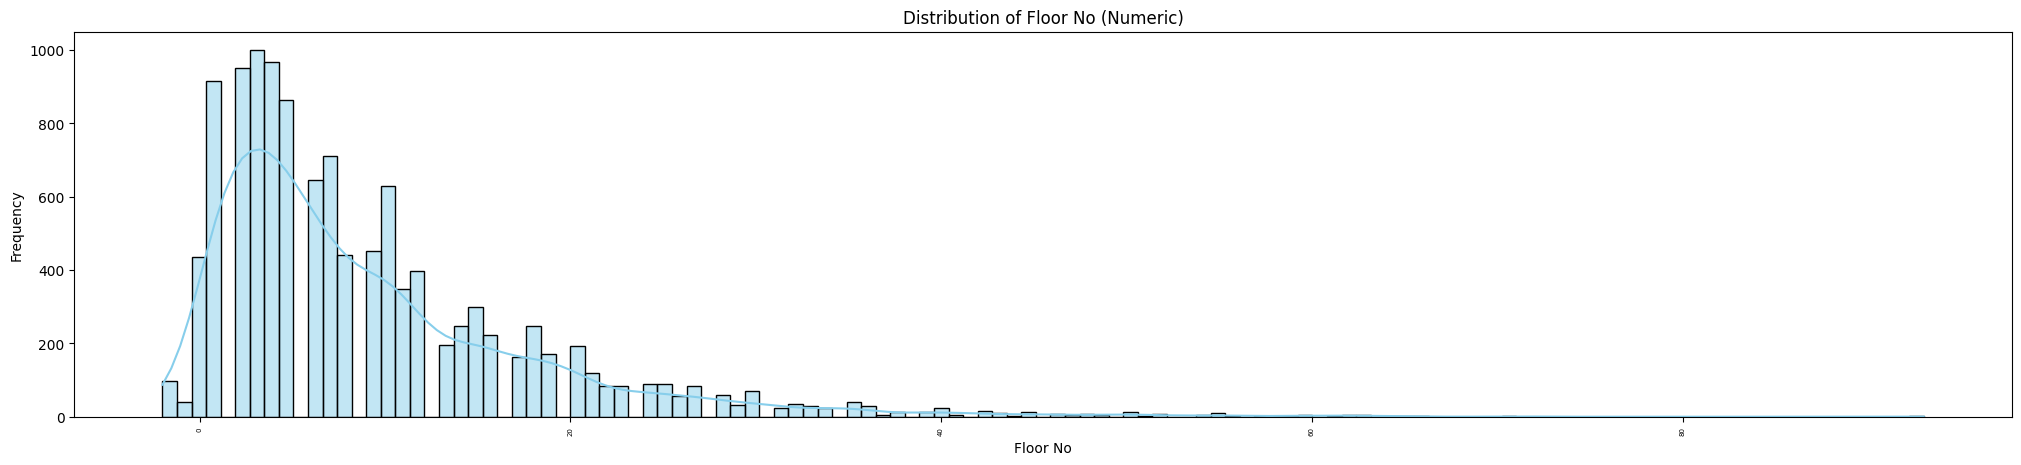


Frequency of values in 'Floor No' (Ascending):
    Floor No  Frequency
0       66.0          1
1       65.0          1
2       93.0          1
3       56.0          1
4       44.0          1
..       ...        ...
66       5.0        863
67       1.0        916
68       2.0        951
69       4.0        967
70       3.0       1000

[71 rows x 2 columns]

Frequency of values in 'Floor No' (Descending):
    Floor No  Frequency
0        3.0       1000
1        4.0        967
2        2.0        951
3        1.0        916
4        5.0        863
..       ...        ...
66      65.0          1
67      44.0          1
68      56.0          1
69      93.0          1
70      66.0          1

[71 rows x 2 columns]




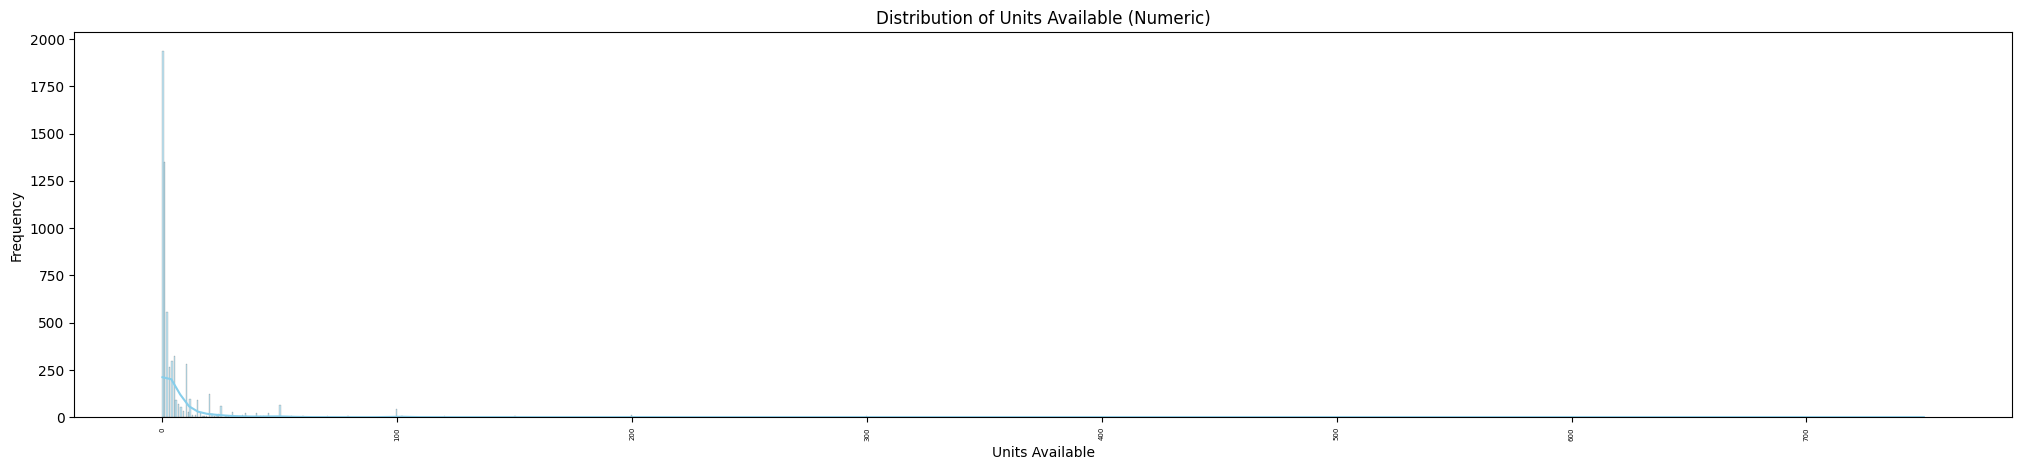


Frequency of values in 'Units Available' (Ascending):
    Units Available  Frequency
0             234.0          1
1              75.0          1
2             650.0          1
3              38.0          1
4              57.0          1
..              ...        ...
78              5.0        325
79              2.0        559
80              1.0       1348
81              0.0       1939
82              NaN       6482

[83 rows x 2 columns]

Frequency of values in 'Units Available' (Descending):
    Units Available  Frequency
0               NaN       6482
1               0.0       1939
2               1.0       1348
3               2.0        559
4               5.0        325
..              ...        ...
78            500.0          1
79             38.0          1
80            650.0          1
81             75.0          1
82            234.0          1

[83 rows x 2 columns]




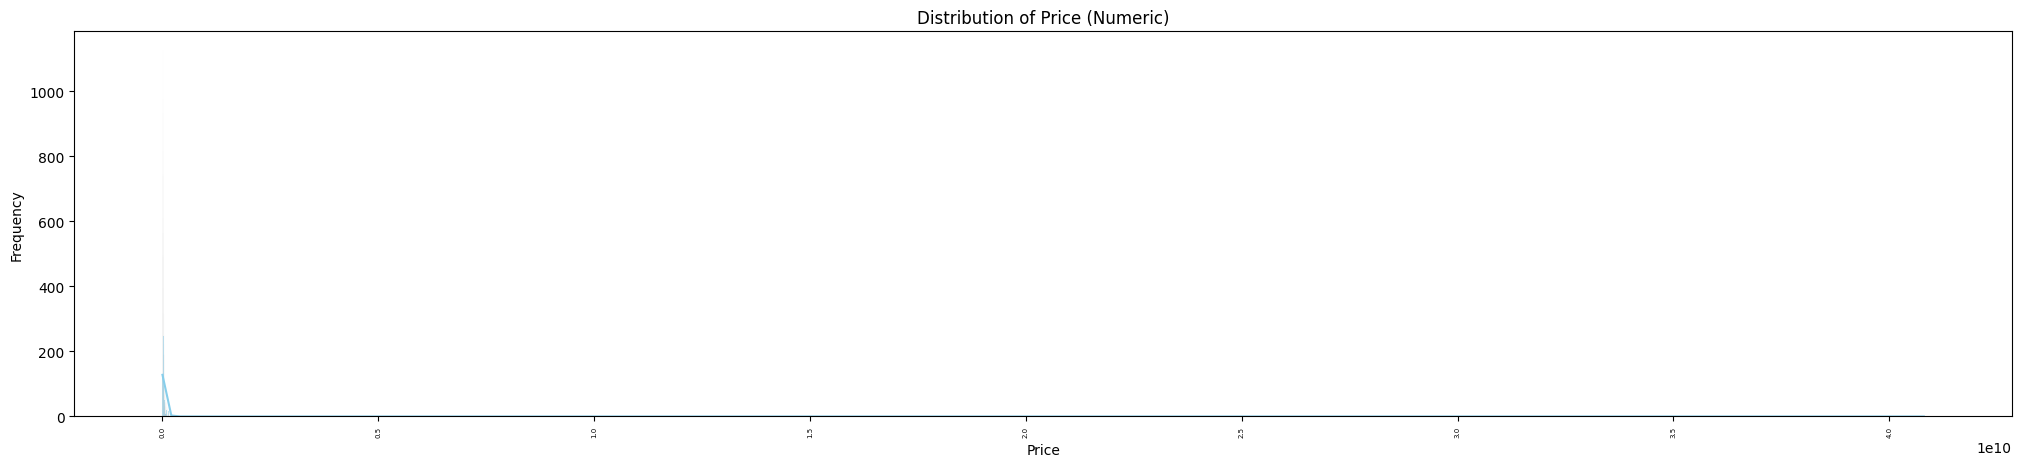


Frequency of values in 'Price' (Ascending):
         Price  Frequency
0     56100000          1
1     59800000          1
2    148000000          1
3     42400000          1
4     89500000          1
..         ...        ...
960   15000000        164
961   12000000        166
962    8500000        178
963    9000000        182
964   11000000        184

[965 rows x 2 columns]

Frequency of values in 'Price' (Descending):
         Price  Frequency
0     11000000        184
1      9000000        182
2      8500000        178
3     12000000        166
4     15000000        164
..         ...        ...
960   89500000          1
961   42400000          1
962  148000000          1
963   59800000          1
964   56100000          1

[965 rows x 2 columns]




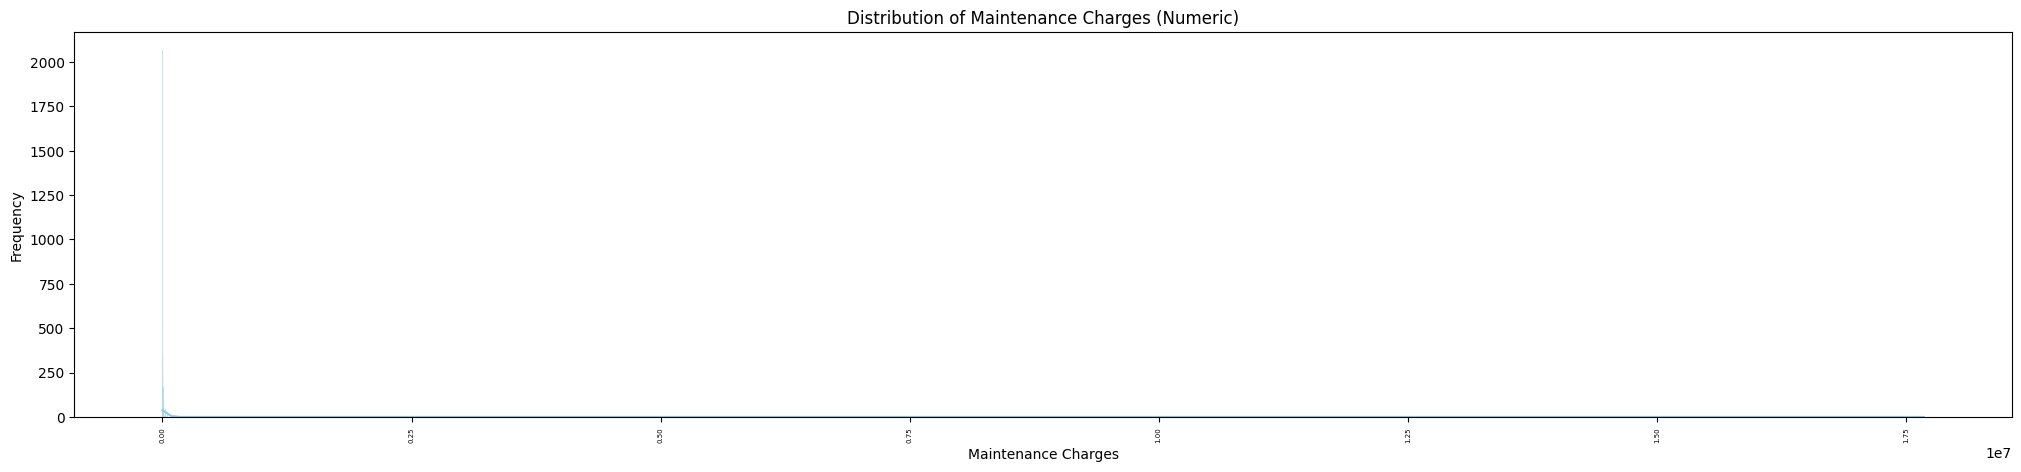


Frequency of values in 'Maintenance Charges' (Ascending):
     Maintenance Charges  Frequency
0                 4260.0          1
1                 6600.0          1
2                 5636.0          1
3                 4145.0          1
4                 1343.0          1
..                   ...        ...
381               2500.0        196
382               2000.0        204
383               5000.0        279
384                  0.0        665
385                  NaN       6320

[386 rows x 2 columns]

Frequency of values in 'Maintenance Charges' (Descending):
     Maintenance Charges  Frequency
0                    NaN       6320
1                    0.0        665
2                 5000.0        279
3                 2000.0        204
4                 2500.0        196
..                   ...        ...
381               4145.0          1
382               5636.0          1
383               6600.0          1
384               4164.0          1
385               4260.0     

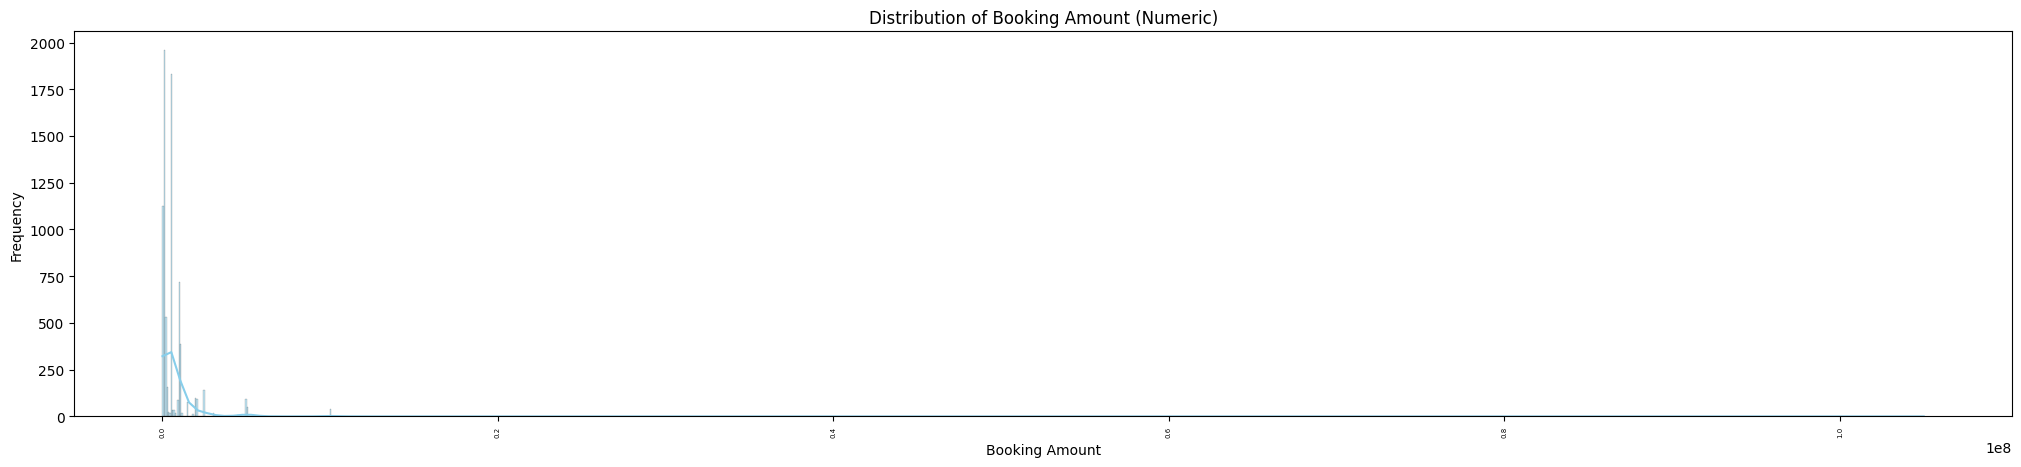


Frequency of values in 'Booking Amount' (Ascending):
     Booking Amount  Frequency
0         3400000.0          1
1         6450000.0          1
2         6800000.0          1
3          825000.0          1
4           90000.0          1
..              ...        ...
208        200000.0        498
209       1000000.0        716
210        100000.0       1817
211        500000.0       1819
212             NaN       4903

[213 rows x 2 columns]

Frequency of values in 'Booking Amount' (Descending):
     Booking Amount  Frequency
0               NaN       4903
1          500000.0       1819
2          100000.0       1817
3         1000000.0        716
4          200000.0        498
..              ...        ...
208         90000.0          1
209        825000.0          1
210       6800000.0          1
211       6450000.0          1
212       3400000.0          1

[213 rows x 2 columns]




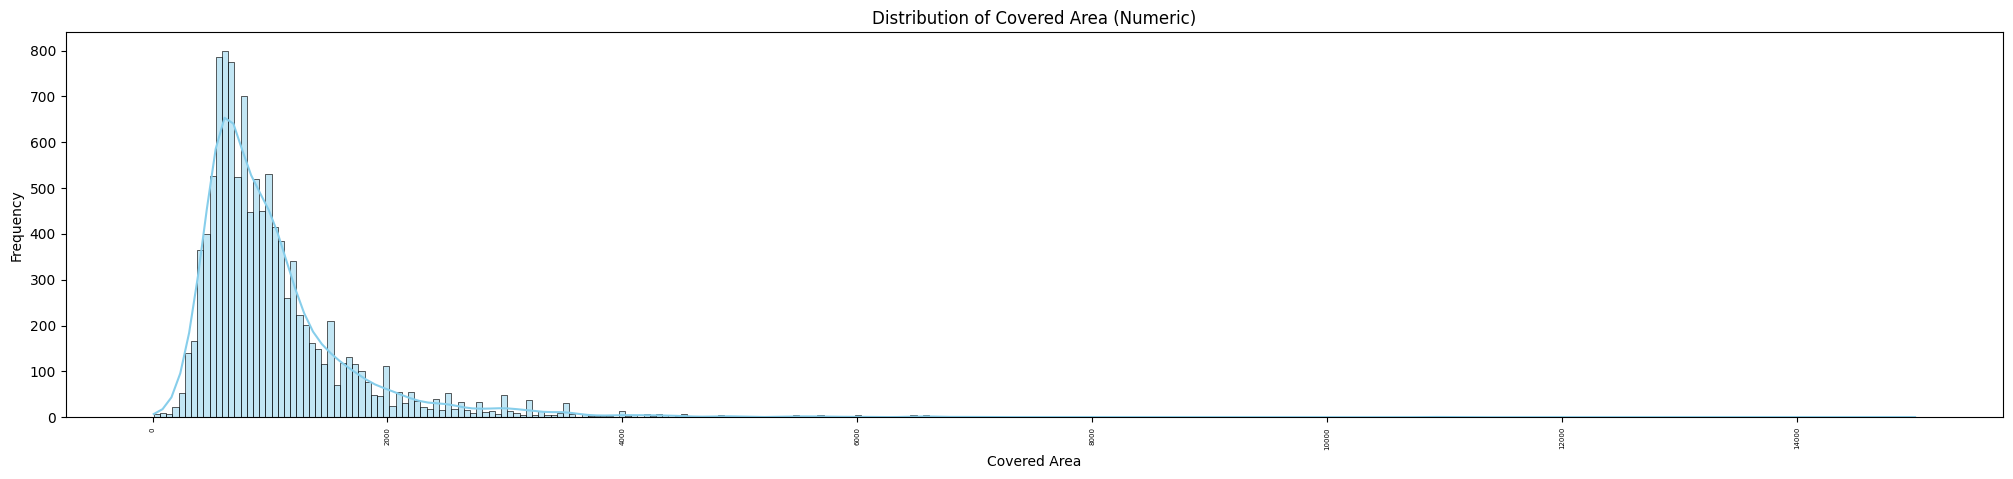


Frequency of values in 'Covered Area' (Ascending):
      Covered Area  Frequency
0            996.0          1
1           1207.0          1
2            803.0          1
3           1241.0          1
4            408.0          1
...            ...        ...
1355        1100.0        213
1356        1000.0        231
1357         600.0        256
1358         650.0        292
1359           NaN       1290

[1360 rows x 2 columns]

Frequency of values in 'Covered Area' (Descending):
      Covered Area  Frequency
0              NaN       1290
1            650.0        292
2            600.0        256
3           1000.0        231
4           1100.0        213
...            ...        ...
1355        1241.0          1
1356         803.0          1
1357        1207.0          1
1358        1808.0          1
1359         996.0          1

[1360 rows x 2 columns]




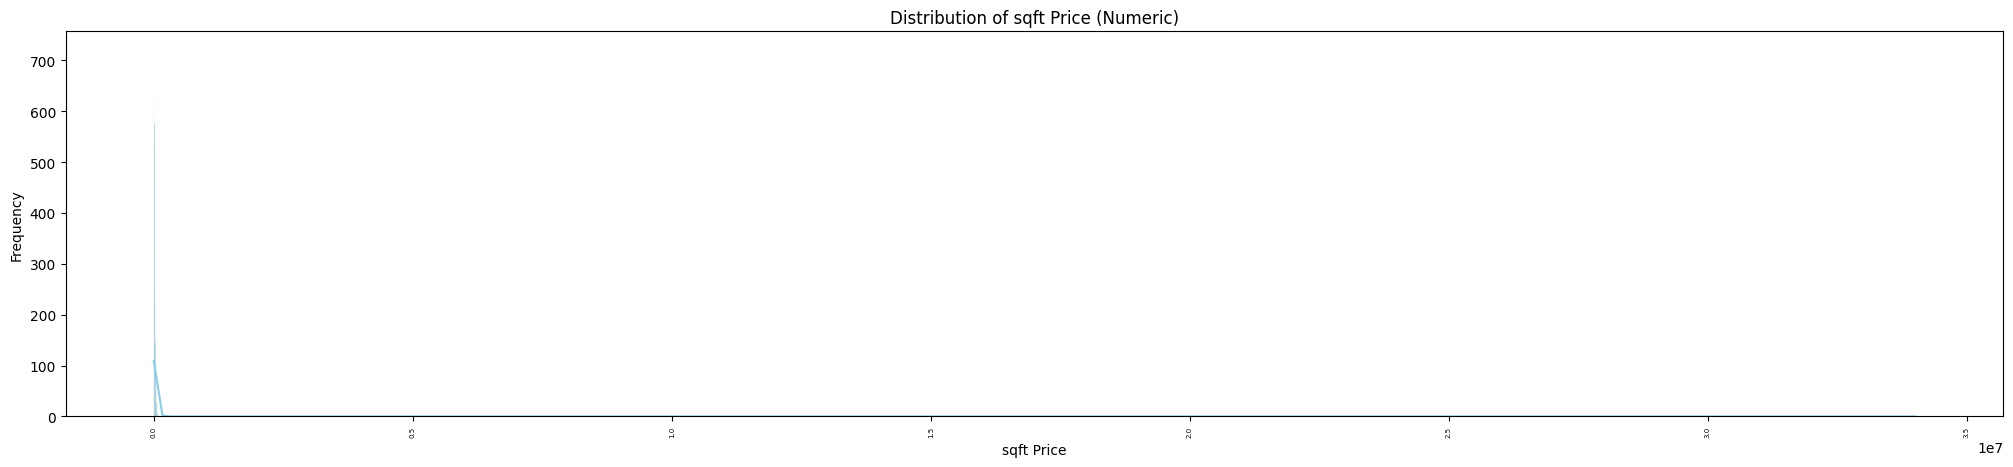


Frequency of values in 'sqft Price' (Ascending):
      sqft Price  Frequency
0        63998.0          1
1        10312.0          1
2        15776.0          1
3        12912.0          1
4        18844.0          1
...          ...        ...
5604     13333.0         56
5605     10000.0         57
5606     25000.0         83
5607     20000.0         90
5608         NaN       1121

[5609 rows x 2 columns]

Frequency of values in 'sqft Price' (Descending):
      sqft Price  Frequency
0            NaN       1121
1        20000.0         90
2        25000.0         83
3        10000.0         57
4        13333.0         56
...          ...        ...
5604     22381.0          1
5605     15470.0          1
5606     14631.0          1
5607     18632.0          1
5608     27007.0          1

[5609 rows x 2 columns]




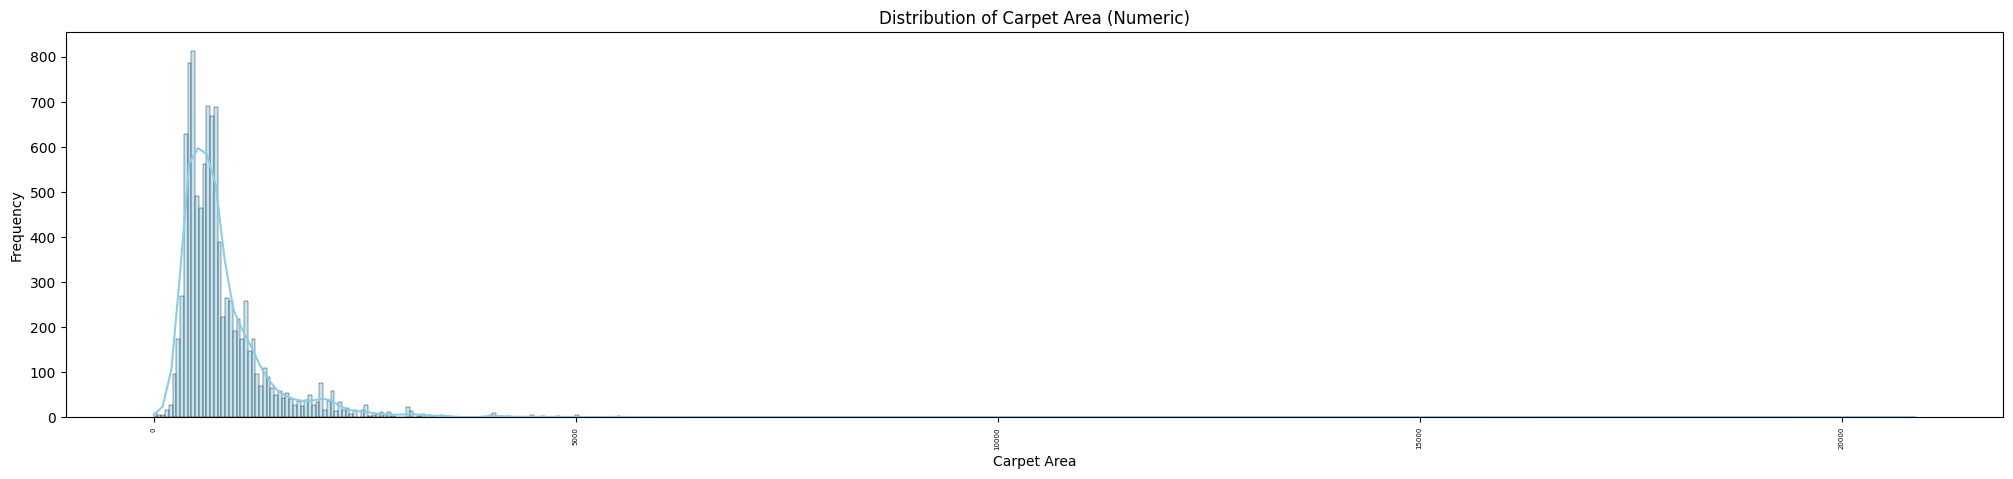


Frequency of values in 'Carpet Area' (Ascending):
      Carpet Area  Frequency
0          1714.0          1
1          2256.0          1
2          1432.0          1
3          1355.0          1
4          1197.0          1
...           ...        ...
1179        700.0        166
1180        650.0        183
1181        750.0        189
1182        450.0        245
1183          NaN       2500

[1184 rows x 2 columns]

Frequency of values in 'Carpet Area' (Descending):
      Carpet Area  Frequency
0             NaN       2500
1           450.0        245
2           750.0        189
3           650.0        183
4           700.0        166
...           ...        ...
1179       1355.0          1
1180       1432.0          1
1181       2256.0          1
1182       1373.0          1
1183       1714.0          1

[1184 rows x 2 columns]




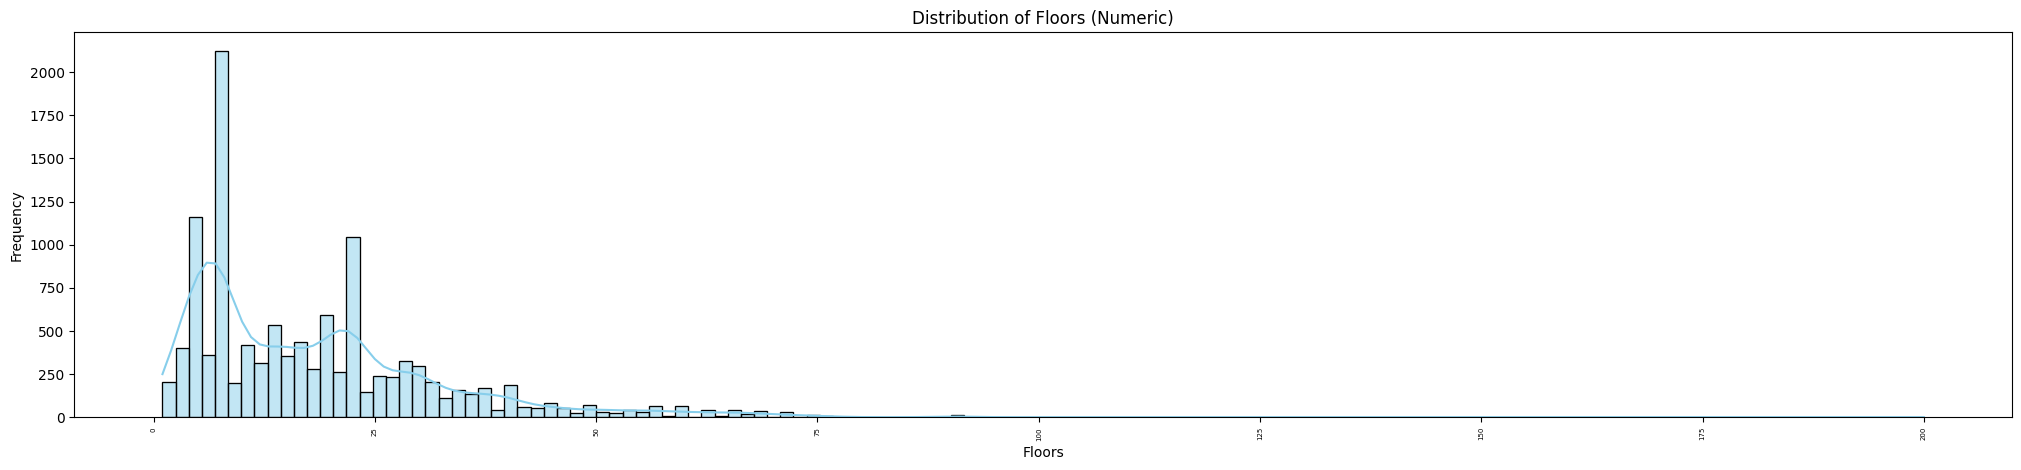


Frequency of values in 'Floors' (Ascending):
    Floors  Frequency
0     74.0          1
1     77.0          1
2     93.0          1
3     71.0          1
4    200.0          1
..     ...        ...
79     8.0        479
80    22.0        640
81     NaN        834
82     4.0        845
83     7.0       1646

[84 rows x 2 columns]

Frequency of values in 'Floors' (Descending):
    Floors  Frequency
0      7.0       1646
1      4.0        845
2      NaN        834
3     22.0        640
4      8.0        479
..     ...        ...
79    77.0          1
80   200.0          1
81    71.0          1
82    93.0          1
83    74.0          1

[84 rows x 2 columns]




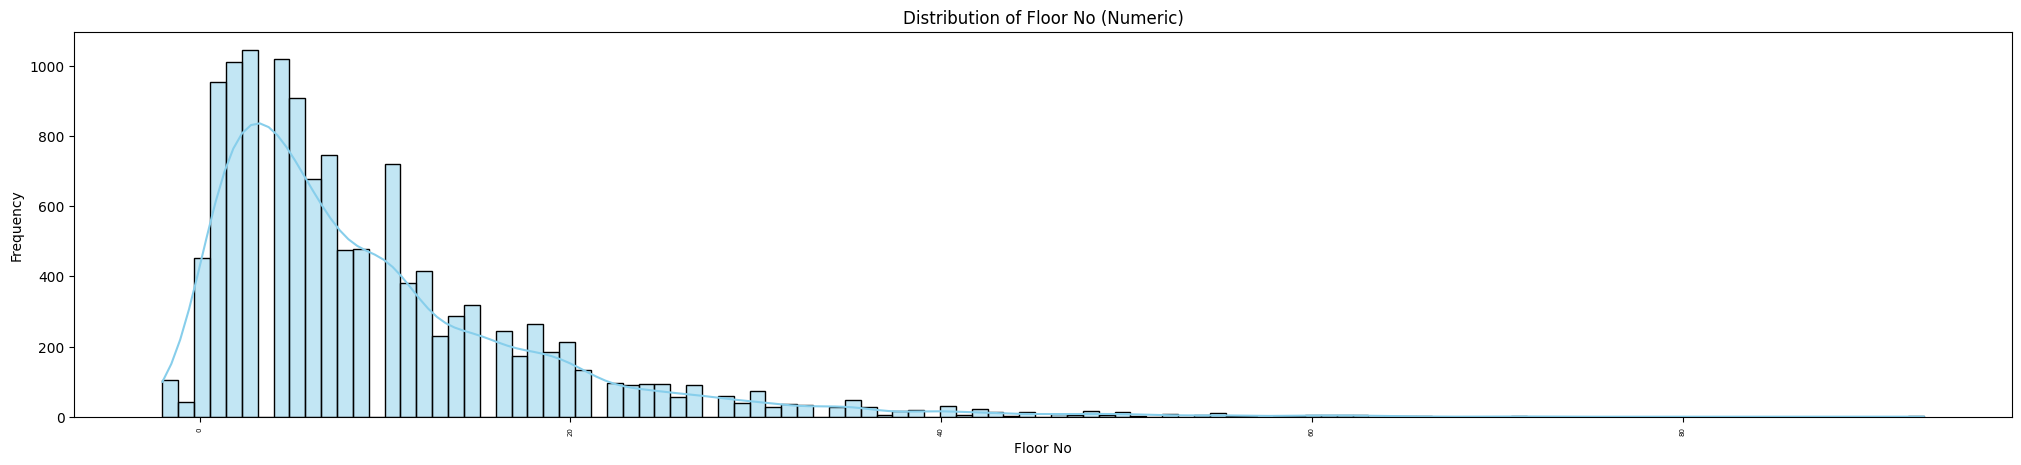


Frequency of values in 'Floor No' (Ascending):
    Floor No  Frequency
0       66.0          1
1       44.0          1
2       93.0          1
3       56.0          1
4       65.0          1
..       ...        ...
65       5.0        908
66       1.0        955
67       2.0       1011
68       4.0       1020
69       3.0       1045

[70 rows x 2 columns]

Frequency of values in 'Floor No' (Descending):
    Floor No  Frequency
0        3.0       1045
1        4.0       1020
2        2.0       1011
3        1.0        955
4        5.0        908
..       ...        ...
65      44.0          1
66      65.0          1
67      56.0          1
68      93.0          1
69      66.0          1

[70 rows x 2 columns]




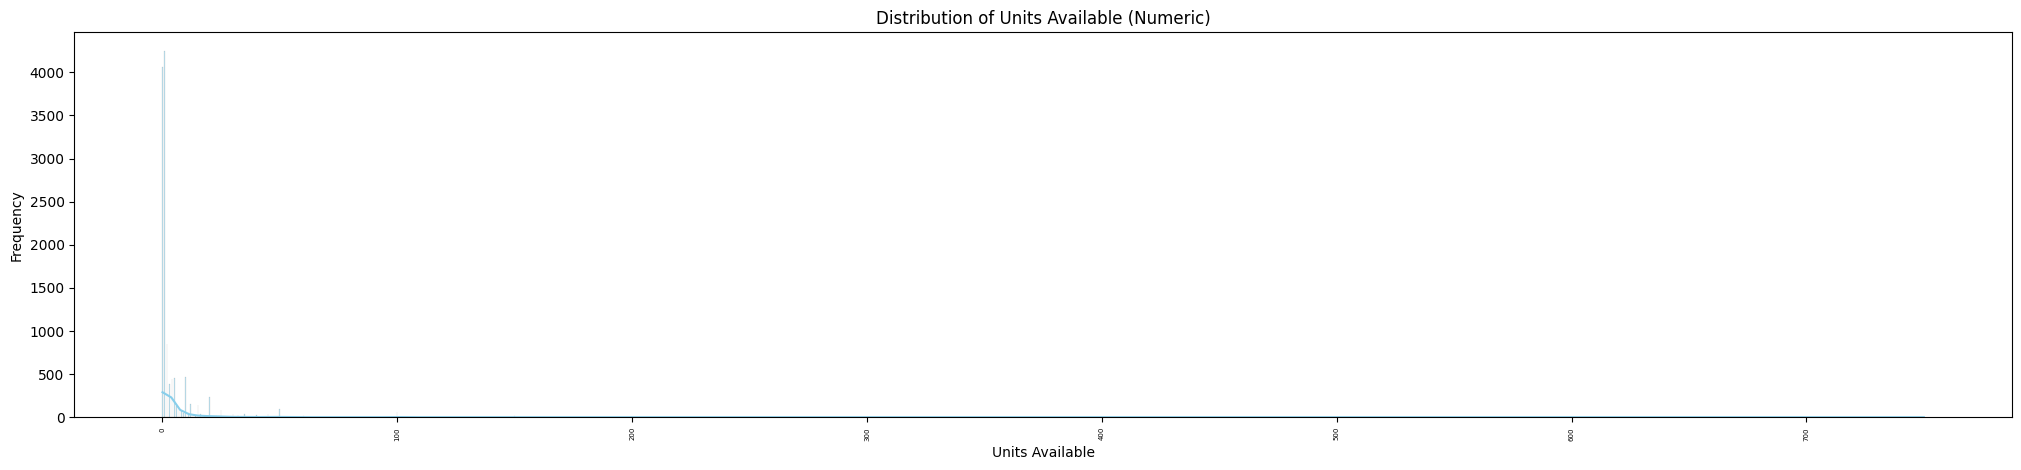


Frequency of values in 'Units Available' (Ascending):
    Units Available  Frequency
0              75.0          1
1             400.0          1
2              49.0          1
3              56.0          1
4             234.0          1
..              ...        ...
77              5.0        459
78             10.0        468
79              2.0        853
80              0.0       4063
81              1.0       4252

[82 rows x 2 columns]

Frequency of values in 'Units Available' (Descending):
    Units Available  Frequency
0               1.0       4252
1               0.0       4063
2               2.0        853
3              10.0        468
4               5.0        459
..              ...        ...
77            101.0          1
78            500.0          1
79             57.0          1
80             38.0          1
81             75.0          1

[82 rows x 2 columns]




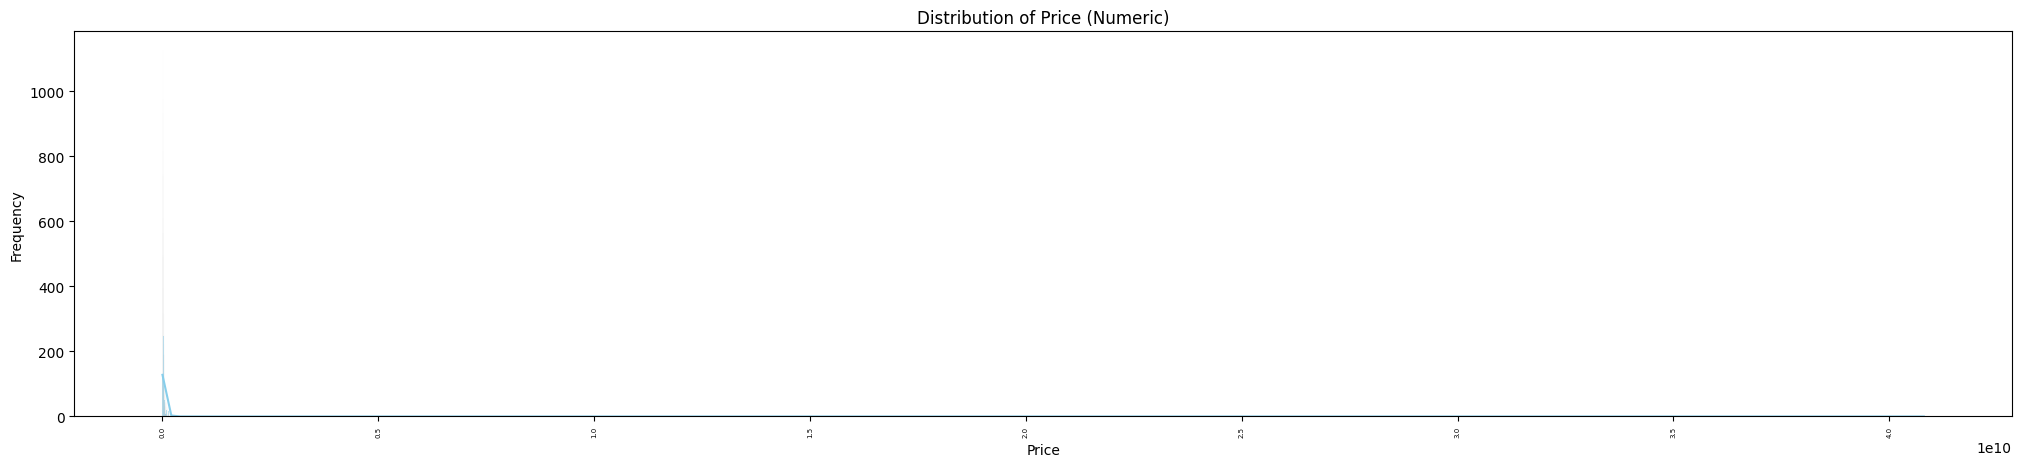


Frequency of values in 'Price' (Ascending):
         Price  Frequency
0     56100000          1
1     59800000          1
2    148000000          1
3     42400000          1
4     89500000          1
..         ...        ...
960   15000000        164
961   12000000        166
962    8500000        178
963    9000000        182
964   11000000        184

[965 rows x 2 columns]

Frequency of values in 'Price' (Descending):
         Price  Frequency
0     11000000        184
1      9000000        182
2      8500000        178
3     12000000        166
4     15000000        164
..         ...        ...
960   89500000          1
961   42400000          1
962  148000000          1
963   59800000          1
964   56100000          1

[965 rows x 2 columns]




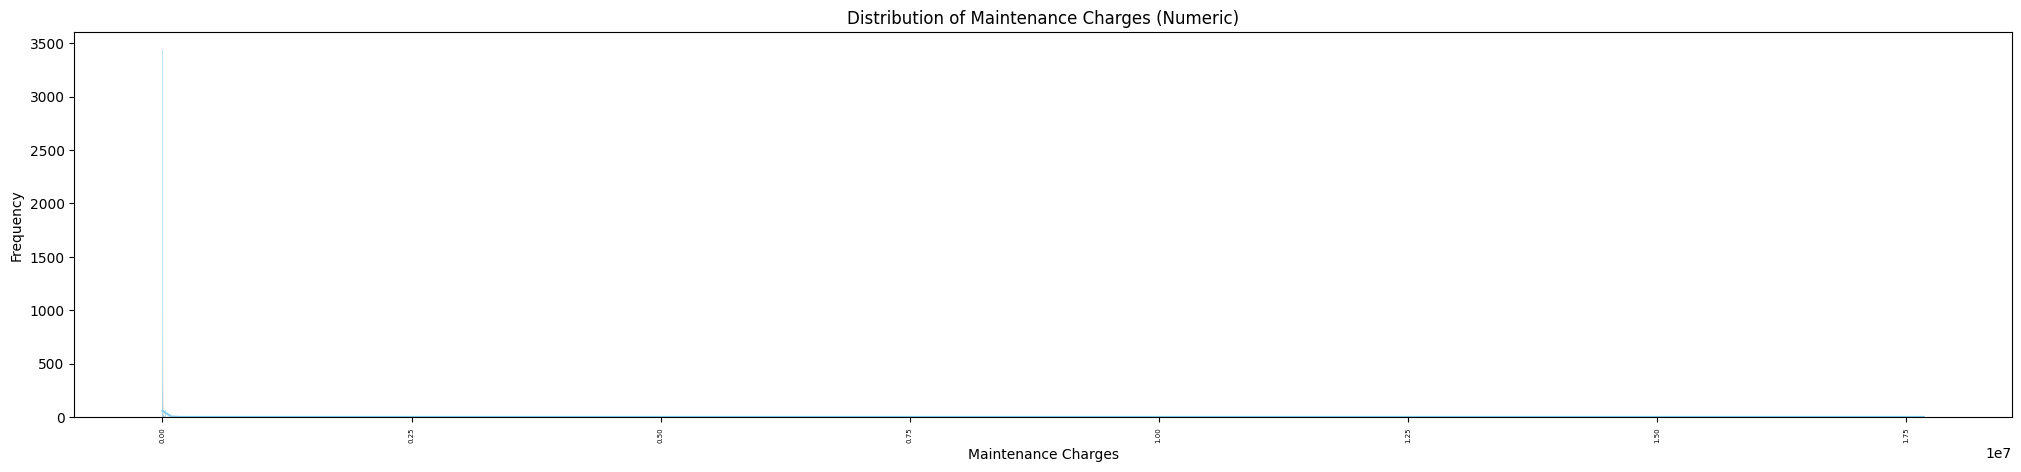


Frequency of values in 'Maintenance Charges' (Ascending):
     Maintenance Charges  Frequency
0                 4260.0          1
1                 8991.0          1
2                13200.0          1
3                 6990.0          1
4                20448.0          1
..                   ...        ...
380                  1.0        399
381               1500.0        449
382               3000.0        459
383               5000.0        529
384                  0.0       1175

[385 rows x 2 columns]

Frequency of values in 'Maintenance Charges' (Descending):
     Maintenance Charges  Frequency
0                    0.0       1175
1                 5000.0        529
2                 3000.0        459
3                 1500.0        449
4                    1.0        399
..                   ...        ...
380              20448.0          1
381               6990.0          1
382              13200.0          1
383               8991.0          1
384               4260.0     

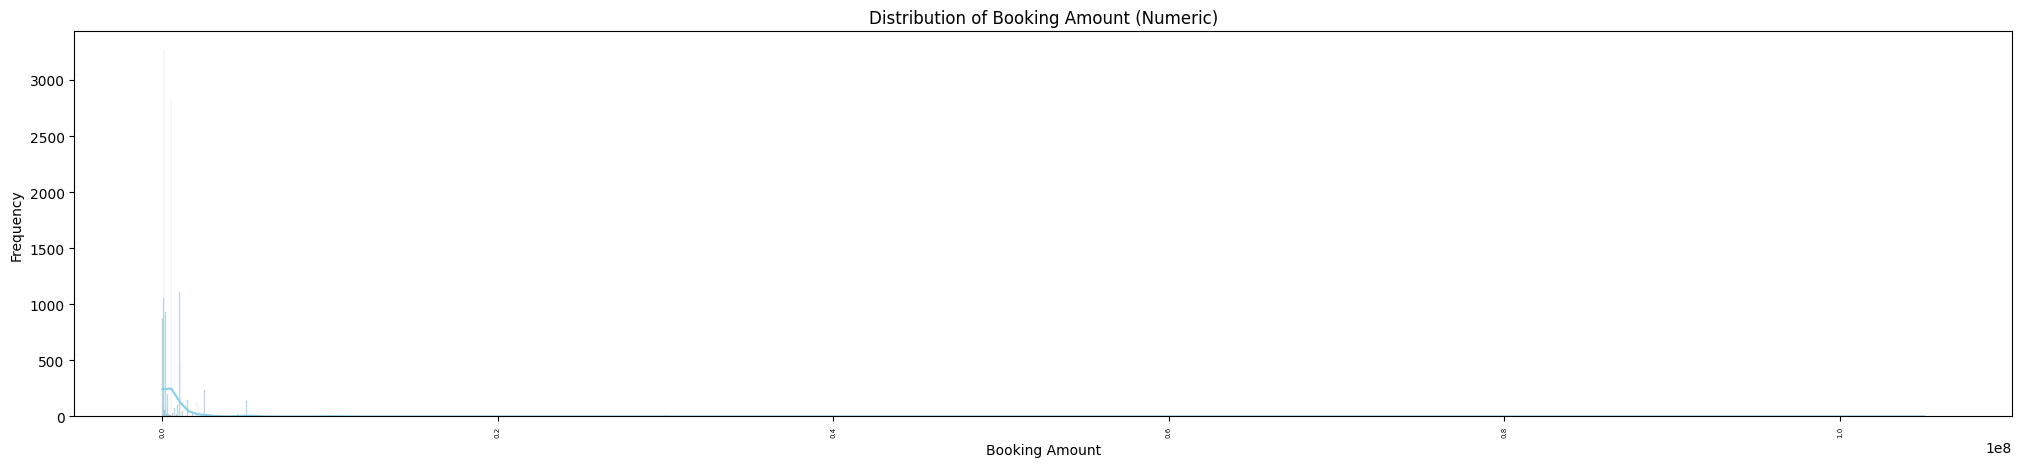


Frequency of values in 'Booking Amount' (Ascending):
     Booking Amount  Frequency
0         3400000.0          1
1         5050000.0          1
2          477000.0          1
3          335000.0          1
4          420000.0          1
..              ...        ...
207         51000.0        561
208        200000.0        916
209       1000000.0       1098
210        500000.0       2830
211        100000.0       3197

[212 rows x 2 columns]

Frequency of values in 'Booking Amount' (Descending):
     Booking Amount  Frequency
0          100000.0       3197
1          500000.0       2830
2         1000000.0       1098
3          200000.0        916
4           51000.0        561
..              ...        ...
207        420000.0          1
208        335000.0          1
209        477000.0          1
210       5050000.0          1
211       3400000.0          1

[212 rows x 2 columns]




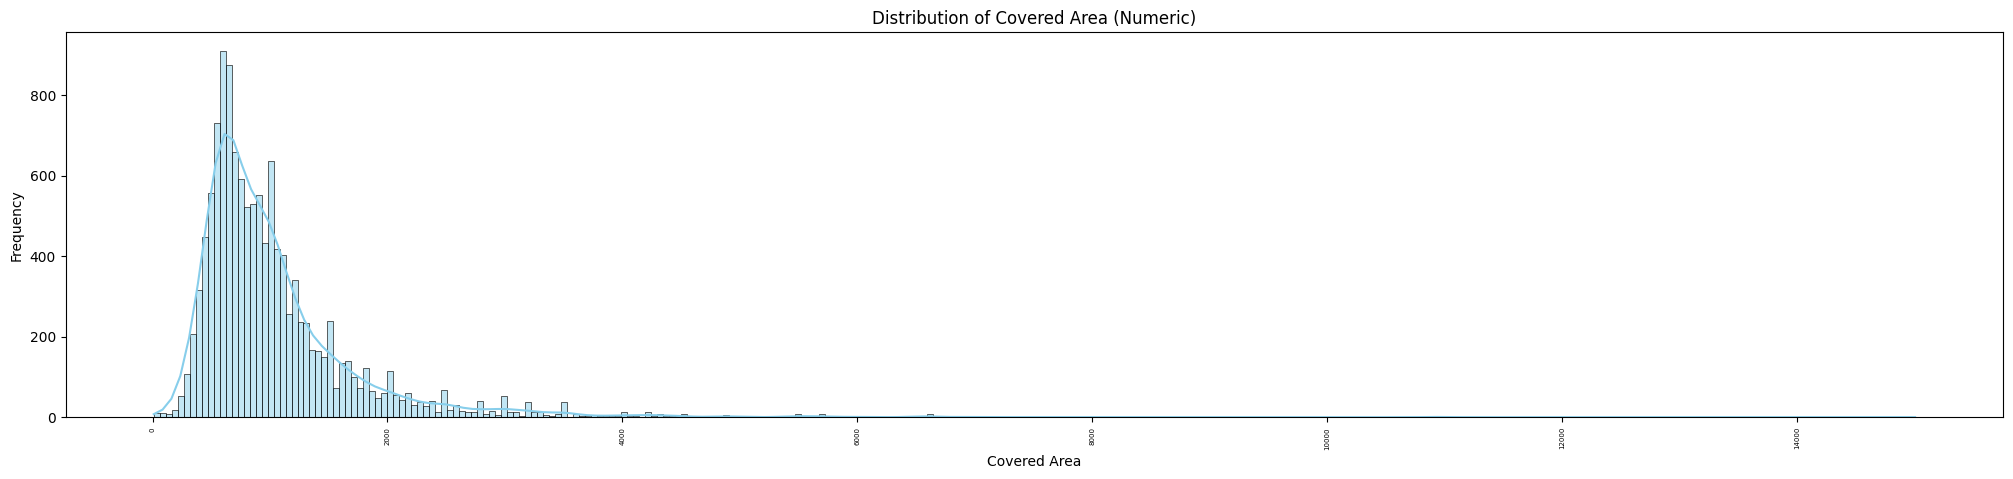


Frequency of values in 'Covered Area' (Ascending):
      Covered Area  Frequency
0           2688.0          1
1           1207.0          1
2           1128.0          1
3           1068.0          1
4           1002.0          1
...            ...        ...
1354         850.0        218
1355        1100.0        222
1356        1000.0        265
1357         600.0        281
1358         650.0        320

[1359 rows x 2 columns]

Frequency of values in 'Covered Area' (Descending):
      Covered Area  Frequency
0            650.0        320
1            600.0        281
2           1000.0        265
3           1100.0        222
4            850.0        218
...            ...        ...
1354        1002.0          1
1355        1068.0          1
1356        1128.0          1
1357        1207.0          1
1358        2688.0          1

[1359 rows x 2 columns]




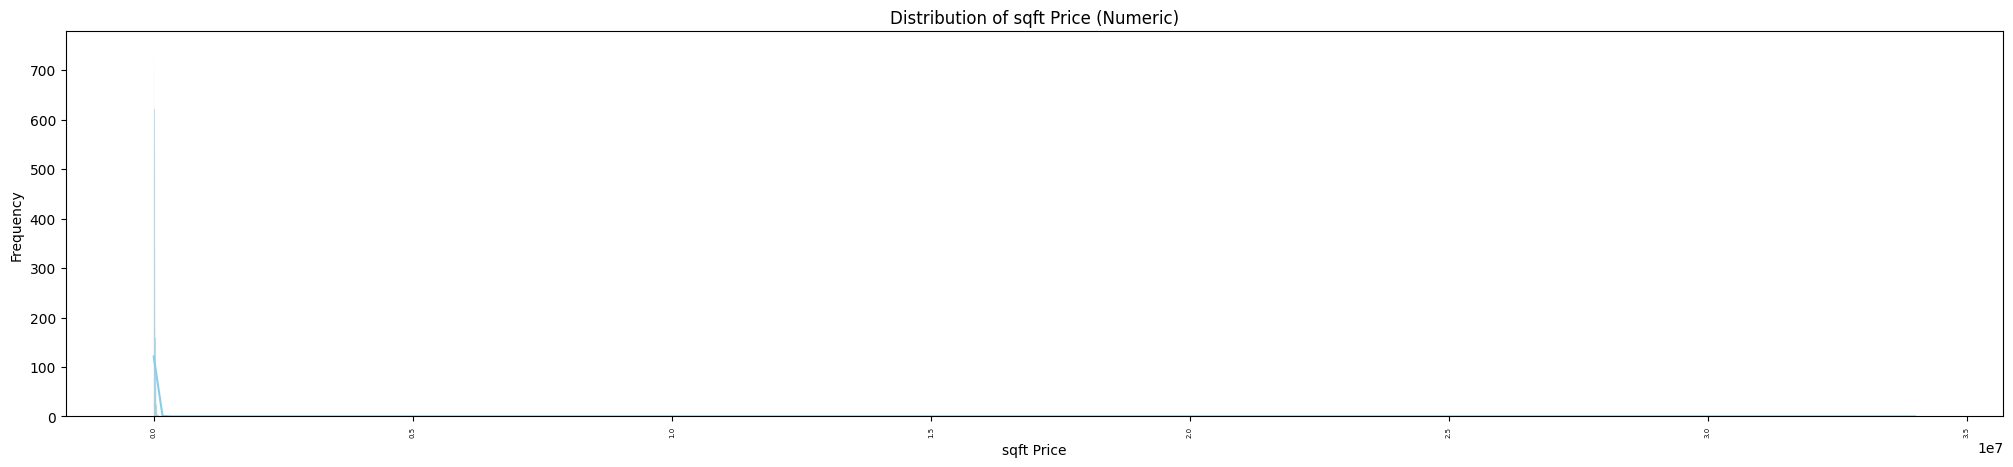


Frequency of values in 'sqft Price' (Ascending):
      sqft Price  Frequency
0        24911.0          1
1        25715.0          1
2        37217.0          1
3        40453.0          1
4        16055.0          1
...          ...        ...
5603      5000.0         52
5604     10000.0         61
5605     13333.0         62
5606     25000.0         87
5607     20000.0        101

[5608 rows x 2 columns]

Frequency of values in 'sqft Price' (Descending):
      sqft Price  Frequency
0        20000.0        101
1        25000.0         87
2        13333.0         62
3        10000.0         61
4         5000.0         52
...          ...        ...
5603     37557.0          1
5604     24479.0          1
5605     31822.0          1
5606     16739.0          1
5607     27007.0          1

[5608 rows x 2 columns]




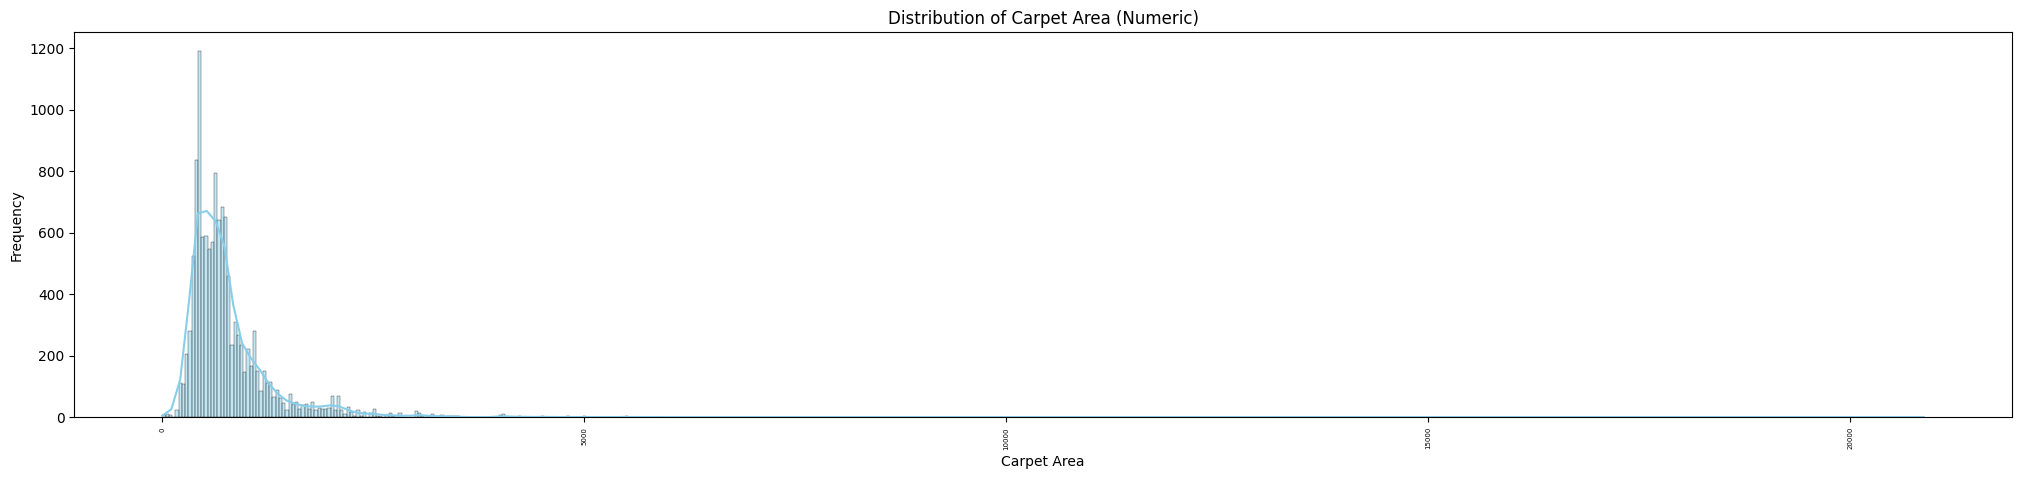


Frequency of values in 'Carpet Area' (Ascending):
      Carpet Area  Frequency
0          1714.0          1
1           989.0          1
2           397.0          1
3          1629.0          1
4           856.0          1
...           ...        ...
1178        600.0        200
1179        700.0        217
1180        650.0        235
1181        750.0        237
1182        450.0        327

[1183 rows x 2 columns]

Frequency of values in 'Carpet Area' (Descending):
      Carpet Area  Frequency
0           450.0        327
1           750.0        237
2           650.0        235
3           700.0        217
4           600.0        200
...           ...        ...
1178       1629.0          1
1179        397.0          1
1180        989.0          1
1181       1001.0          1
1182       1714.0          1

[1183 rows x 2 columns]




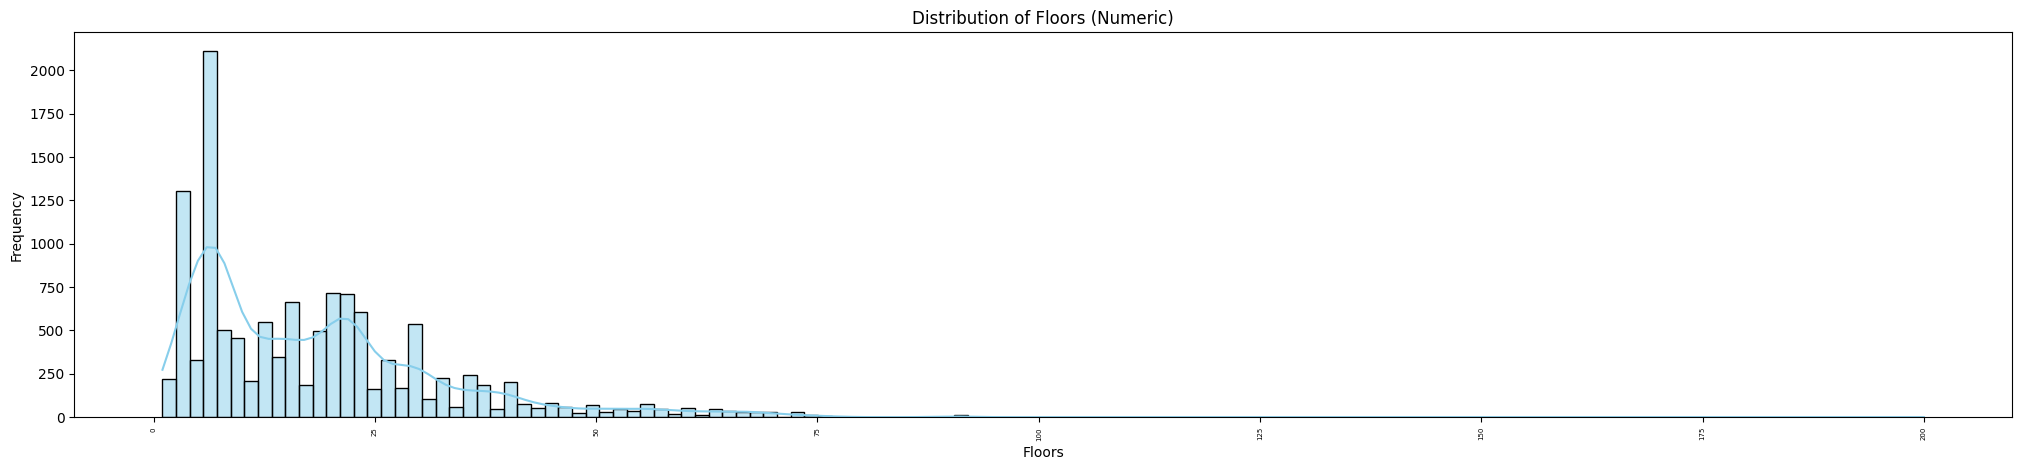


Frequency of values in 'Floors' (Ascending):
    Floors  Frequency
0     74.0          1
1     77.0          1
2     93.0          1
3     71.0          1
4    200.0          1
..     ...        ...
78    23.0        433
79     8.0        502
80    22.0        708
81     4.0        877
82     7.0       1734

[83 rows x 2 columns]

Frequency of values in 'Floors' (Descending):
    Floors  Frequency
0      7.0       1734
1      4.0        877
2     22.0        708
3      8.0        502
4     23.0        433
..     ...        ...
78    77.0          1
79   200.0          1
80    71.0          1
81    93.0          1
82    74.0          1

[83 rows x 2 columns]




In [ ]:
# 1. Distribution Graph for Numeric Data (including NA values)
#     if pd.api.types.is_numeric_dtype(df2[column]):
columns_to_check = ["Floor No", "Units Available", "Price", "Maintenance Charges", "Booking Amount", "Covered Area", "sqft Price", "Carpet Area", "Floors"]

for column in columns_to_check:
    plt.figure(figsize=(25, 5))
    # Include NA values in histogram but they will not be shown in histogram
    # df2[column] = df2[column].fillna(pd.NA)
    # print(column, df2[column].unique().astype(str))
    sns.histplot(df2[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column} (Numeric)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90, fontsize=5)
    # plt.tight_layout()
    plt.show()

# 4. Frequency Table (Ascending Order) including NA
# 5. Frequency Table (Descending Order) including NA
# for column in df2.columns:
    # if pd.api.types.is_numeric_dtype(df2[column]) or pd.api.types.is_object_dtype(df2[column]):
    frequency_table = df2[column].value_counts(dropna=False).sort_values(ascending=True).reset_index()
    frequency_table.columns = [column, 'Frequency']
    print(f"\nFrequency of values in '{column}' (Ascending):")
    print(frequency_table)
    # print()
    frequency_table = df2[column].value_counts(dropna=False).sort_values(ascending=False).reset_index()
    frequency_table.columns = [column, 'Frequency']
    print(f"\nFrequency of values in '{column}' (Descending):")
    print(frequency_table)
    print()
    print()



# Step 1: Check the initial missing values
# print("Initial missing values:")
# print(df2.isna().sum())

# Select only the columns to impute
# Forward fill missing values
# Backward fill missing values (in case there are still NaNs after ffill)
# Update the original DataFrame with filled values
df3 = df2.bfill().ffill().copy()

# Check for missing values after imputation
# missing_values_after = df3.isna().sum()
# print("\nMissing values after imputation:")
# print(missing_values_after)

# # Filter to show only columns with non-zero missing values
# non_zero_missing_after = missing_values_after[missing_values_after > 0]
# print("\nColumns with non-zero missing values after imputation:")
# print(non_zero_missing_after)

# 1. Distribution Graph for Numeric Data (including NA values)
#     if pd.api.types.is_numeric_dtype(df2[column]):

for column in columns_to_check:
    plt.figure(figsize=(25, 5))
    # Include NA values in histogram but they will not be shown in histogram
    # df2[column] = df2[column].fillna(pd.NA)
    # print(column, df2[column].unique().astype(str))
    sns.histplot(df3[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column} (Numeric)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90, fontsize=5)
    # plt.tight_layout()
    plt.show()

# 4. Frequency Table (Ascending Order) including NA
# 5. Frequency Table (Descending Order) including NA
# for column in df2.columns:
    # if pd.api.types.is_numeric_dtype(df2[column]) or pd.api.types.is_object_dtype(df2[column]):
    frequency_table = df3[column].value_counts(dropna=False).sort_values(ascending=True).reset_index()
    frequency_table.columns = [column, 'Frequency']
    print(f"\nFrequency of values in '{column}' (Ascending):")
    print(frequency_table)
    # print()
    frequency_table = df3[column].value_counts(dropna=False).sort_values(ascending=False).reset_index()
    frequency_table.columns = [column, 'Frequency']
    print(f"\nFrequency of values in '{column}' (Descending):")
    print(frequency_table)
    print()
    print()




In [ ]:
# # Apply the outlier removal function to specified columns
# df2 = remove_outliers_zscore(df2, ["Price", "Maintenance Charges", "Booking Amount", "Covered Area", "sqft Price", "Carpet Area"])
# columns_to_check = ["Floor No", "Units Available", "Price", "Maintenance Charges", "Booking Amount", "Covered Area", "sqft Price", "Carpet Area", "Floors"]

# Columns to check for outliers

# Function to remove outliers using Z-Score
def remove_outliers_zscore(df, columns, thresholds):
    df_cleaned = df.copy()

    # Initialize a mask that is True for all rows
    combined_mask = np.ones(df_cleaned.shape[0], dtype=bool)

    for column, threshold in zip(columns, thresholds):
        if pd.api.types.is_numeric_dtype(df_cleaned[column]):
            # Compute Z-scores
            z_scores = np.abs(stats.zscore(df_cleaned[column].dropna()))

            # Align Z-scores with the original DataFrame
            mask = np.ones(df_cleaned.shape[0], dtype=bool)
            mask[df_cleaned[column].notna()] = (z_scores < threshold)

            # Combine the mask with previous masks
            combined_mask &= mask

    # Apply the combined mask to the DataFrame
    df_cleaned = df_cleaned[combined_mask]

    return df_cleaned

# Apply the outlier removal function to specified columns
thresholds = [5,3,3,3,3,5,3,5,5]
df4 = remove_outliers_zscore(df3, columns_to_check, thresholds)





In [ ]:
# 1. Distribution Graph for Numeric Data (including NA values)
#     if pd.api.types.is_numeric_dtype(df2[column]):
for column in columns_to_check:
    plt.figure(figsize=(25, 5))
    # Include NA values in histogram but they will not be shown in histogram
    # df2[column] = df2[column].fillna(pd.NA)
    # print(column, df2[column].unique().astype(str))
    sns.histplot(df4[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column} (Numeric)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90, fontsize=5)
    # plt.tight_layout()
    plt.show()
# 4. Frequency Table (Ascending Order) including NA
# 5. Frequency Table (Descending Order) including NA
# for column in df2.columns:
    # if pd.api.types.is_numeric_dtype(df2[column]) or pd.api.types.is_object_dtype(df2[column]):
    frequency_table = df4[column].value_counts(dropna=False).sort_values(ascending=True).reset_index()
    frequency_table.columns = [column, 'Frequency']
    print(f"\nFrequency of values in '{column}' (Ascending):")
    print(frequency_table)
    # print()
    frequency_table = df4[column].value_counts(dropna=False).sort_values(ascending=False).reset_index()
    frequency_table.columns = [column, 'Frequency']
    print(f"\nFrequency of values in '{column}' (Descending):")
    print(frequency_table)
    print()
    print()

# # 2. Count Graph for Non-Numeric Data (including NA values)
# # for column in df.columns:
for column in df3.columns:
    if column not in columns_to_check:
#     # if not pd.api.types.is_numeric_dtype(df2[column]):
#     else:
        plt.figure(figsize=(25, 5))
        # print(column, df2[column].unique().astype(str))
        # Count plot for categorical data including NA values
        df4[column] = df4[column].fillna(pd.NA)
        sns.countplot(x=df4[column], color='skyblue', order=df4[column].value_counts().index)
        # sns.countplot(x=df2[column], color='skyblue', order=sorted(df2[column].unique().astype(str)))
        plt.title(f'Bar Plot of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=90, fontsize=5)
        # plt.tight_layout()
        plt.show()

    # 4. Frequency Table (Ascending Order) including NA
    # 5. Frequency Table (Descending Order) including NA
    # for column in df2.columns:
        # if pd.api.types.is_numeric_dtype(df2[column]) or pd.api.types.is_object_dtype(df2[column]):
        frequency_table = df4[column].value_counts(dropna=False).sort_values(ascending=True).reset_index()
        frequency_table.columns = [column, 'Frequency']
        print(f"\nFrequency of values in '{column}' (Ascending):")
        print(frequency_table)
        # print()
        frequency_table = df4[column].value_counts(dropna=False).sort_values(ascending=False).reset_index()
        frequency_table.columns = [column, 'Frequency']
        print(f"\nFrequency of values in '{column}' (Descending):")
        print(frequency_table)
        print()



Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Convert these columns from float64 to int64
# df2[["Floor No", "Units Available", "Price", "Maintenance Charges", "Booking Amount", "Covered Area", "sqft Price", "Carpet Area", "Floors"]] = df2[["Floor No", "Units Available", "Price", "Maintenance Charges", "Booking Amount", "Covered Area", "sqft Price", "Carpet Area", "Floors"]].astype('int64')
# df2['Bedroom'] = df2['Bedroom'].astype('float64')

# print(df.info(verbose=True, show_counts=True, memory_usage=True),df2.info(verbose=True, show_counts=True, memory_usage=True),df3.info(verbose=True, show_counts=True, memory_usage=True),df4.info(verbose=True, show_counts=True, memory_usage=True))

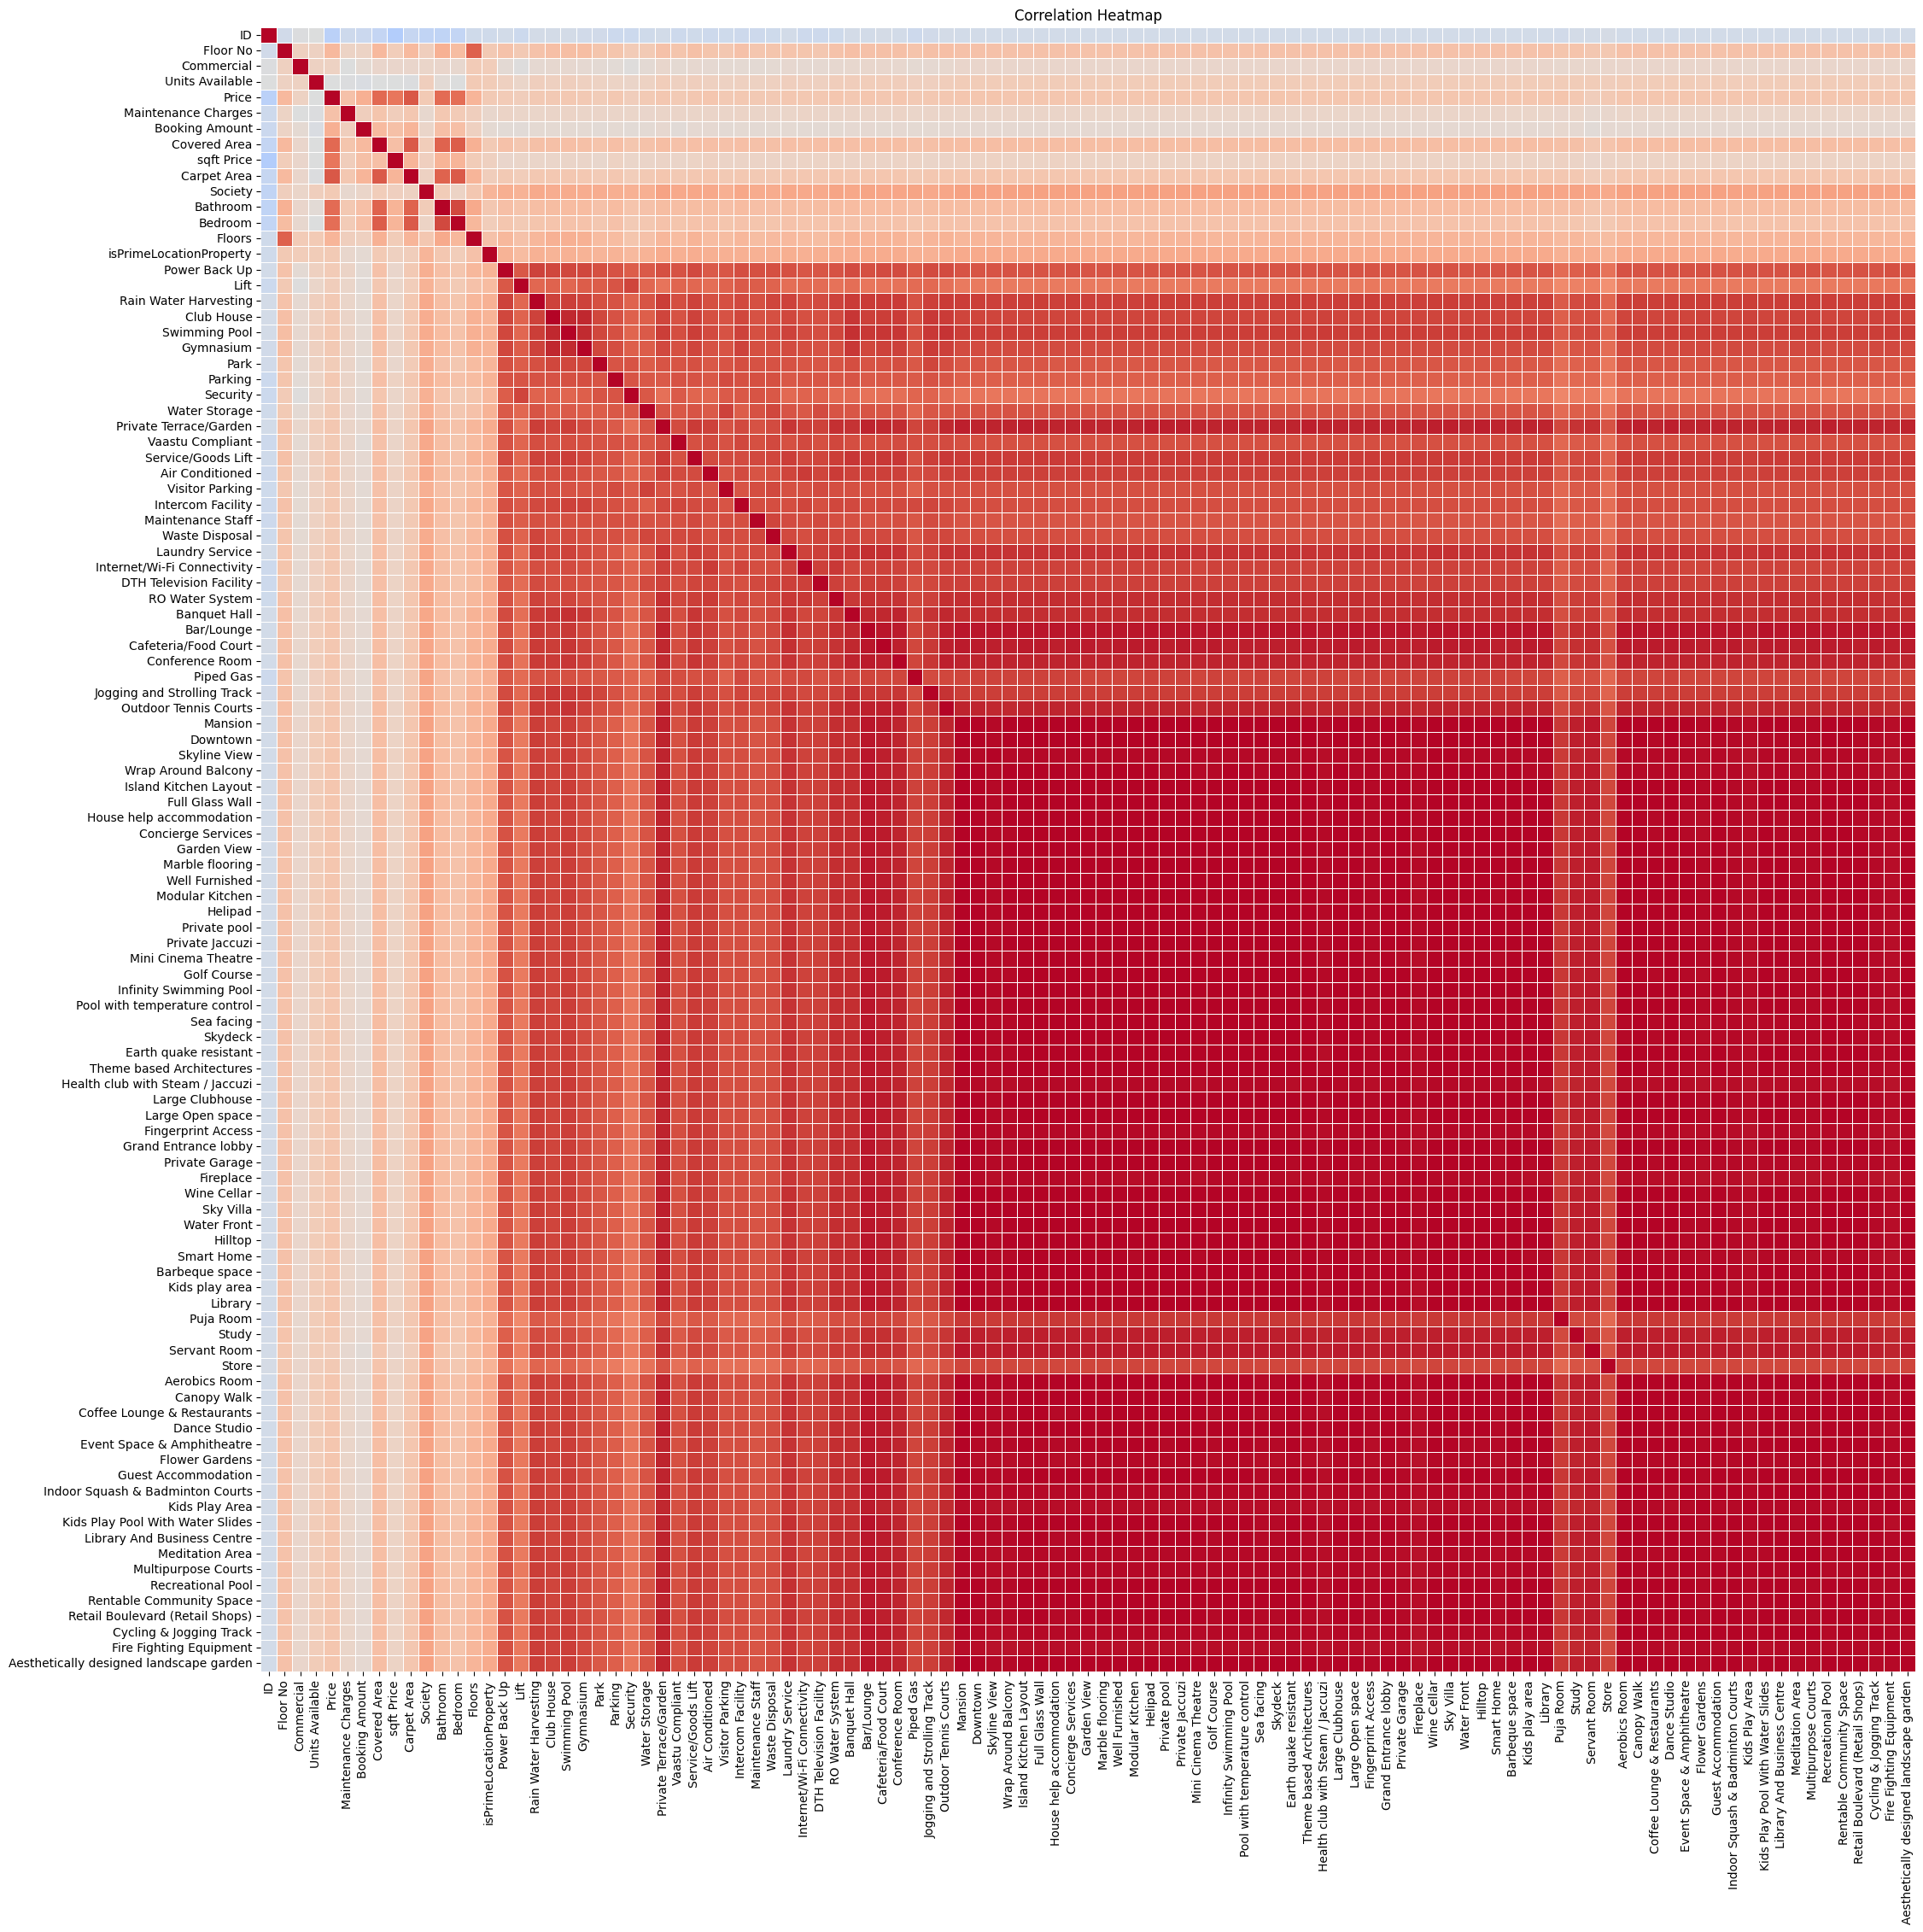

In [ ]:
numeric_columns = df4.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = df4[numeric_columns].corr()

plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=False, fmt='.2f', linewidths=.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# # Step 1: Check the initial missing values
# print("Initial missing values:")
# print(df4.isna().sum())

# # Check for missing values after imputation
# missing_values_after = df4.isna().sum()
# print("\nMissing values after imputation:")
# print(missing_values_after)

# # Filter to show only columns with non-zero missing values
# non_zero_missing_after = missing_values_after[missing_values_after > 0]
# print("\nColumns with non-zero missing values after imputation:")
# print(non_zero_missing_after)

In [ ]:
# Save DataFrame to Excel
df4.to_excel('clean.xlsx', sheet_name='Sheet1', index=False, engine='openpyxl')

In [ ]:
df4 = pd.read_excel('clean.xlsx')

1. As investors have diverse budget limits, split the overall opportunities into three different price ranges.
Analyze the distribution of these price ranges across cities.

Price Range   Low  Medium  High
City                           
Agartala        1       0     0
Bhiwandi        2       0     0
Gurgaon         1       0     0
Hyderabad       8       0     0
Kalyan          7       2     0
Mumbai       1974    2491  3709
Nagpur          5       2     0
Palghar         2       0     0
Thane        2029    1523   437


<Figure size 1400x800 with 0 Axes>

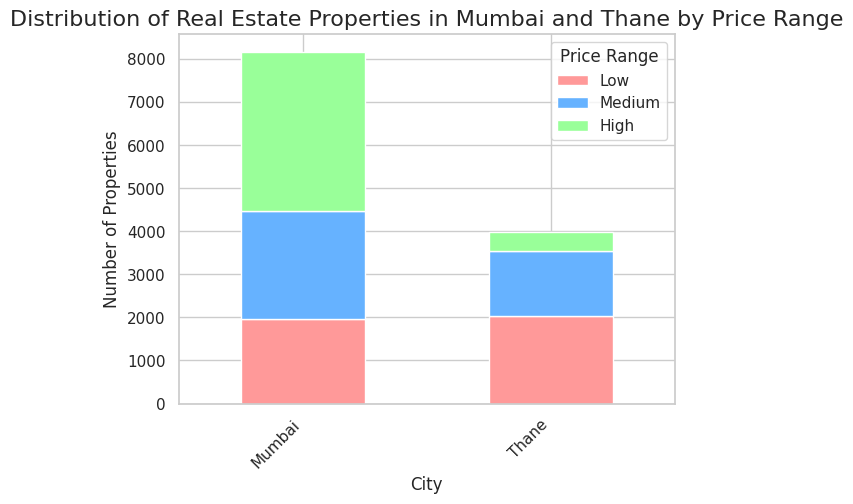

<Figure size 1400x800 with 0 Axes>

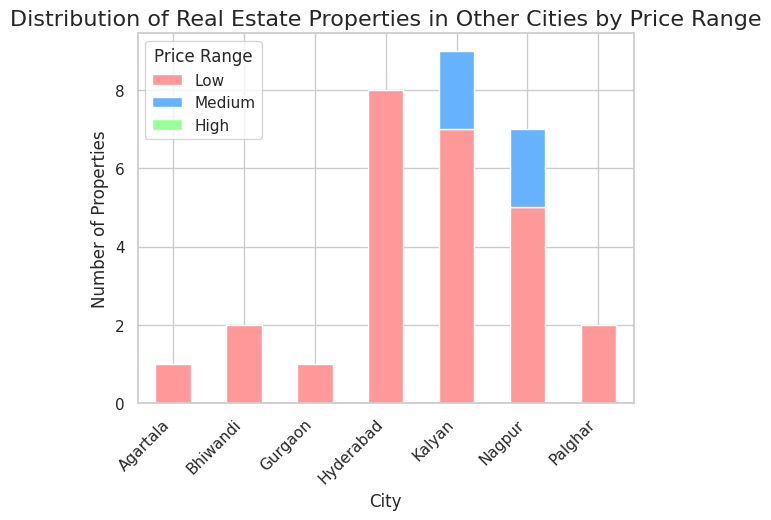

In [ ]:
# Extract relevant columns: 'City' and 'Price'
real_estate_data = df4[['City', 'Price']].copy()  # Ensure we're working with a copy

# Define price ranges (using percentiles to distribute data evenly)
price_quantiles = real_estate_data['Price'].quantile([0.33, 0.66]).values
low_price_threshold, high_price_threshold = price_quantiles

# Categorize properties into three price ranges
real_estate_data.loc[:, 'Price Range'] = pd.cut(
    real_estate_data['Price'],
    bins=[0, low_price_threshold, high_price_threshold, real_estate_data['Price'].max()],
    labels=['Low', 'Medium', 'High']
)

# Analyze the distribution across cities
city_price_distribution = real_estate_data.groupby(['City', 'Price Range'], observed=False).size().unstack(fill_value=0)
print(city_price_distribution)

# Separate Mumbai and Thane from the rest
mumbai_thane = city_price_distribution.loc[['Mumbai', 'Thane']]
other_cities = city_price_distribution.drop(['Mumbai', 'Thane'])

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot for Mumbai and Thane
plt.figure(figsize=(14, 8))
mumbai_thane.plot(kind='bar', stacked=True, color=['#FF9999', '#66B2FF', '#99FF99'])
plt.title('Distribution of Real Estate Properties in Mumbai and Thane by Price Range', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Properties', fontsize=12)
# plt.xticks(rotation=0)  # Rotate x-axis labels for clarity
plt.xticks(rotation=45, ha="right")
plt.legend(title='Price Range')
# plt.tight_layout()
plt.show()

# Plot for other cities
plt.figure(figsize=(14, 8))
other_cities.plot(kind='bar', stacked=True, color=['#FF9999', '#66B2FF', '#99FF99'])
plt.title('Distribution of Real Estate Properties in Other Cities by Price Range', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Properties', fontsize=12)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for clarity
plt.legend(title='Price Range')
# plt.tight_layout()
plt.show()

# Merge the price range back into df5
df5 = df4.copy()
df5['Price Range'] = real_estate_data['Price Range']


In [ ]:
low_price_threshold, high_price_threshold

(8500000.0, 19472000.000000026)

2. Provide investors with a high-level summary of the whole data using the price range dimensions.
Consider factors like property type, city, and key amenities. What method/tool would you use to
present this information effectively?

In [ ]:
# # Define columns to remove
# columns_to_remove = {
#     'Possession Status', 'Availability Starts From', 'Floor No', 'Developer', 'Approved Authority Name',
#     'Price', 'Units Available', 'Electricity Status', 'Maintenance Type', 'Maintenance Charges',
#     'Booking Amount', 'Covered Area', 'Project Name', 'sqft Price', 'Carpet Area', 'Area Name',
#     'Unit of Carpet Area', 'Ownership Type', 'furnished Type', 'Bathroom', 'Facing', 'Amenities Facing',
#     'Transaction Type', 'Type of Property', 'City', 'Bedroom', 'Data Referred From', 'Floors',
#     'Water Status', 'Carpet Area Unit', 'Location', 'Property', 'covArea Unit', 'Property Lifespan'
# }

# # Function to filter out unwanted columns
# def filter_priorities(priorities_dict):
#     filtered_dict = {}
#     for priority, features in priorities_dict.items():
#         filtered_dict[priority] = [feature for feature in features if feature not in columns_to_remove]
#     return filtered_dict

# # Original dictionaries
# low_investor_priorities = {
#     "low_priority": [
#         'Swimming Pool', 'Gymnasium', 'Marble flooring', 'Helipad', 'Private pool',
#         'Private Jaccuzi', 'Mini Cinema Theatre', 'Golf Course', 'Infinity Swimming Pool',
#         'Sea facing', 'Skydeck', 'Earth quake resistant', 'Theme based Architectures',
#         'Health club with Steam / Jaccuzi', 'Large Clubhouse', 'Large Open space',
#         'Fingerprint Access', 'Grand Entrance lobby', 'Private Garage', 'Fireplace',
#         'Wine Cellar', 'Sky Villa', 'Water Front', 'Hilltop', 'Smart Home',
#         'Barbeque space', 'Kids play area', 'Library', 'Puja Room', 'Study',
#         'Servant Room', 'Store', 'Aerobics Room', 'Canopy Walk', 'Coffee Lounge & Restaurants',
#         'Dance Studio', 'Event Space & Amphitheatre', 'Flower Gardens',
#         'Guest Accommodation', 'Indoor Squash & Badminton Courts', 'Kids Play Area',
#         'Kids Play Pool With Water Slides', 'Library And Business Centre',
#         'Meditation Area', 'Multipurpose Courts', 'Recreational Pool',
#         'Rentable CommuniPfty Space', 'Retail Boulevard (Retail Shops)',
#         'Cycling & Jogging Track', 'Fire Fighting Equipment', 'Aesthetically designed landscape garden'
#     ],
#     "medium_priority": [
#         'Developer', 'Parking', 'Ownership Type', 'Water Status', 'furnished Type',
#         'Maintenance Charges', 'Amenities Facing', 'Electricity Status',
#         'Facing', 'Transaction Type', 'Approved Authority Name', 'isPrimeLocationProperty',
#         'Floor No', 'Units Available', 'Service/Goods Lift', 'Visitor Parking',
#         'Intercom Facility', 'Maintenance Staff', 'Waste Disposal', 'Laundry Service',
#         'Internet/Wi-Fi Connectivity', 'DTH Television Facility', 'RO Water System',
#         'Banquet Hall', 'Bar/Lounge', 'Cafeteria/Food Court', 'Conference Room',
#         'Piped Gas', 'Jogging and Strolling Track', 'Outdoor Tennis Courts', 'Mansion',
#         'Downtown', 'Skyline View', 'Wrap Around Balcony', 'Island Kitchen Layout',
#         'Full Glass Wall', 'House help accommodation', 'Concierge Services', 'Garden View'
#     ],
#     "high_priority": [
#         'Price', 'City', 'Area Name', 'Possession Status', 'Carpet Area',
#         'Covered Area', 'Security', 'Power Back Up', 'Project Name',
#         'Type of Property', 'sqft Price', 'Carpet Area Unit', 'Society',
#         'Bathroom', 'Bedroom', 'Floors', 'Location', 'Property',
#         'covArea Unit', 'Property Lifespan', 'Lift', 'Rain Water Harvesting',
#         'Club House', 'Park', 'Water Storage', 'Private Terrace/Garden',
#         'Vaastu Compliant', 'Air Conditioned'
#     ]
# }

# medium_investor_priorities = {
#     "low_priority": [
#         'Basic Furnishing', 'Internet/Wi-Fi Connectivity', 'DTH Television Facility',
#         'RO Water System', 'Banquet Hall', 'Bar/Lounge', 'Cafeteria/Food Court',
#         'Conference Room', 'Piped Gas', 'Jogging and Strolling Track', 'Outdoor Tennis Courts',
#         'Mansion', 'Downtown', 'Skyline View', 'Wrap Around Balcony', 'Island Kitchen Layout',
#         'Full Glass Wall', 'House help accommodation', 'Garden View', 'Aerobics Room',
#         'Canopy Walk', 'Dance Studio', 'Event Space & Amphitheatre', 'Flower Gardens',
#         'Indoor Squash & Badminton Courts', 'Library And Business Centre',
#         'Meditation Area', 'Multipurpose Courts', 'Recreational Pool',
#         'Rentable CommuniPfty Space', 'Retail Boulevard (Retail Shops)',
#         'Cycling & Jogging Track', 'Fire Fighting Equipment', 'Aesthetically designed landscape garden'
#     ],
#     "medium_priority": [
#         'Developer', 'Parking', 'Ownership Type', 'Water Status', 'furnished Type',
#         'Maintenance Charges', 'Amenities Facing', 'Electricity Status', 'Facing',
#         'Transaction Type', 'Approved Authority Name', 'isPrimeLocationProperty',
#         'Floor No', 'Units Available', 'Service/Goods Lift', 'Visitor Parking',
#         'Intercom Facility', 'Maintenance Staff', 'Waste Disposal', 'Laundry Service',
#         'Barbeque space', 'Kids play area', 'Library', 'Puja Room', 'Study',
#         'Servant Room', 'Store', 'Smart Home', 'Sky Villa', 'Water Front', 'Hilltop',
#         'Fireplace', 'Private Garage', 'Grand Entrance lobby', 'Fingerprint Access',
#         'Large Open space', 'Health club with Steam / Jaccuzi', 'Theme based Architectures',
#         'Earth quake resistant', 'Skydeck', 'Sea facing', 'Infinity Swimming Pool',
#         'Golf Course', 'Mini Cinema Theatre', 'Private Jaccuzi', 'Private pool',
#         'Helipad', 'Modular Kitchen', 'Well Furnished'
#     ],
#     "high_priority": [
#         'Price', 'City', 'Area Name', 'Possession Status', 'Carpet Area',
#         'Covered Area', 'Security', 'Power Back Up', 'Project Name',
#         'Type of Property', 'sqft Price', 'Carpet Area Unit', 'Society',
#         'Bathroom', 'Bedroom', 'Floors', 'Location', 'Property',
#         'covArea Unit', 'Property Lifespan', 'Lift', 'Rain Water Harvesting',
#         'Club House', 'Park', 'Water Storage', 'Private Terrace/Garden',
#         'Vaastu Compliant', 'Air Conditioned', 'Gymnasium', 'Swimming Pool'
#     ]
# }

# high_investor_priorities = {
#     "low_priority": [
#         'Basic Furnishing', 'Internet/Wi-Fi Connectivity', 'DTH Television Facility',
#         'RO Water System', 'Banquet Hall', 'Bar/Lounge', 'Cafeteria/Food Court',
#         'Conference Room', 'Piped Gas', 'Jogging and Strolling Track', 'Outdoor Tennis Courts',
#         'Mansion', 'Downtown', 'Skyline View', 'Wrap Around Balcony', 'Island Kitchen Layout',
#         'Full Glass Wall', 'House help accommodation', 'Garden View', 'Aerobics Room',
#         'Canopy Walk', 'Dance Studio', 'Event Space & Amphitheatre', 'Flower Gardens',
#         'Indoor Squash & Badminton Courts', 'Library And Business Centre',
#         'Meditation Area', 'Multipurpose Courts', 'Recreational Pool',
#         'Rentable CommuniPfty Space', 'Retail Boulevard (Retail Shops)',
#         'Cycling & Jogging Track', 'Fire Fighting Equipment', 'Aesthetically designed landscape garden'
#     ],
#     "medium_priority": [
#         'Developer', 'Parking', 'Ownership Type', 'Water Status', 'furnished Type',
#         'Maintenance Charges', 'Amenities Facing', 'Electricity Status', 'Facing',
#         'Transaction Type', 'Approved Authority Name', 'isPrimeLocationProperty',
#         'Floor No', 'Units Available', 'Service/Goods Lift', 'Visitor Parking',
#         'Intercom Facility', 'Maintenance Staff', 'Waste Disposal', 'Laundry Service',
#         'Barbeque space', 'Kids play area', 'Library', 'Puja Room', 'Study',
#         'Servant Room', 'Store', 'Smart Home', 'Sky Villa', 'Water Front', 'Hilltop',
#         'Fireplace', 'Private Garage', 'Grand Entrance lobby', 'Fingerprint Access',
#         'Large Open space', 'Health club with Steam / Jaccuzi', 'Theme based Architectures',
#         'Earth quake resistant', 'Skydeck', 'Sea facing', 'Infinity Swimming Pool',
#         'Golf Course', 'Mini Cinema Theatre', 'Private Jaccuzi', 'Private pool',
#         'Helipad', 'Modular Kitchen', 'Well Furnished'
#     ],
#     "high_priority": [
#         'Price', 'City', 'Area Name', 'Possession Status', 'Carpet Area',
#         'Covered Area', 'Security', 'Power Back Up', 'Project Name',
#         'Type of Property', 'sqft Price', 'Carpet Area Unit', 'Society',
#         'Bathroom', 'Bedroom', 'Floors', 'Location', 'Property',
#         'covArea Unit', 'Property Lifespan', 'Lift', 'Rain Water Harvesting',
#         'Club House', 'Park', 'Water Storage', 'Private Terrace/Garden',
#         'Vaastu Compliant', 'Air Conditioned', 'Gymnasium', 'Swimming Pool'
#     ]
# }

# # Apply the filter to each priority dictionary
# low_investor_priorities = filter_priorities(low_investor_priorities)
# medium_investor_priorities = filter_priorities(medium_investor_priorities)
# high_investor_priorities = filter_priorities(high_investor_priorities)

# # Print the filtered dictionaries
# print("Low Investor Priorities:")
# print(low_investor_priorities)

# print("\nMedium Investor Priorities:")
# print(medium_investor_priorities)

# print("\nHigh Investor Priorities:")
# print(high_investor_priorities)


In [ ]:
# Ensure all relevant amenity columns exist
# all_amenities = low_price_investor_priorities + medium_price_investor_priorities + high_price_investor_priorities
# for amenity in all_amenities:
#     if amenity not in df4.columns:
#         df4[amenity] = 0

low_price_investor_priorities = ['Commercial', 'Power Back Up', 'Lift', 'Parking', 'Security', 'Water Storage', 'Vaastu Compliant', 'Waste Disposal', 'Internet/Wi-Fi Connectivity', 'RO Water System', 'Downtown', 'Marble flooring', 'Well Furnished', 'Smart Home', 'Kids play area', 'Puja Room', 'Study', 'Guest Accommodation', 'Rentable Community Space', 'Fire Fighting Equipment', 'Retail Boulevard (Retail Shops)']

medium_price_investor_priorities = ['Commercial', 'Society', 'isPrimeLocationProperty', 'Power Back Up', 'Lift', 'Rain Water Harvesting', 'Swimming Pool', 'Gymnasium', 'Parking', 'Security', 'Water Storage', 'Vaastu Compliant', 'Visitor Parking', 'Maintenance Staff', 'Waste Disposal', 'Laundry Service', 'Internet/Wi-Fi Connectivity', 'RO Water System', 'Skyline View', 'Marble flooring', 'Well Furnished', 'Modular Kitchen', 'Earth quake resistant', 'Grand Entrance lobby', 'Smart Home', 'Kids play area', 'Library', 'Puja Room', 'Study', 'Guest Accommodation', 'Meditation Area', 'Rentable Community Space', 'Fire Fighting Equipment', 'Retail Boulevard (Retail Shops)']

high_price_investor_priorities = ['Commercial', 'Society', 'isPrimeLocationProperty', 'Power Back Up', 'Lift', 'Rain Water Harvesting', 'Club House', 'Swimming Pool', 'Gymnasium', 'Park', 'Parking', 'Security', 'Water Storage', 'Vaastu Compliant', 'Air Conditioned', 'Visitor Parking', 'Maintenance Staff', 'Waste Disposal', 'Laundry Service', 'Internet/Wi-Fi Connectivity', 'Bar/Lounge', 'Banquet Hall', 'Conference Room', 'Mansion', 'Skyline View', 'Full Glass Wall', 'Garden View', 'Marble flooring', 'Well Furnished', 'Modular Kitchen', 'Earth quake resistant', 'Fingerprint Access', 'Grand Entrance lobby', 'Fireplace', 'Wine Cellar', 'Hilltop', 'Smart Home', 'Kids play area', 'Library', 'Puja Room', 'Study', 'Store', 'Guest Accommodation', 'Library And Business Centre', 'Meditation Area', 'Fire Fighting Equipment', 'Aesthetically designed landscape garden']



# Function to compute total amenities based on price range
def compute_total_amenities(row):
    total = 0
    if row['Price Range'] == 'Low':
        amenities = low_price_investor_priorities
    elif row['Price Range'] == 'Medium':
        amenities = medium_price_investor_priorities
    elif row['Price Range'] == 'High':
        amenities = high_price_investor_priorities

    for amenity in amenities:
        total += row[amenity]

    return total

# Apply the function to compute 'Total Amenities'
df6 = df5.copy()
df6['Total Amenities'] = df6.apply(compute_total_amenities, axis=1)

# Print the updated DataFrame with the 'Price Range' and 'Total Amenities' columns
# print(df4[['City', 'Price', 'Price Range', 'Total Amenities']])

df6
# ['Society', 'isPrimeLocationProperty', 'Power Back Up', 'Lift', 'Rain Water Harvesting', 'Club House', 'Swimming Pool', 'Gymnasium', 'Park', 'Parking', 'Security', 'Water Storage', 'Private Terrace/Garden', 'Vaastu Compliant', 'Service/Goods Lift', 'Air Conditioned', 'Visitor Parking', 'Intercom Facility', 'Maintenance Staff', 'Waste Disposal', 'Laundry Service', 'Internet/Wi-Fi Connectivity', 'DTH Television Facility', 'RO Water System', 'Banquet Hall', 'Bar/Lounge', 'Cafeteria/Food Court', 'Conference Room', 'Piped Gas', 'Jogging and Strolling Track', 'Outdoor Tennis Courts', 'Mansion', 'Downtown', 'Skyline View', 'Wrap Around Balcony', 'Island Kitchen Layout', 'Full Glass Wall', 'House help accommodation', 'Concierge Services', 'Garden View', 'Marble flooring', 'Well Furnished', 'Modular Kitchen', 'Helipad', 'Private pool', 'Private Jaccuzi', 'Mini Cinema Theatre', 'Golf Course', 'Infinity Swimming Pool', 'Pool with temperature control', 'Sea facing', 'Skydeck', 'Earth quake resistant', 'Theme based Architectures', 'Health club with Steam / Jaccuzi', 'Large Clubhouse', 'Large Open space', 'Fingerprint Access', 'Grand Entrance lobby', 'Private Garage', 'Fireplace', 'Wine Cellar', 'Sky Villa', 'Water Front', 'Hilltop', 'Smart Home', 'Barbeque space', 'Kids play area', 'Library', 'Puja Room', 'Study', 'Servant Room', 'Store', 'Aerobics Room', 'Canopy Walk', 'Coffee Lounge & Restaurants', 'Dance Studio', 'Event Space & Amphitheatre', 'Flower Gardens', 'Guest Accommodation', 'Indoor Squash & Badminton Courts', 'Kids Play Area', 'Kids Play Pool With Water Slides', 'Library And Business Centre', 'Meditation Area', 'Multipurpose Courts', 'Recreational Pool', 'Rentable CommuniPfty Space', 'Retail Boulevard (Retail Shops)', 'Cycling & Jogging Track', 'Fire Fighting Equipment', 'Aesthetically designed landscape garden']

ID   Possession Status Availability Starts From  Floor No  \
0      12685  Under Construction               2025-12-01         5   
1      12684       Ready to Move               2025-12-01        20   
2      12683       Ready to Move               2025-12-01        18   
3      12682  Under Construction               2025-12-01         5   
4      12681  Under Construction               2024-12-01         8   
...      ...                 ...                      ...       ...   
12188      5             Dec '26               2026-12-01        10   
12189      4  Under Construction               2026-03-01        10   
12190      3  Under Construction               2026-03-01         5   
12191      2       Ready to Move               2024-12-01         1   
12192      1  Under Construction               2024-12-01        12   

       Commercial  Developer Approved Authority Name  Units Available  \
0               0       TATA                    KDMC                1   
1               1       TATA                     TMC               10   
2               0        Sai                    KDMC                0   
3               0      Birla                    KDMC               70   
4               1     Godrej                  ABAAut                2   
...           ...        ...                     ...              ...   
12188           1  Kalpataru                    MCGM               20   
12189           0  Kalpataru                    MCGM               20   
12190           0  Kalpataru                   MMRDA                7   
12191           1        VKG                    MCGM                0   
12192           1        VKG                    MCGM                2   

          Price                   Flooring Type  ... Meditation Area  \
0       3150000                       Vitrified  ...               1   
1       6300000                       Vitrified  ...               1   
2       5400000                       Vitrified  ...               1   
3       9000000                       Vitrified  ...               1   
4       4950000                       Vitrified  ...               1   
...         ...                             ...  ...             ...   
12188  22200000                       Vitrified  ...               0   
12189  31000000  Ceramic Tiles,Marble,Marbonite  ...               1   
12190  18500000         Marble,Vitrified,Wooden  ...               1   
12191  22000000                       Vitrified  ...               1   
12192  18500000                Marble,Vitrified  ...               1   

      Multipurpose Courts  Recreational Pool  Rentable Community Space  \
0                       1                  1                         1   
1                       1                  1                         1   
2                       1                  1                         1   
3                       1                  1                         1   
4                       1                  1                         1   
...                   ...                ...                       ...   
12188                   0                  0                         0   
12189                   1                  1                         1   
12190                   1                  1                         1   
12191                   1                  1                         1   
12192                   1                  1                         1   

       Retail Boulevard (Retail Shops) Cycling & Jogging Track  \
0                                    1                       1   
1                                    1                       1   
2                                    1                       1   
3                                    1                       1   
4                                    1                       1   
...                                ...                     ...   
12188                                0                       0  

In [ ]:
df6[['Price Range', 'Total Amenities']]

Price Range  Total Amenities
0             Low               20
1             Low               21
2             Low               20
3          Medium               33
4             Low               20
...           ...              ...
12188        High                2
12189        High               46
12190      Medium               33
12191        High               47
12192      Medium               34

[12193 rows x 2 columns]

In [ ]:
# from IPython.display import Javascript
# display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))

# df4.columns.to_list()
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12193 entries, 0 to 12192
Columns: 131 entries, ID to Total Amenities
dtypes: category(1), datetime64[ns](1), int64(106), object(23)
memory usage: 12.1+ MB


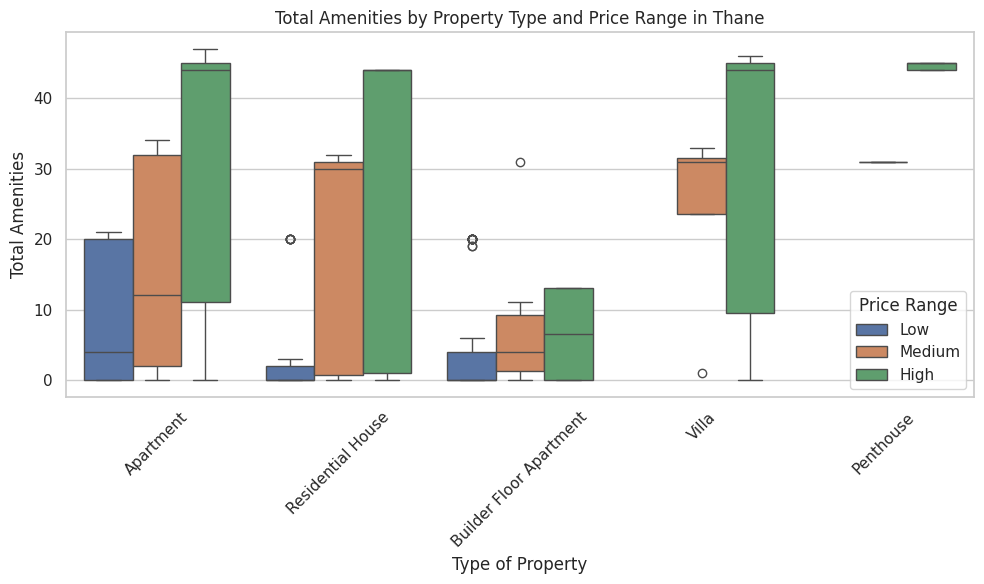

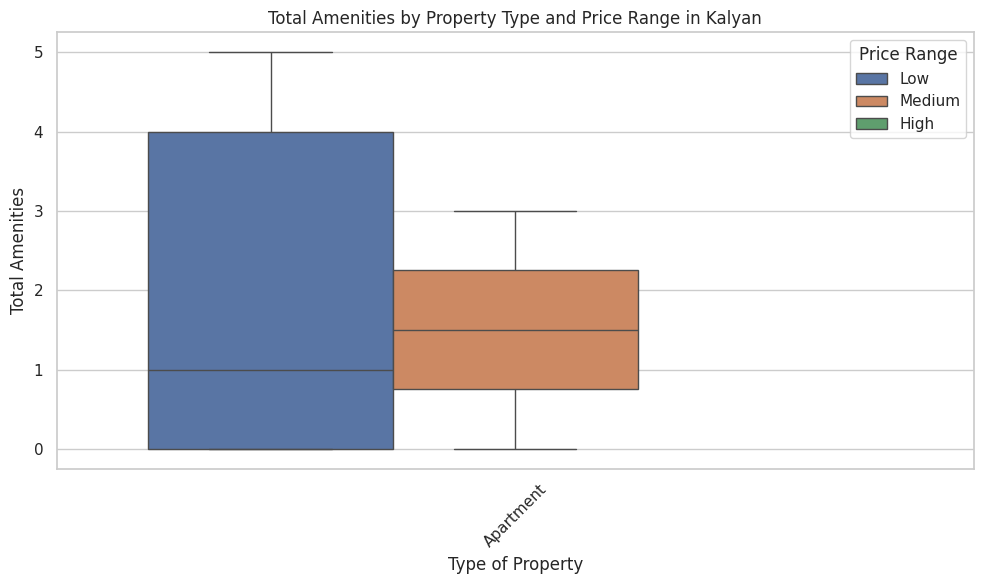

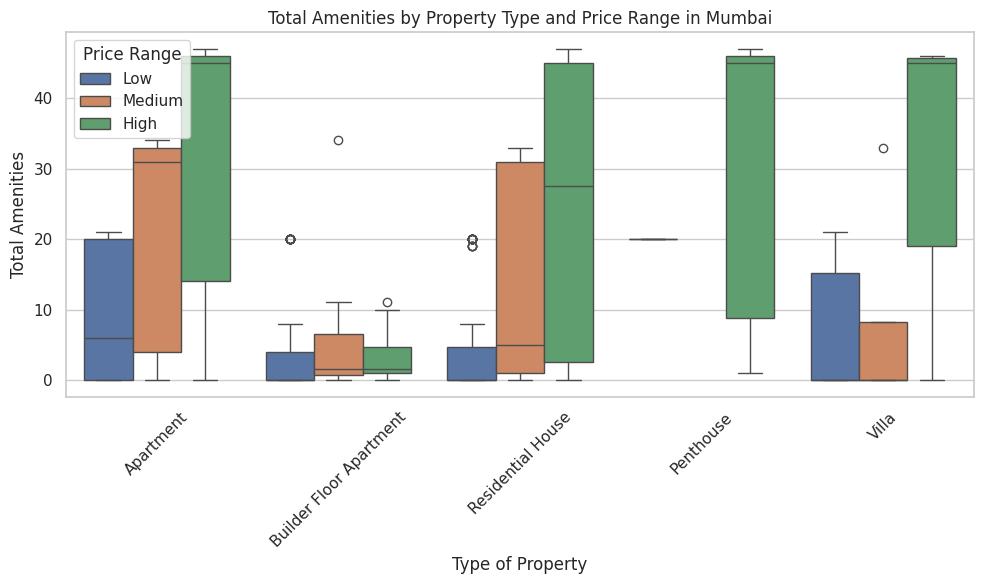

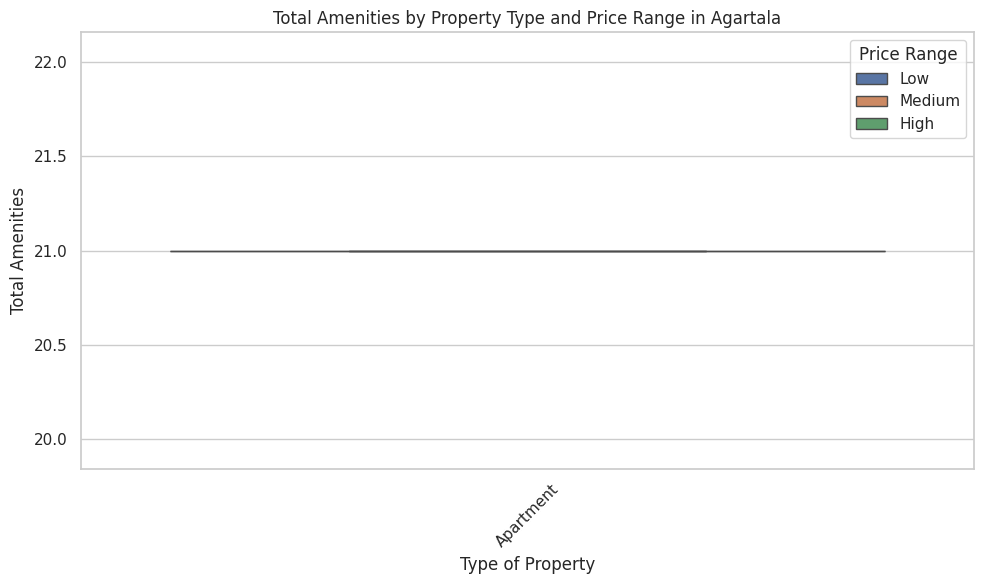

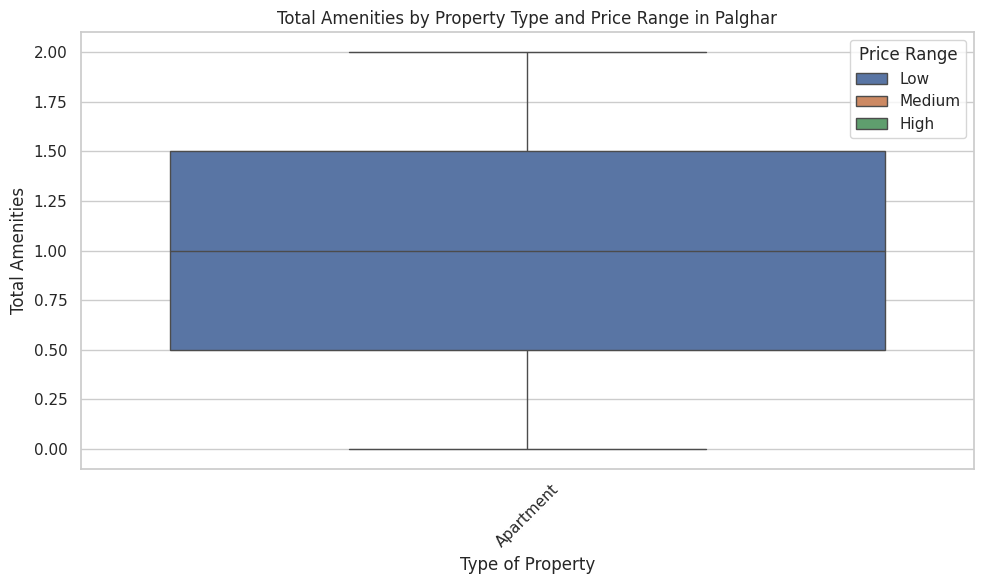

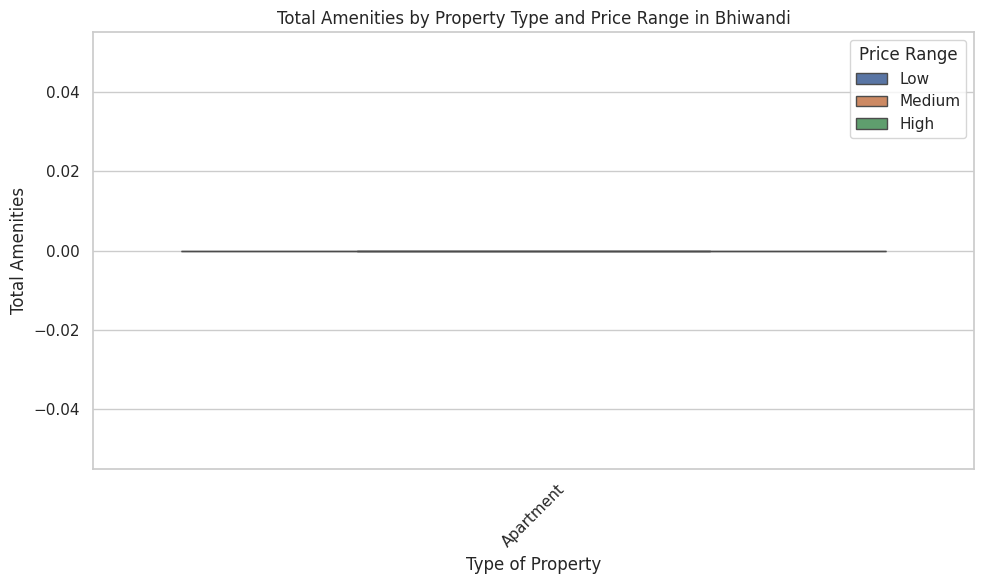

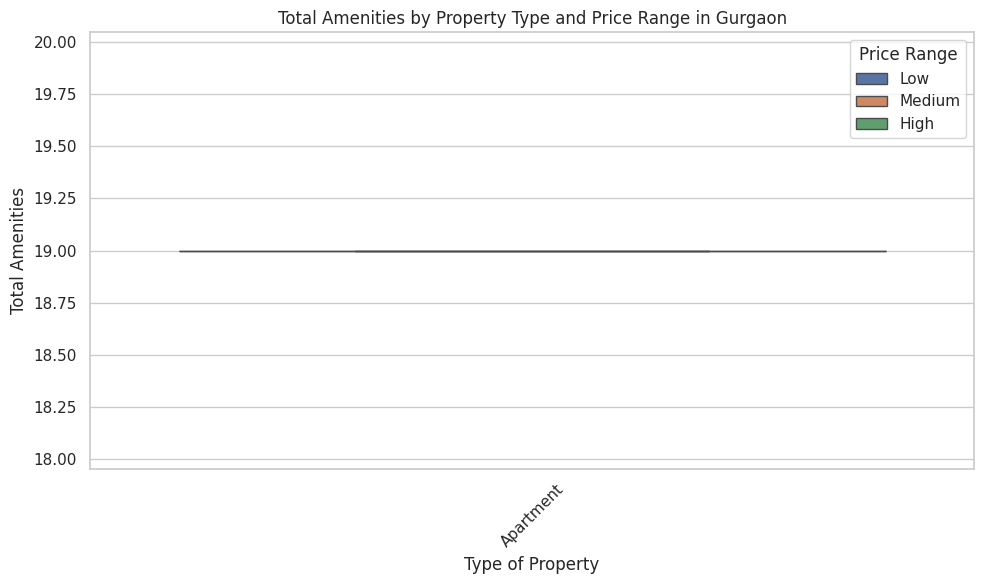

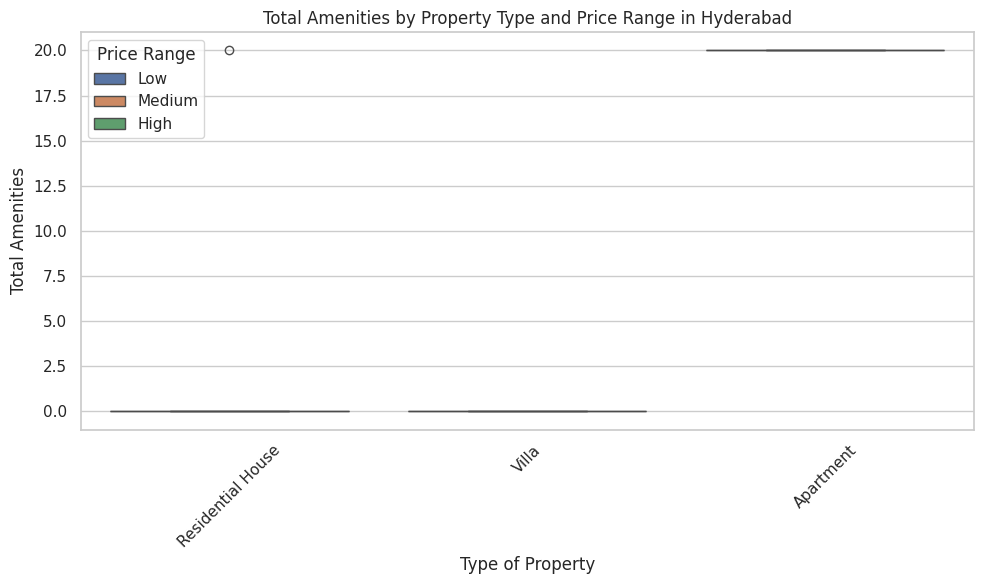

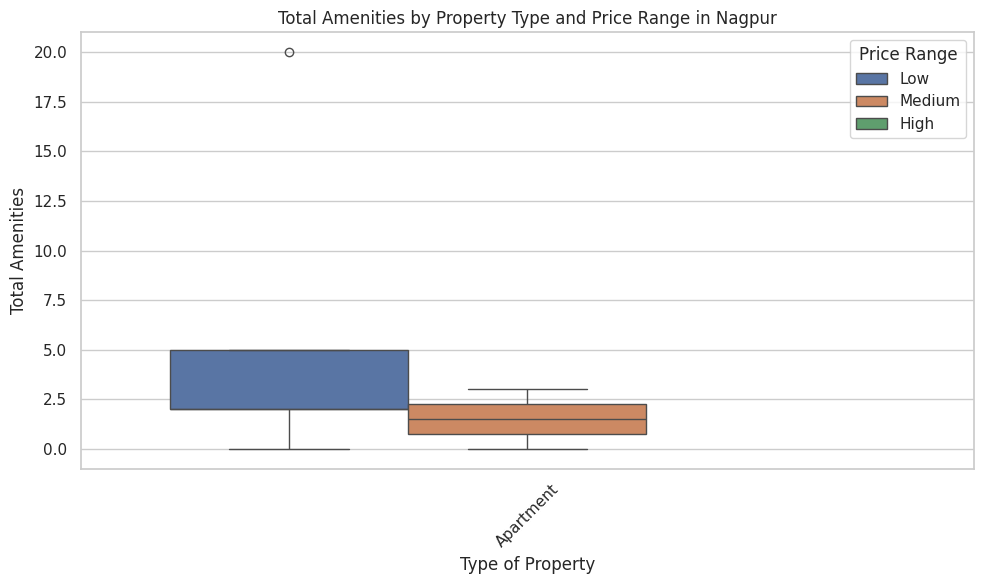

In [ ]:
# Define the cities for which you want to create graphs
cities = df6['City'].unique()

# Generate individual plots for each city
for city in cities:
    plt.figure(figsize=(10, 6))  # Create a new figure for each city
    city_data = df6[df6['City'] == city]

    sns.boxplot(data=city_data, x='Type of Property', y='Total Amenities', hue='Price Range')
    plt.title(f'Total Amenities by Property Type and Price Range in {city}')
    plt.legend(title='Price Range')
    plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
    plt.tight_layout()  # Adjust layout to fit elements

    # Save the plot to a file or display it
    # plt.savefig(f'boxplot_{city}.png')  # Save to file (you can also display with plt.show() instead)
    plt.show()
    # plt.close()  # Close the figure to avoid display conflicts

3. Some investors want to compare investment opportunities in Thane and Mumbai. Analyze and visualize
the differences in property types, sizes (using Carpet Area), and prices between these two cities.

In [ ]:
df7 = df6.copy()
df7 = df7[df7['City'].isin(['Mumbai', 'Thane'])]
df7 = df7[['City', 'Type of Property', 'Carpet Area', 'Price']]
df7

City Type of Property  Carpet Area     Price
0       Thane        Apartment          375   3150000
1       Thane        Apartment          579   6300000
2       Thane        Apartment          585   5400000
3       Thane        Apartment          815   9000000
4       Thane        Apartment          419   4950000
...       ...              ...          ...       ...
12188  Mumbai        Apartment          618  22200000
12189  Mumbai        Apartment         1076  31000000
12190  Mumbai        Apartment          618  18500000
12191  Mumbai        Apartment          821  22000000
12192  Mumbai        Apartment          665  18500000

[12163 rows x 4 columns]

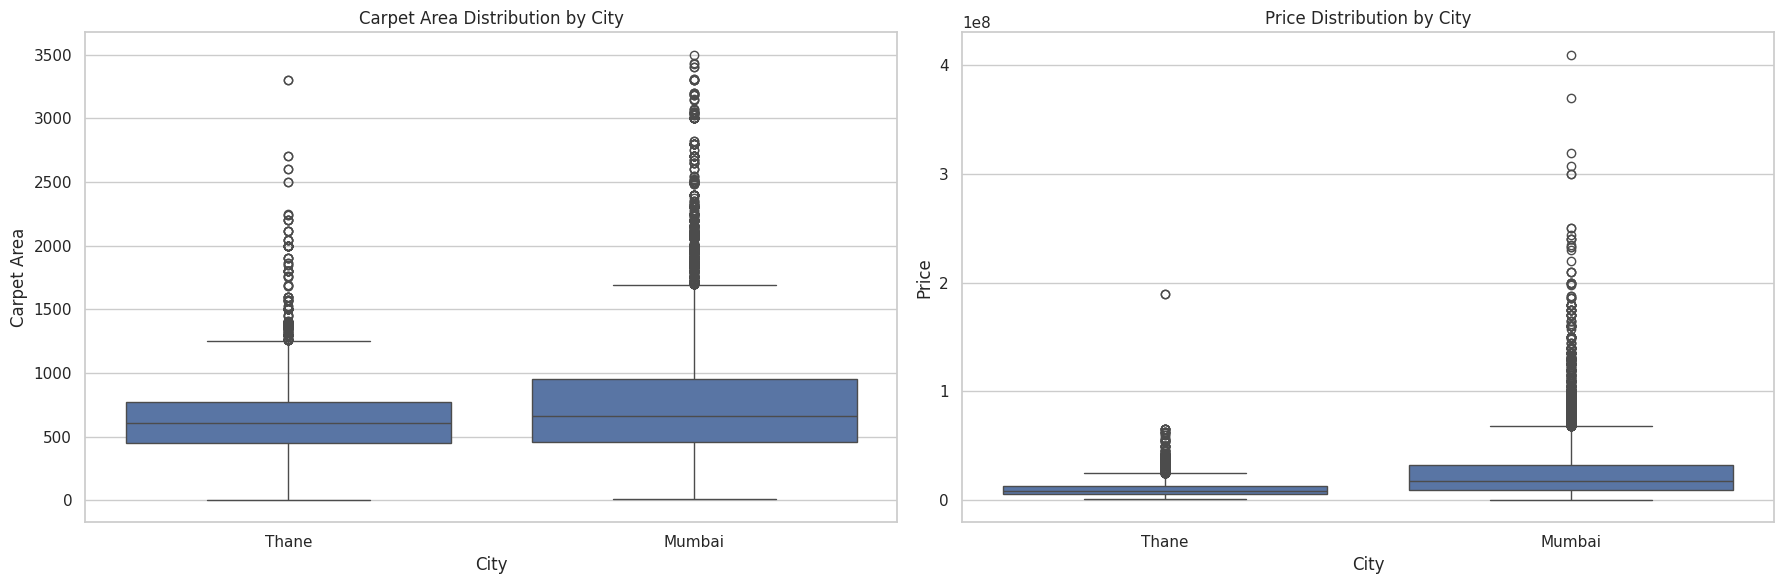

In [ ]:
# Create box plots for Carpet Area and Price for Thane and Mumbai

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Box plot for Carpet Area
sns.boxplot(data=df7, x='City', y='Carpet Area', ax=axes[0])
axes[0].set_title('Carpet Area Distribution by City')

# Box plot for Price
sns.boxplot(data=df7, x='City', y='Price', ax=axes[1])
axes[1].set_title('Price Distribution by City')

plt.tight_layout()
plt.show()


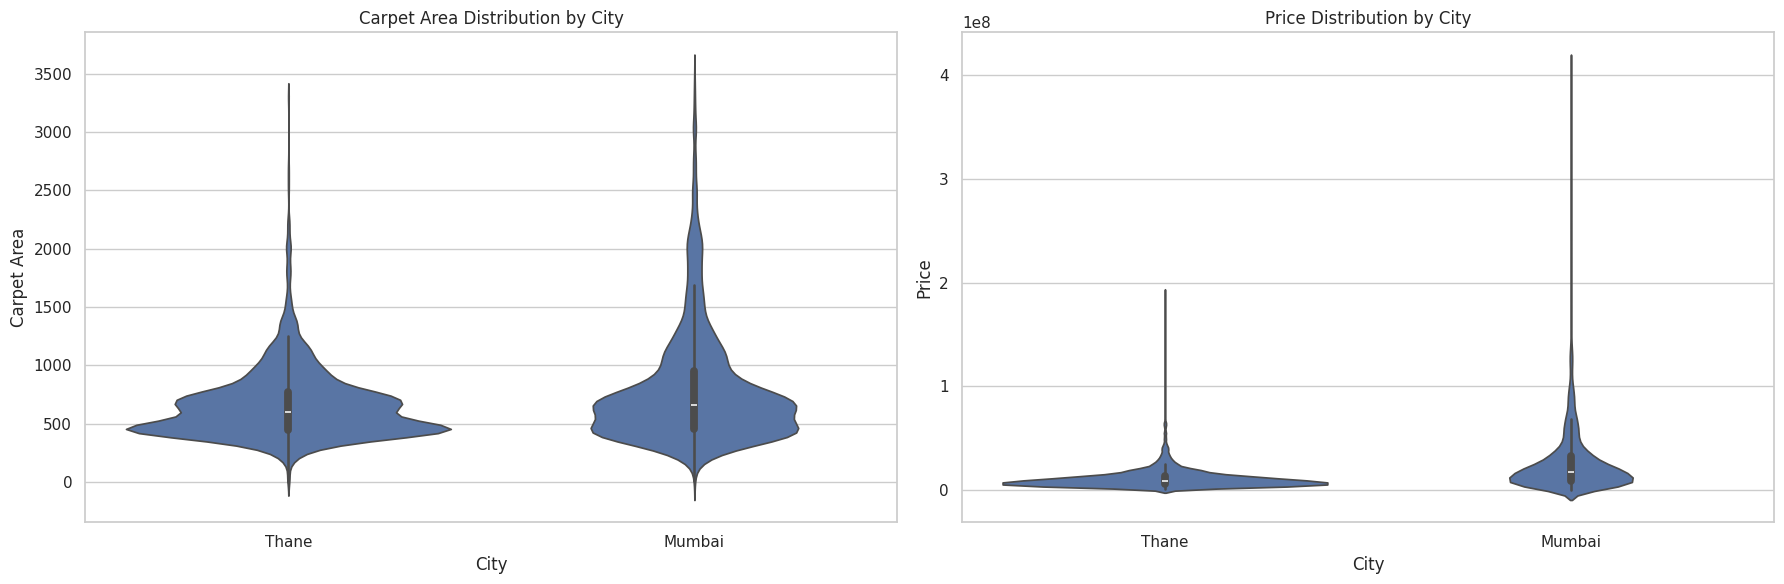

In [ ]:
# Create violin plots for Carpet Area and Price

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Violin plot for Carpet Area
sns.violinplot(data=df7, x='City', y='Carpet Area', ax=axes[0])
axes[0].set_title('Carpet Area Distribution by City')

# Violin plot for Price
sns.violinplot(data=df7, x='City', y='Price', ax=axes[1])
axes[1].set_title('Price Distribution by City')

plt.tight_layout()
plt.show()


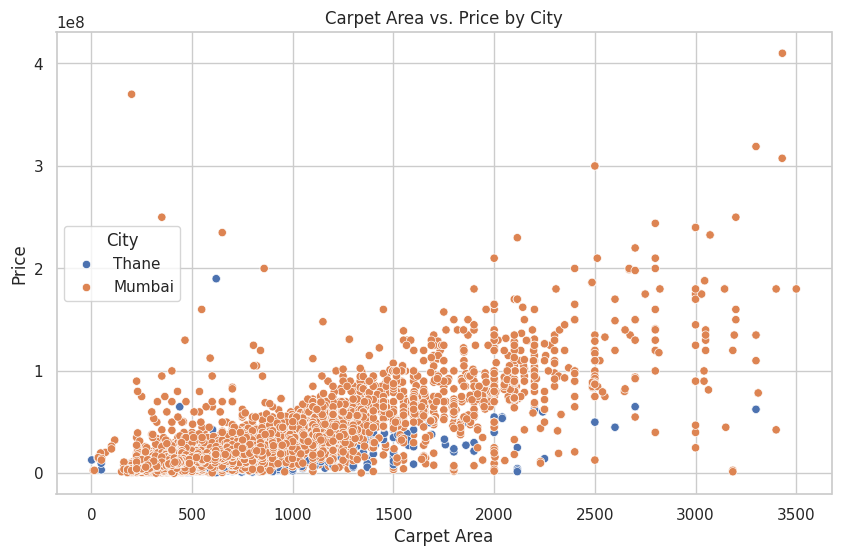

In [ ]:
# Scatter plot for Carpet Area vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df7, x='Carpet Area', y='Price', hue='City')
plt.title('Carpet Area vs. Price by City')
plt.legend(title='City')
plt.show()


5. Some investors prefer larger area properties with relatively lower budgets. Identify and visualize
properties that offer the best value in terms of Carpet Area per unit of Price across different cities.

In [ ]:
df8 = df6.copy()
df8['CAPP'] = df8['Carpet Area'] / df8['Price']
# df8['CAPP Recomm'] = pd.NA
# df8 = df8[['Price', 'Carpet Area', 'City', 'Type of Property', 'Price Range', 'CAPP']]
df8

ID   Possession Status Availability Starts From  Floor No  \
0      12685  Under Construction               2025-12-01         5   
1      12684       Ready to Move               2025-12-01        20   
2      12683       Ready to Move               2025-12-01        18   
3      12682  Under Construction               2025-12-01         5   
4      12681  Under Construction               2024-12-01         8   
...      ...                 ...                      ...       ...   
12188      5             Dec '26               2026-12-01        10   
12189      4  Under Construction               2026-03-01        10   
12190      3  Under Construction               2026-03-01         5   
12191      2       Ready to Move               2024-12-01         1   
12192      1  Under Construction               2024-12-01        12   

       Commercial  Developer Approved Authority Name  Units Available  \
0               0       TATA                    KDMC                1   
1               1       TATA                     TMC               10   
2               0        Sai                    KDMC                0   
3               0      Birla                    KDMC               70   
4               1     Godrej                  ABAAut                2   
...           ...        ...                     ...              ...   
12188           1  Kalpataru                    MCGM               20   
12189           0  Kalpataru                    MCGM               20   
12190           0  Kalpataru                   MMRDA                7   
12191           1        VKG                    MCGM                0   
12192           1        VKG                    MCGM                2   

          Price                   Flooring Type  ... Multipurpose Courts  \
0       3150000                       Vitrified  ...                   1   
1       6300000                       Vitrified  ...                   1   
2       5400000                       Vitrified  ...                   1   
3       9000000                       Vitrified  ...                   1   
4       4950000                       Vitrified  ...                   1   
...         ...                             ...  ...                 ...   
12188  22200000                       Vitrified  ...                   0   
12189  31000000  Ceramic Tiles,Marble,Marbonite  ...                   1   
12190  18500000         Marble,Vitrified,Wooden  ...                   1   
12191  22000000                       Vitrified  ...                   1   
12192  18500000                Marble,Vitrified  ...                   1   

      Recreational Pool  Rentable Community Space  \
0                     1                         1   
1                     1                         1   
2                     1                         1   
3                     1                         1   
4                     1                         1   
...                 ...                       ...   
12188                 0                         0   
12189                 1                         1   
12190                 1                         1   
12191                 1                         1   
12192                 1                         1   

       Retail Boulevard (Retail Shops)  Cycling & Jogging Track  \
0                                    1                        1   
1                                    1                        1   
2                                    1                        1   
3                                    1                        1   
4                                    1                        1   
...                                ...                      ...   
12188                                0                        0   
12189                                1                        1   
12190                                1                        1   
12191                                1                      

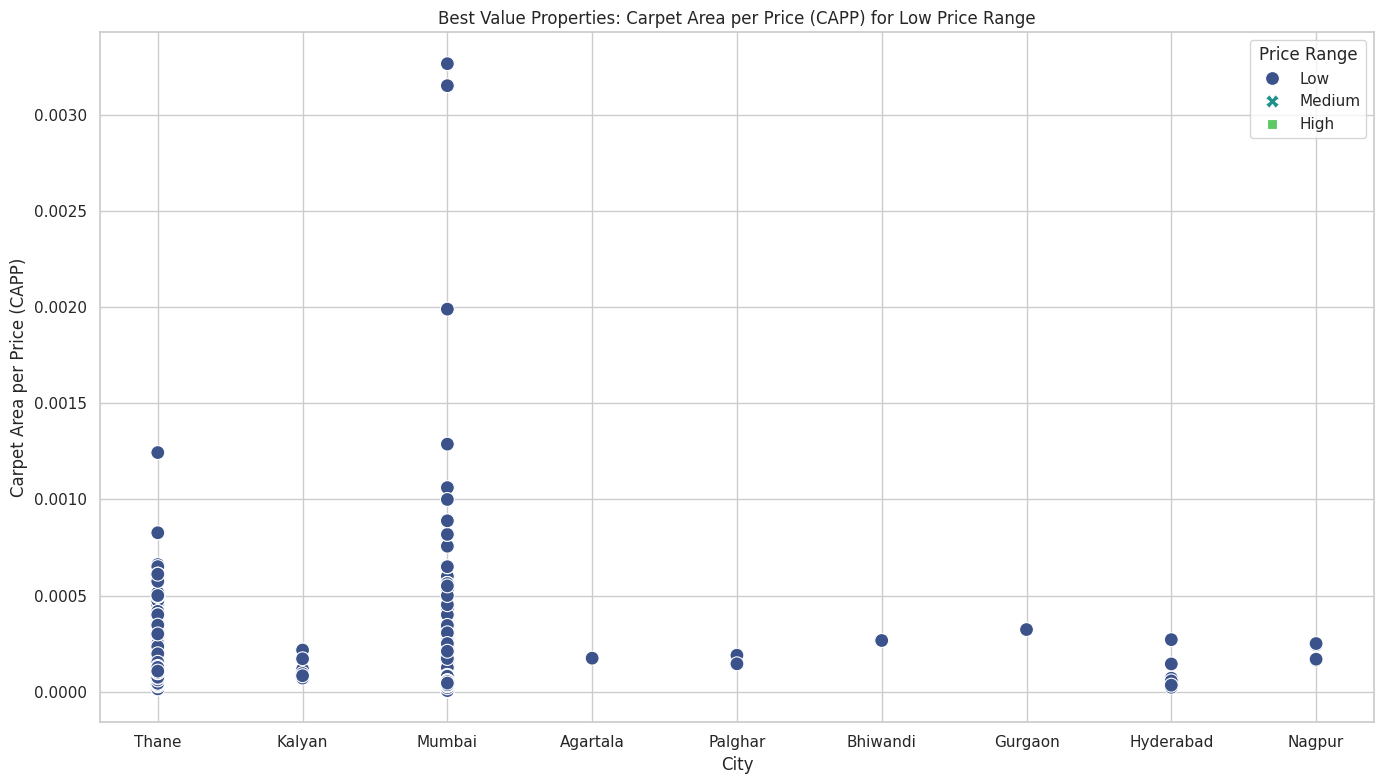

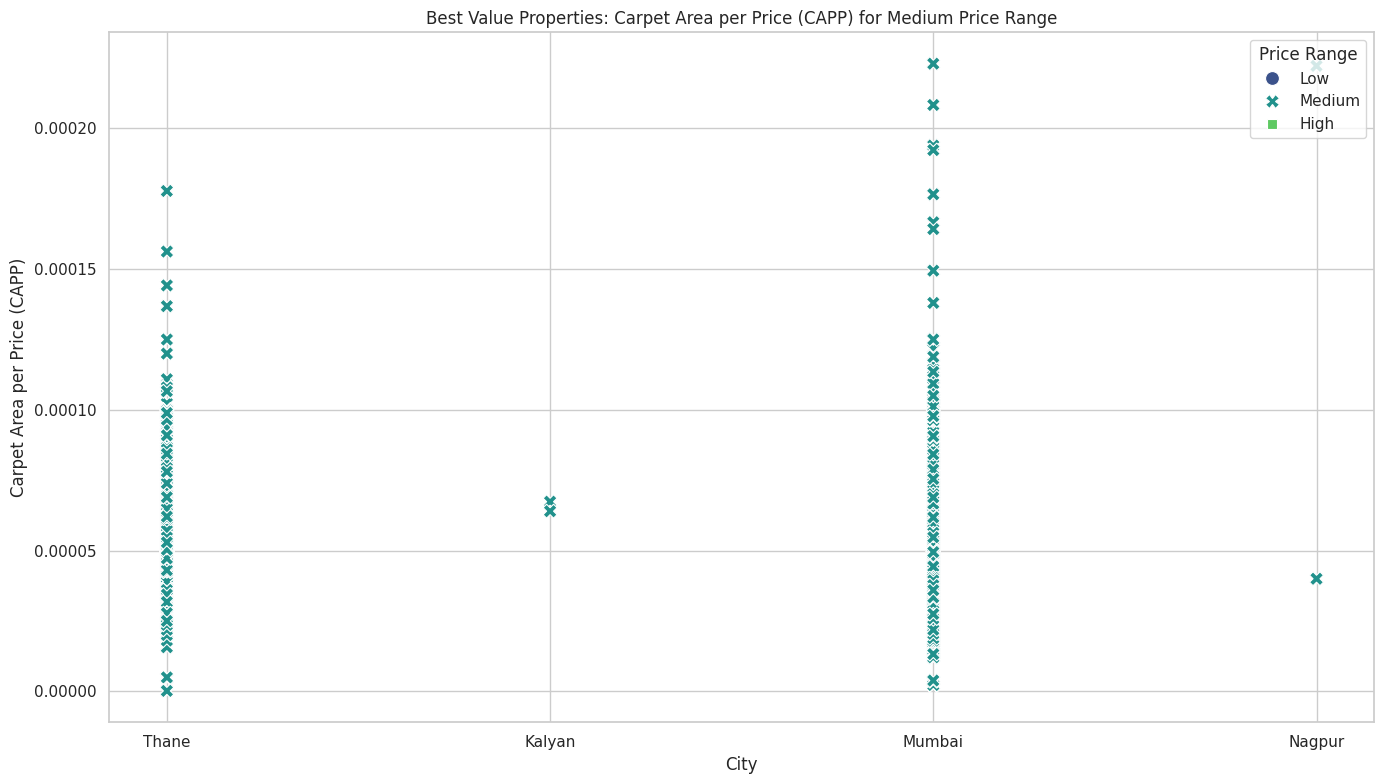

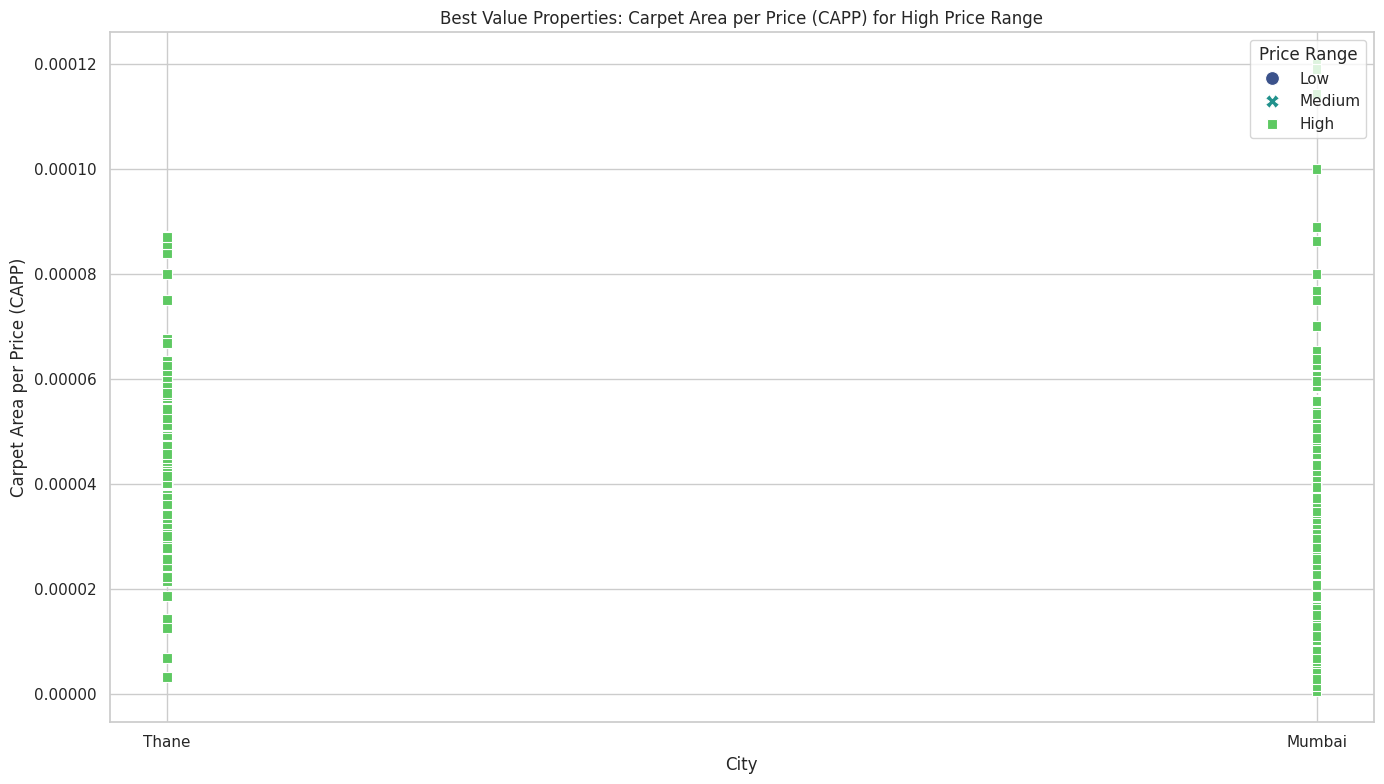

In [ ]:
# # Set up the plot
# plt.figure(figsize=(14, 8))

# # Create a scatter plot for CAPP by City and Price Range
# sns.scatterplot(data=df8, x='City', y='CAPP', hue='Price Range', style='Price Range', palette='viridis', s=50)

# # Enhance the plot
# plt.title('Best Value Properties: Carpet Area per Price (CAPP) by City and Price Range')
# plt.xlabel('City')
# plt.ylabel('Carpet Area per Price (CAPP)')
# plt.legend(title='Price Range', loc='upper right')
# plt.grid(True)
# plt.tight_layout()

# # Show the plot
# plt.show()

# List of unique price ranges
price_ranges = df8['Price Range'].unique()

# Create a scatter plot for each price range
for price_range in price_ranges:
    plt.figure(figsize=(14, 8))
    subset = df8[df8['Price Range'] == price_range]
    sns.scatterplot(data=subset, x='City', y='CAPP', s=100, palette='viridis', hue='Price Range', style='Price Range')
    plt.title(f'Best Value Properties: Carpet Area per Price (CAPP) for {price_range} Price Range')
    plt.xlabel('City')
    plt.ylabel('Carpet Area per Price (CAPP)')
    plt.legend(title='Price Range', loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

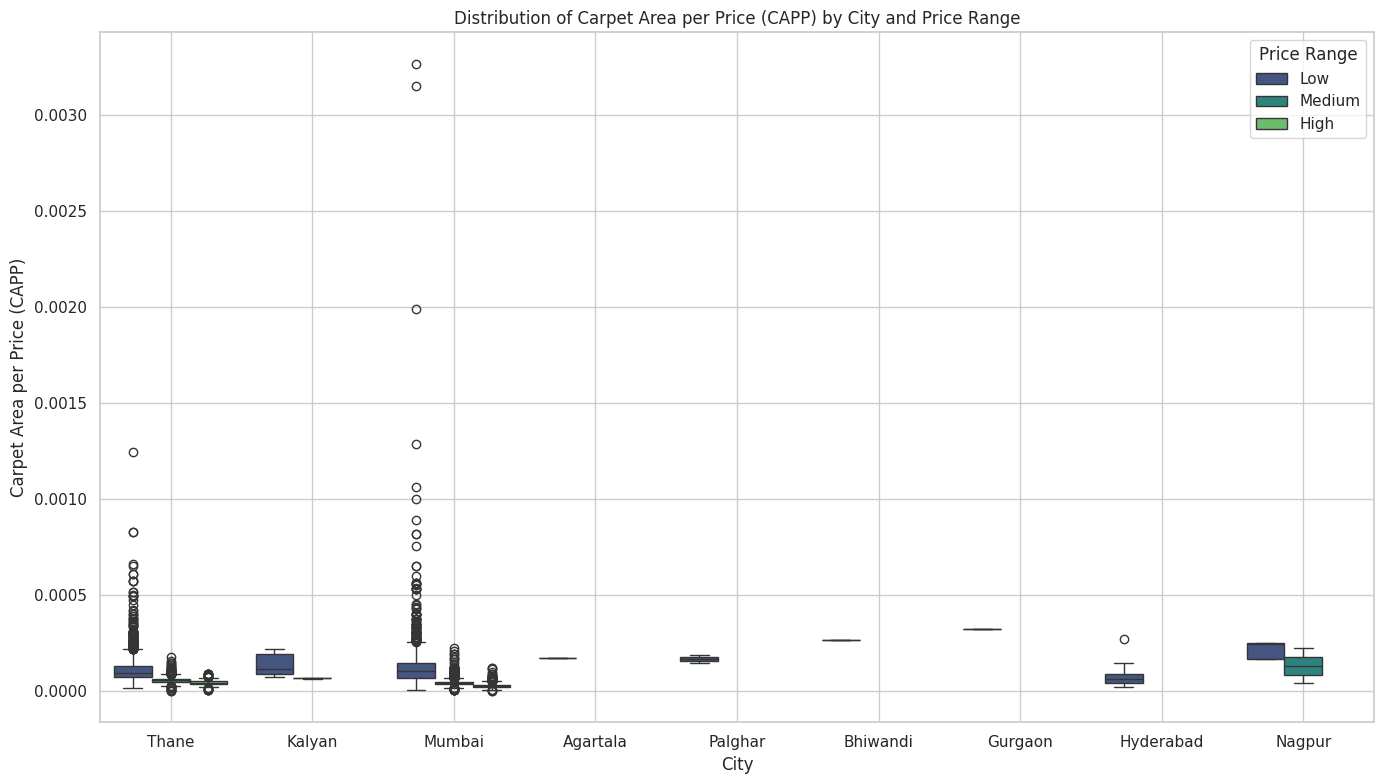

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df8, x='City', y='CAPP', hue='Price Range', palette='viridis')
plt.title('Distribution of Carpet Area per Price (CAPP) by City and Price Range')
plt.xlabel('City')
plt.ylabel('Carpet Area per Price (CAPP)')
plt.legend(title='Price Range', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


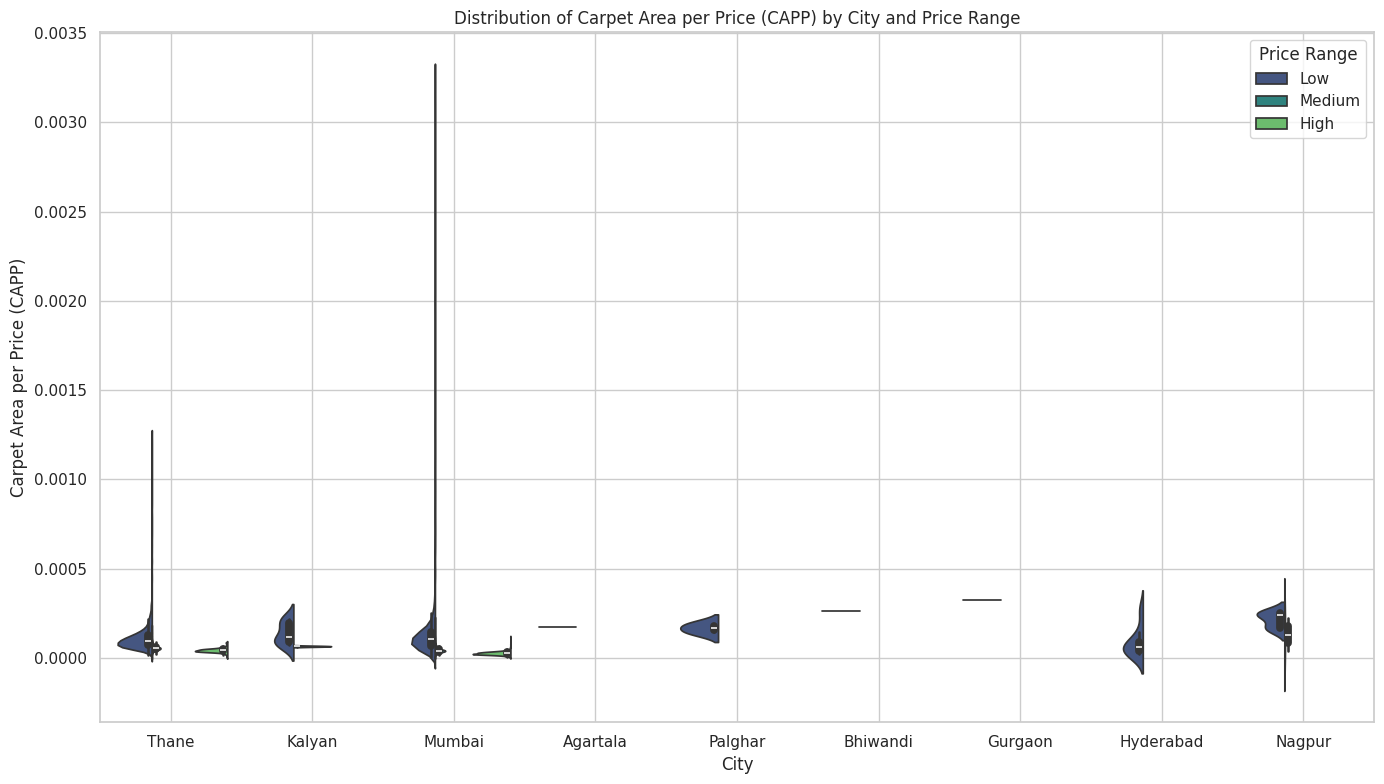

In [ ]:
plt.figure(figsize=(14, 8))
sns.violinplot(data=df8, x='City', y='CAPP', hue='Price Range', split=True, palette='viridis')
plt.title('Distribution of Carpet Area per Price (CAPP) by City and Price Range')
plt.xlabel('City')
plt.ylabel('Carpet Area per Price (CAPP)')
plt.legend(title='Price Range', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# print(df8.info())
# Filter properties with the highest CAPP for each city and price range
# print(df8.groupby(['City', 'Price Range'])['CAPP'].idxmax().dropna())
best_properties_df = df8.loc[df8.groupby(['City', 'Price Range'])['CAPP'].idxmax().dropna()]

# Display the best properties
print(best_properties_df)

          ID Possession Status Availability Starts From  Floor No  Commercial  \
593    12066     Ready to Move               2022-12-01         1           1   
3107    9470     Ready to Move               2025-12-01         2           0   
6173    6322     Ready to Move               2022-12-01         1           0   
8197    4184     Ready to Move               2023-06-01         0           0   
276    12397     Ready to Move               2024-12-01         3           0   
98     12587     Ready to Move               2023-04-01         0           0   
11325    905     Ready to Move               2023-12-01        20           1   
9869    2412     Ready to Move               2023-08-01         8           0   
7876    4525     Ready to Move               2023-04-01         8           0   
11071   1171     Ready to Move               2022-04-01         1           0   
11165   1070     Ready to Move               2023-01-01         1           0   
2031   10597     Ready to Mo

<ipython-input-38-51026c746fa7>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  best_properties_df = df8.loc[df8.groupby(['City', 'Price Range'])['CAPP'].idxmax().dropna()]


4. Certain investors seek to compare investment opportunities in less expensive and more expensive
localities within each city. For instance, compare the average Carpet Area of high-budget properties
in prime locations (isPrimeLocationProperty) versus non-prime locations.

In [ ]:
df9 = df8.copy()
best_properties_df = df9.groupby(['City', 'Price Range'])['Carpet Area'].mean()
# Display the best properties
# print(best_properties_df)

# Convert the Series to a DataFrame and reset the index
best_properties_df = best_properties_df.reset_index()
best_properties_df.columns = ['City', 'Price Range', 'ACA']

# Merge df9 with best_properties_df to add the ACA column
df9 = df9.merge(best_properties_df, on=['City', 'Price Range'], how='left')


<ipython-input-39-19381f4f6935>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  best_properties_df = df9.groupby(['City', 'Price Range'])['Carpet Area'].mean()


City
Mumbai    918.346215
Thane     836.181094
Name: ACA, dtype: float64
City
Kalyan     640.000000
Mumbai     803.723287
Nagpur    1250.000000
Thane      777.685615
Name: ACA, dtype: float64


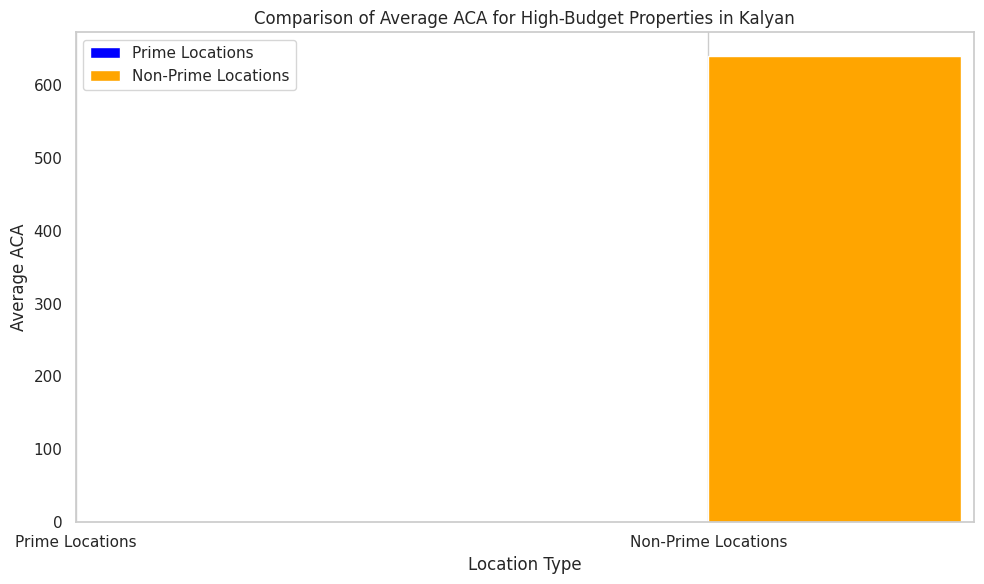

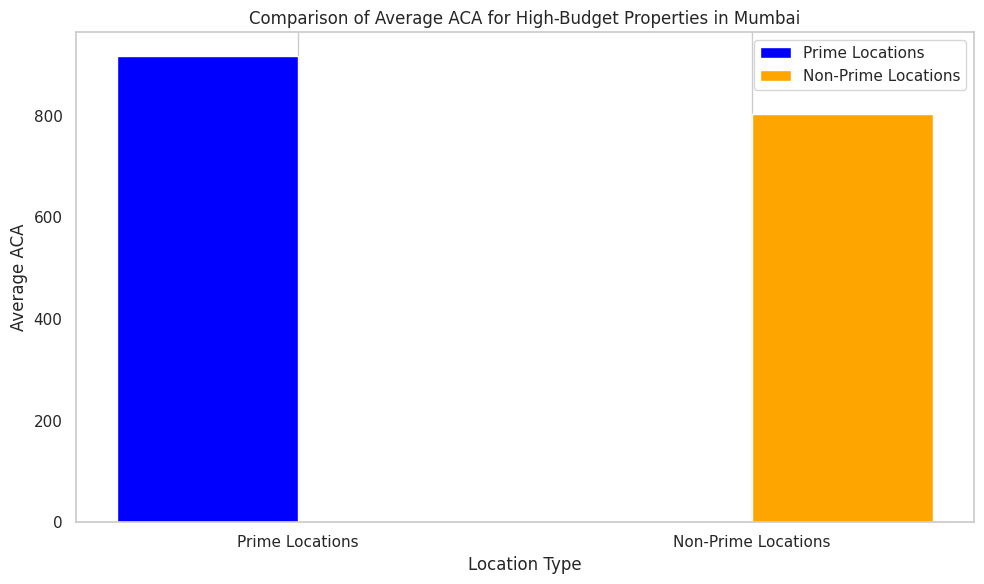

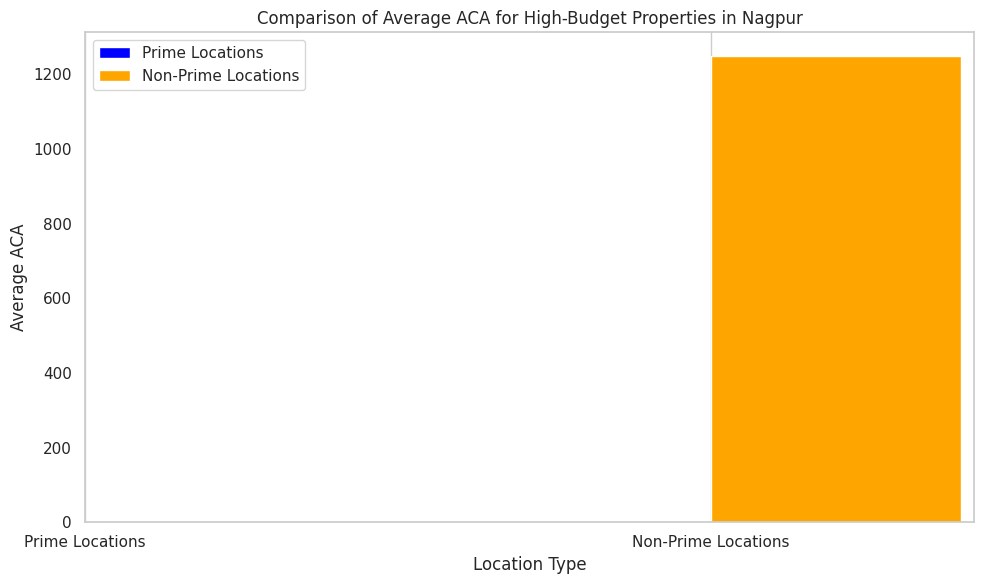

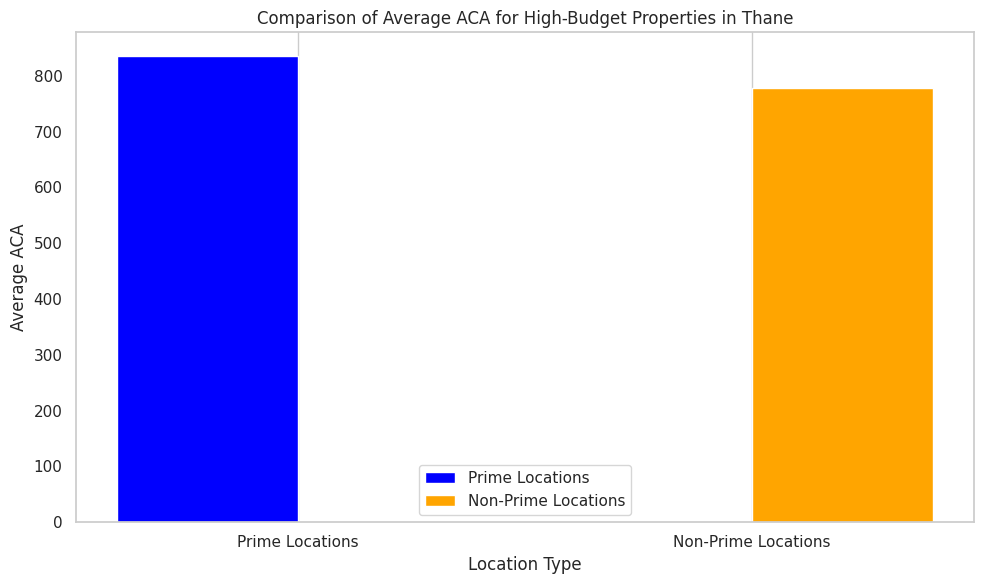

In [ ]:
# Filter for high-budget properties
# high_budget_properties = df9[df9['Price Range'] == 'High' or df9['Price Range'] == 'Medium']
high_budget_properties = df9[(df9['Price Range'] == 'High') | (df9['Price Range'] == 'Medium')]


# Separate into prime and non-prime locations
prime_properties = high_budget_properties[high_budget_properties['isPrimeLocationProperty'] == 1]
non_prime_properties = high_budget_properties[high_budget_properties['isPrimeLocationProperty'] == 0]

# Calculate average ACA for both prime and non-prime locations for each city
average_aca_prime = prime_properties.groupby('City')['ACA'].mean()
average_aca_non_prime = non_prime_properties.groupby('City')['ACA'].mean()
print(average_aca_prime)
print(average_aca_non_prime)
# Combine results into a summary DataFrame
summary_df = pd.DataFrame({
    'Prime Location ACA': average_aca_prime,
    'Non-Prime Location ACA': average_aca_non_prime
})
# .fillna(0)  # Fill NaN with 0 for cities that have only one type of location

# Reset index for plotting
summary_df.reset_index(inplace=True)

# Plotting each city separately
for city in summary_df['City']:
    city_data = summary_df[summary_df['City'] == city]

    # Plot
    plt.figure(figsize=(10, 6))

    # Set x-axis positions
    x_pos = [0, 1]

    # Plot for Prime Locations
    plt.bar(x_pos[0] - 0.2, city_data['Prime Location ACA'].values[0], width=0.4, label='Prime Locations', color='blue', align='center')

    # Plot for Non-Prime Locations
    plt.bar(x_pos[1] + 0.2, city_data['Non-Prime Location ACA'].values[0], width=0.4, label='Non-Prime Locations', color='orange', align='center')

    # Enhancing the plot
    plt.xlabel('Location Type')
    plt.ylabel('Average ACA')
    plt.title(f'Comparison of Average ACA for High-Budget Properties in {city}')
    plt.xticks(x_pos, ['Prime Locations', 'Non-Prime Locations'])
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()

    # Show the plot
    plt.show()

7. Some investors want to analyze the impact of various amenities (e.g., Swimming Pool, Gymnasium,
Club House) on property prices in Mumbai and Thane. Which amenities seem to add the most value?
Are there differences in amenity preferences between the two cities

In [ ]:
# print(df9.info(verbose=True)) #, show_counts=True))
# df9['City'].unique()

df10 = df9.copy()
# Assuming df9 is your DataFrame
df10 = df10[df10['City'].isin(['Mumbai', 'Thane'])]

# List of amenities to analyze
amenities = ['Commercial', 'Society', 'isPrimeLocationProperty', 'Power Back Up', 'Lift', 'Rain Water Harvesting', 'Club House', 'Swimming Pool', 'Gymnasium', 'Park', 'Parking', 'Security', 'Water Storage', 'Private Terrace/Garden', 'Vaastu Compliant', 'Service/Goods Lift', 'Air Conditioned', 'Visitor Parking', 'Intercom Facility', 'Maintenance Staff', 'Waste Disposal', 'Laundry Service', 'Internet/Wi-Fi Connectivity', 'DTH Television Facility', 'RO Water System', 'Banquet Hall', 'Bar/Lounge', 'Cafeteria/Food Court', 'Conference Room', 'Piped Gas', 'Jogging and Strolling Track', 'Outdoor Tennis Courts', 'Mansion', 'Downtown', 'Skyline View', 'Wrap Around Balcony', 'Island Kitchen Layout', 'Full Glass Wall', 'House help accommodation', 'Concierge Services', 'Garden View', 'Marble flooring', 'Well Furnished', 'Modular Kitchen', 'Helipad', 'Private Jaccuzi', 'Mini Cinema Theatre', 'Golf Course', 'Infinity Swimming Pool', 'Sea facing', 'Skydeck', 'Earth quake resistant', 'Theme based Architectures', 'Health club with Steam / Jaccuzi', 'Large Open space', 'Fingerprint Access', 'Grand Entrance lobby', 'Private Garage', 'Fireplace', 'Wine Cellar', 'Sky Villa', 'Water Front', 'Hilltop', 'Smart Home', 'Barbeque space', 'Kids play area', 'Library', 'Puja Room', 'Study', 'Servant Room', 'Store', 'Aerobics Room', 'Canopy Walk', 'Coffee Lounge & Restaurants', 'Dance Studio', 'Event Space & Amphitheatre', 'Flower Gardens', 'Guest Accommodation', 'Indoor Squash & Badminton Courts', 'Kids Play Area', 'Kids Play Pool With Water Slides', 'Library And Business Centre', 'Meditation Area', 'Multipurpose Courts', 'Recreational Pool', 'Rentable Community Space', 'Retail Boulevard (Retail Shops)', 'Cycling & Jogging Track', 'Fire Fighting Equipment', 'Aesthetically designed landscape garden']

# Prepare DataFrame to store results
impact_df = pd.DataFrame(columns=['City', 'Amenity', 'With Amenity Avg Price', 'Without Amenity Avg Price'])

In [ ]:
# Prepare a list to collect results
results = []

for city in ['Mumbai', 'Thane']:
    city_data = df10[df10['City'] == city]

    for amenity in amenities:
        with_amenity = city_data[city_data[amenity] == 1]['Price']
        without_amenity = city_data[city_data[amenity] == 0]['Price']

        avg_price_with = with_amenity.mean() if not with_amenity.empty else 0
        avg_price_without = without_amenity.mean() if not without_amenity.empty else 0

        results.append({
            'City': city,
            'Amenity': amenity,
            'With Amenity Avg Price': avg_price_with,
            'Without Amenity Avg Price': avg_price_without
        })

# Convert list to DataFrame
impact_df = pd.DataFrame(results)

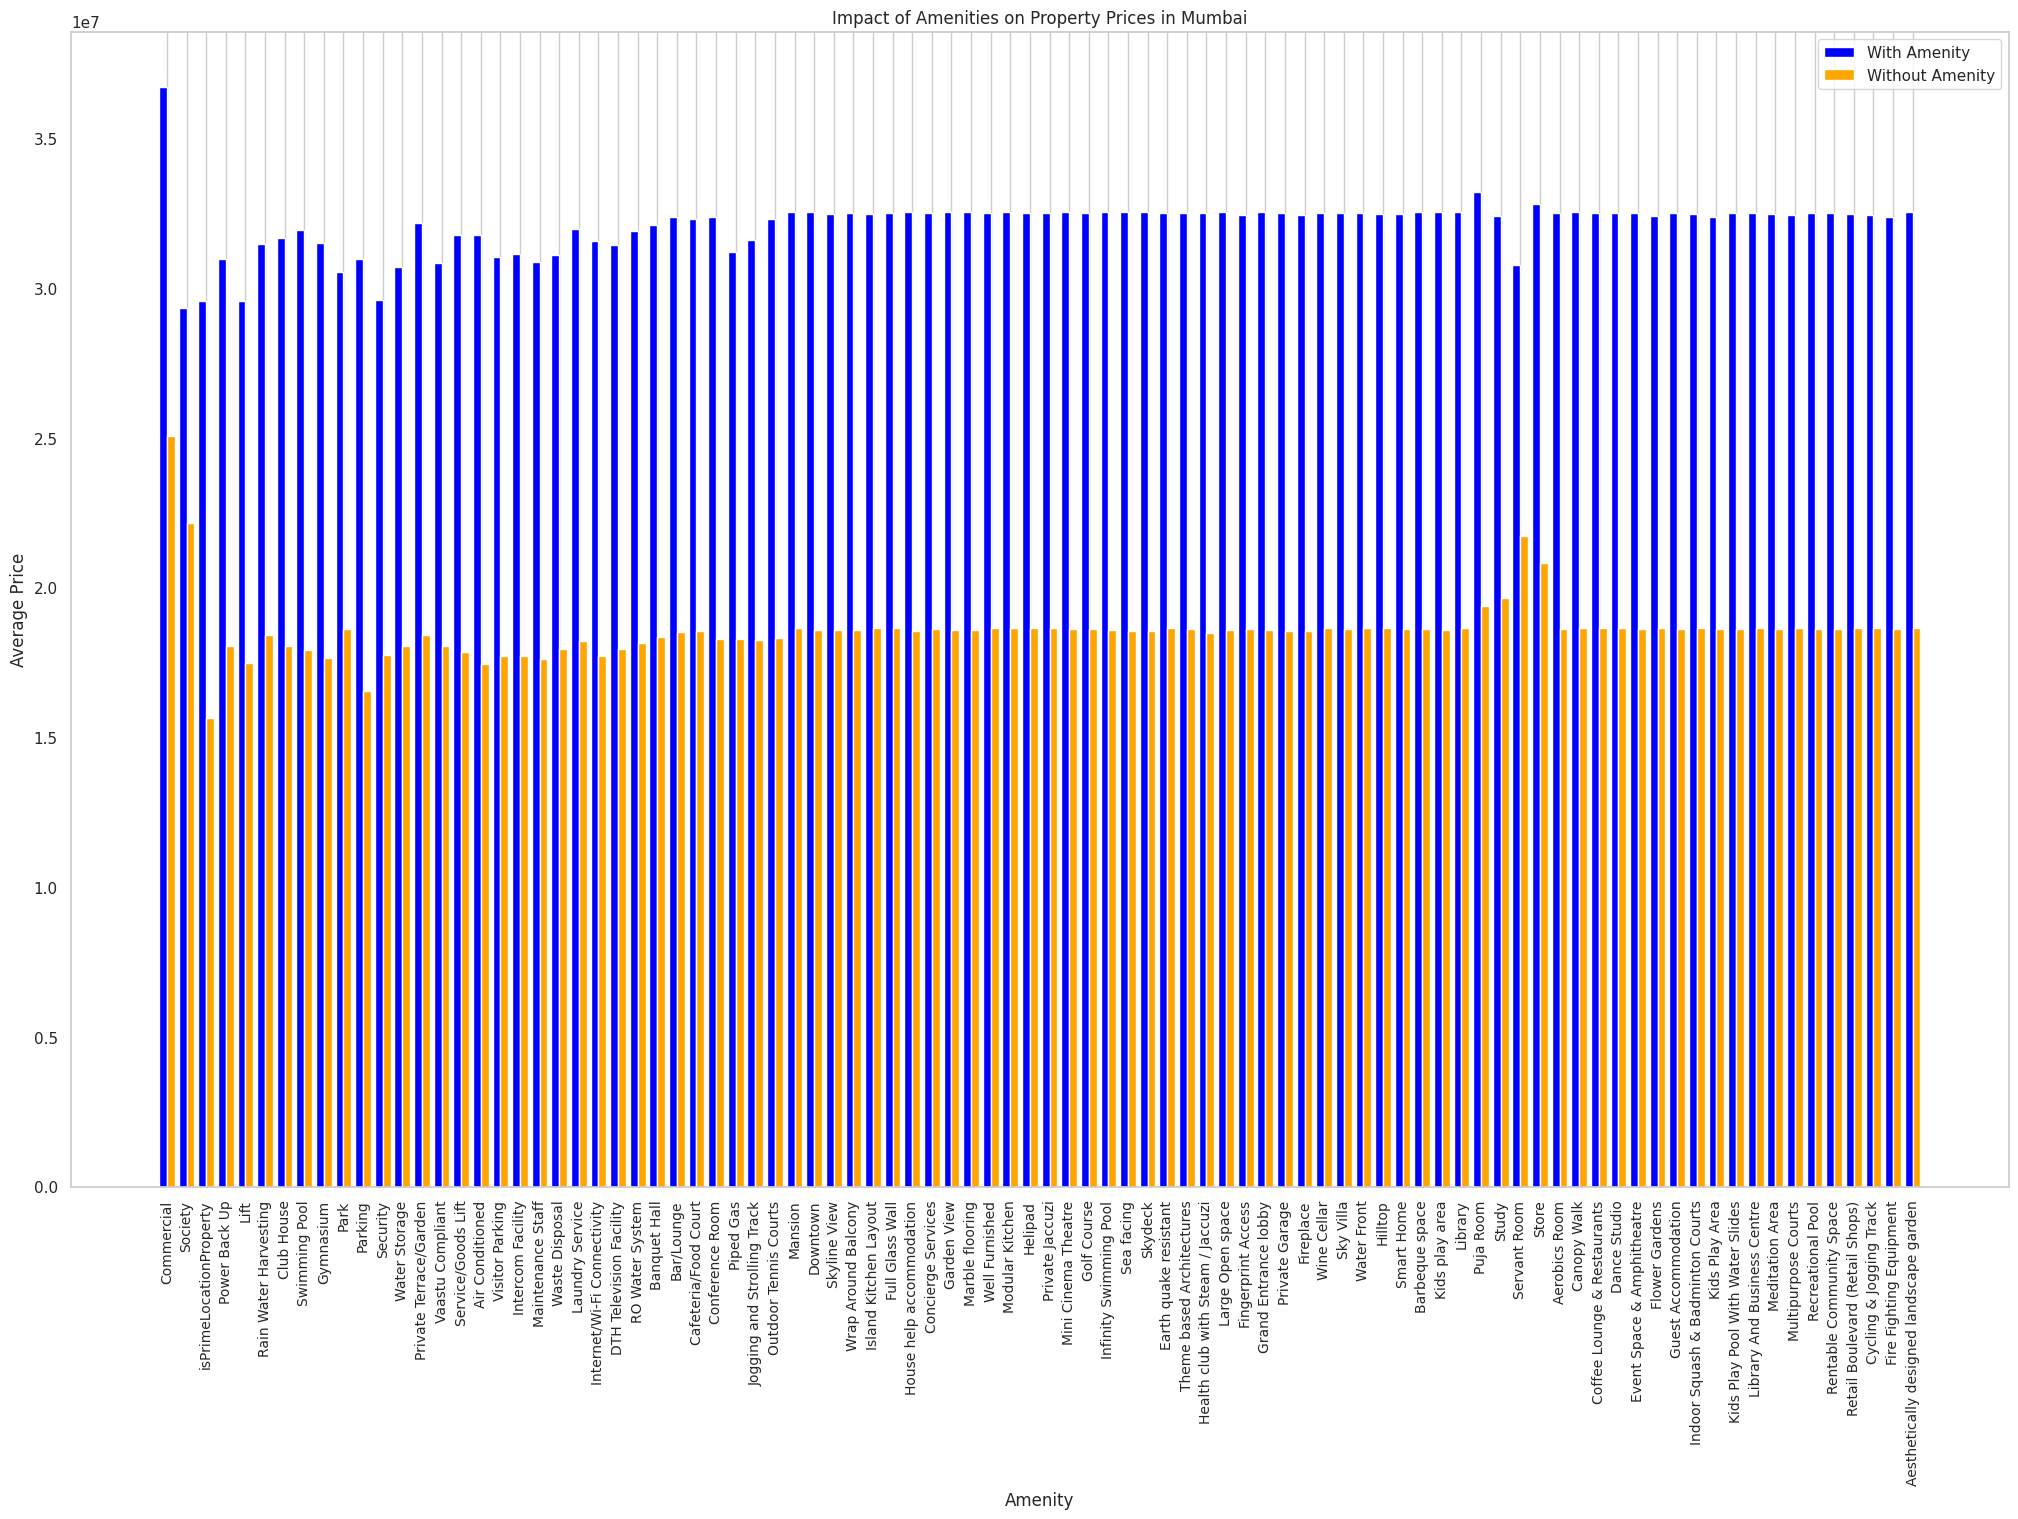

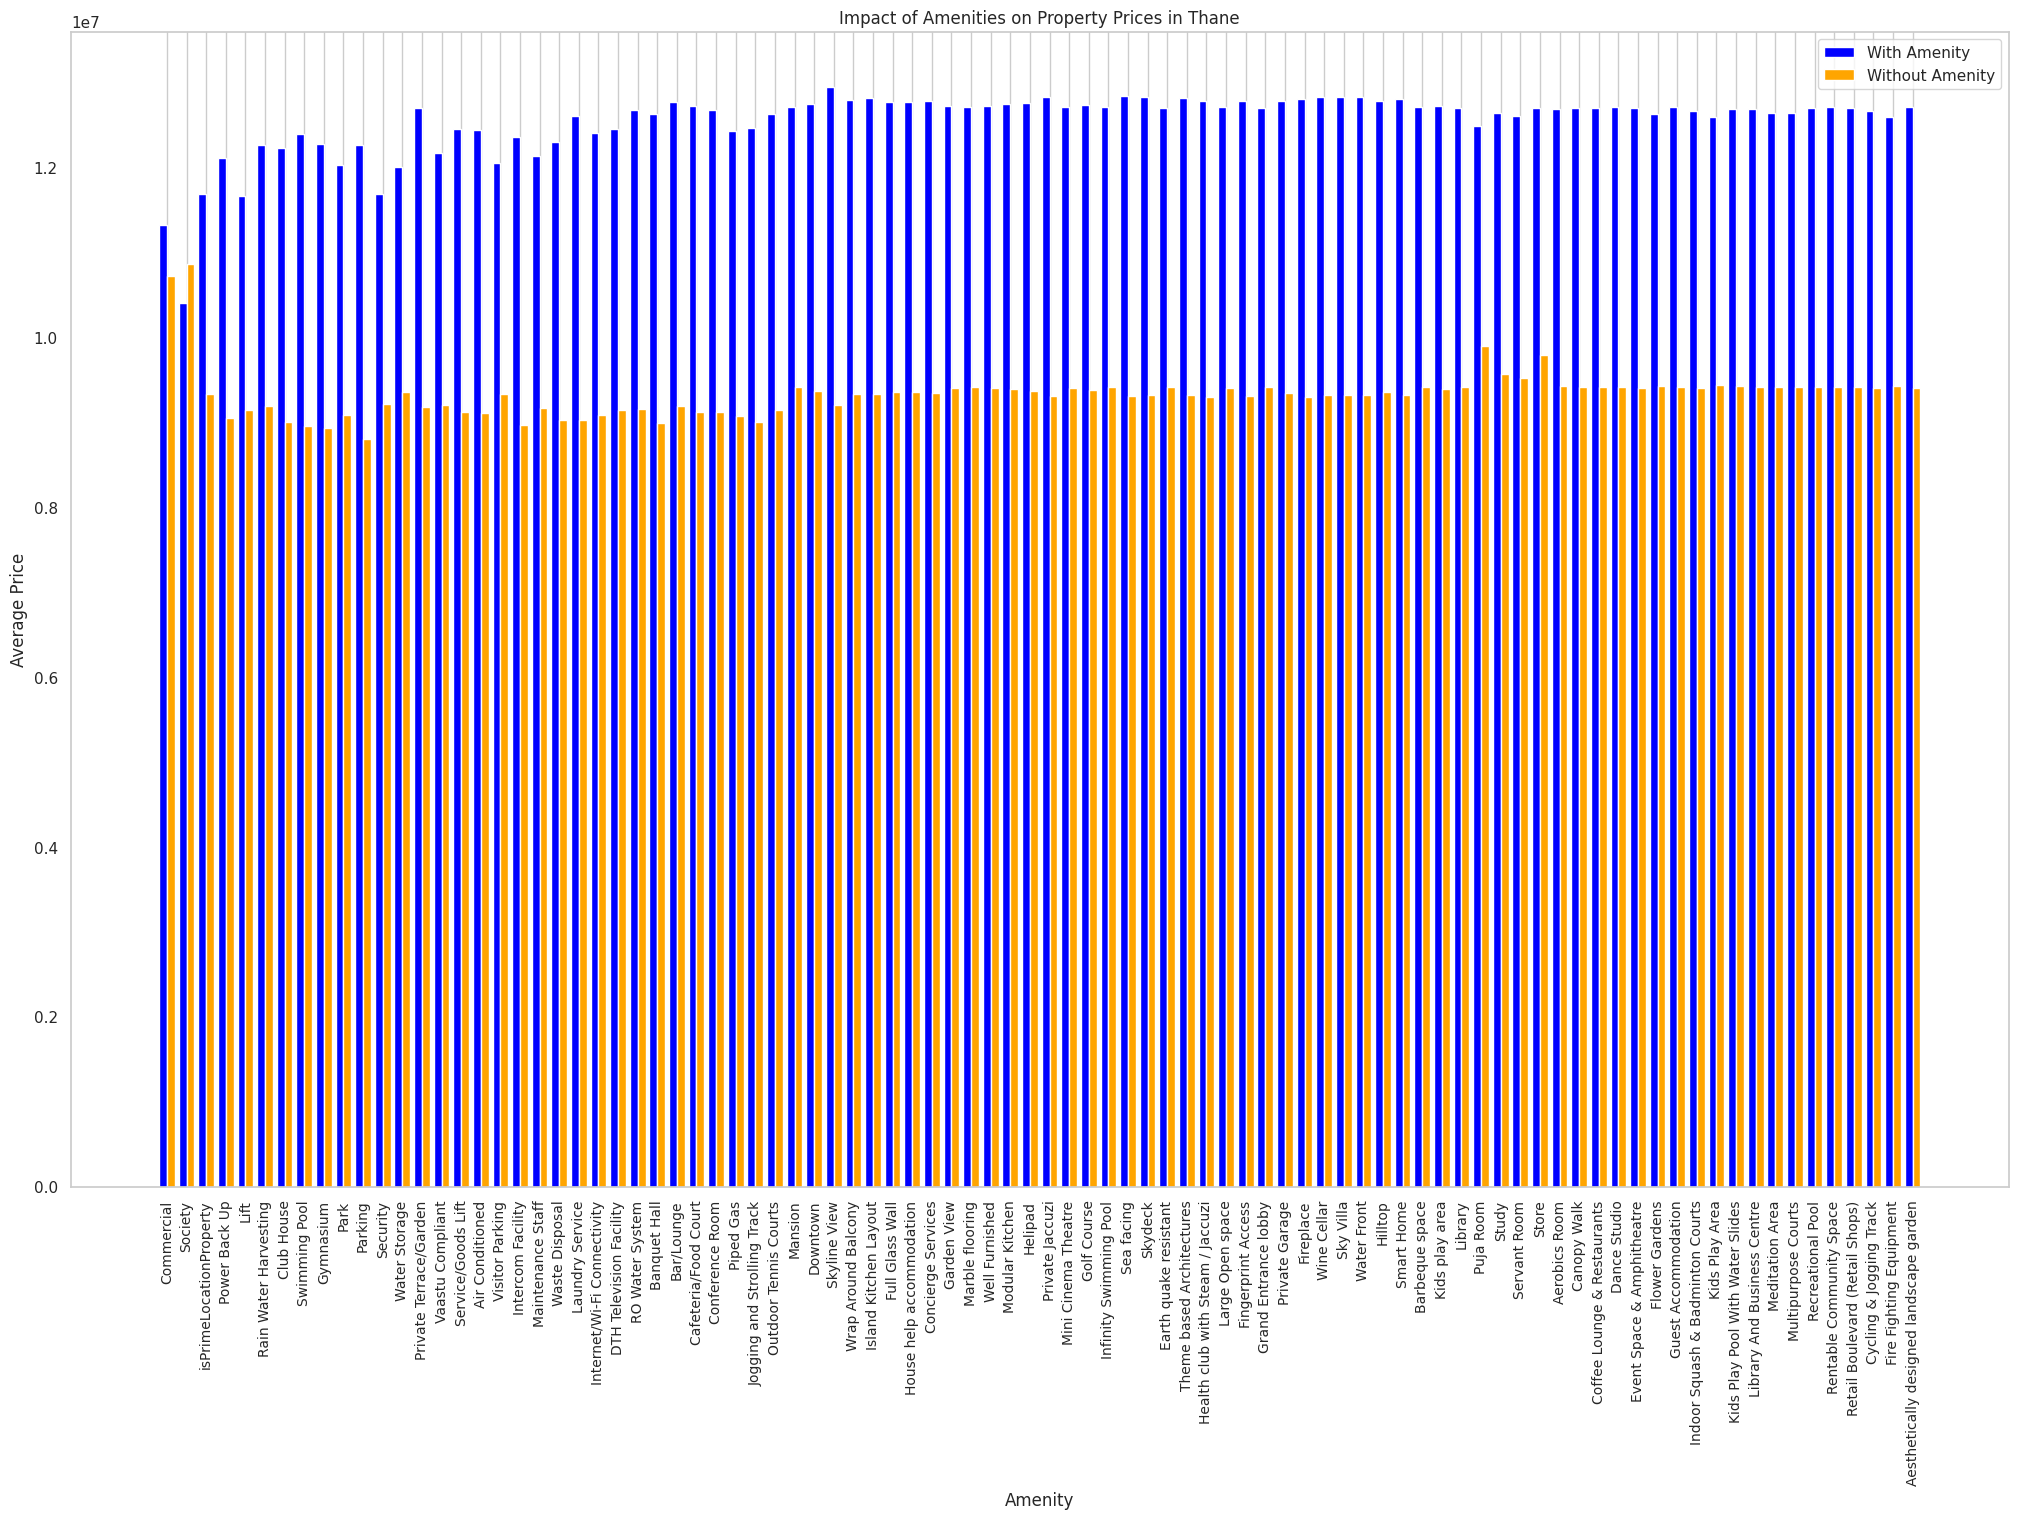

In [ ]:
# Plot results for each city
for city in ['Mumbai', 'Thane']:
    city_data = impact_df[impact_df['City'] == city]

    x = range(len(city_data))

    plt.figure(figsize=(25, 15))
    plt.bar(x, city_data['With Amenity Avg Price'], width=0.4, label='With Amenity', color='blue', align='center')
    plt.bar([i + 0.4 for i in x], city_data['Without Amenity Avg Price'], width=0.4, label='Without Amenity', color='orange', align='center')

    plt.xlabel('Amenity')
    plt.ylabel('Average Price')
    plt.title(f'Impact of Amenities on Property Prices in {city}')
    plt.xticks([i + 0.2 for i in x], city_data['Amenity'], rotation=90, fontsize=10)
    plt.legend()
    plt.grid(axis='y')
    # plt.tight_layout()
    plt.show()


8. Investors want investigate how the 'Possession Status' and 'Availability Starts From' dates affect property prices. Are there significant price differences between 'Ready to Move' properties and 'Under Construction' ones? How does this vary between Mumbai and Thane?

In [ ]:
df11 = df9.copy()
# df11 = df11[['City', 'Possession Status', 'Availability Starts From', 'Price']]
# df11 = df11[df11['City'].isin(['Mumbai', 'Thane'])]
# df11 = df11[df11['Possession Status'].isin([ 'Ready to Move', 'Under Construction'])]
df11 = df11[df11['City'].isin(['Mumbai', 'Thane']) & df11['Possession Status'].isin(['Ready to Move', 'Under Construction'])]
# df11.info(verbose=True)

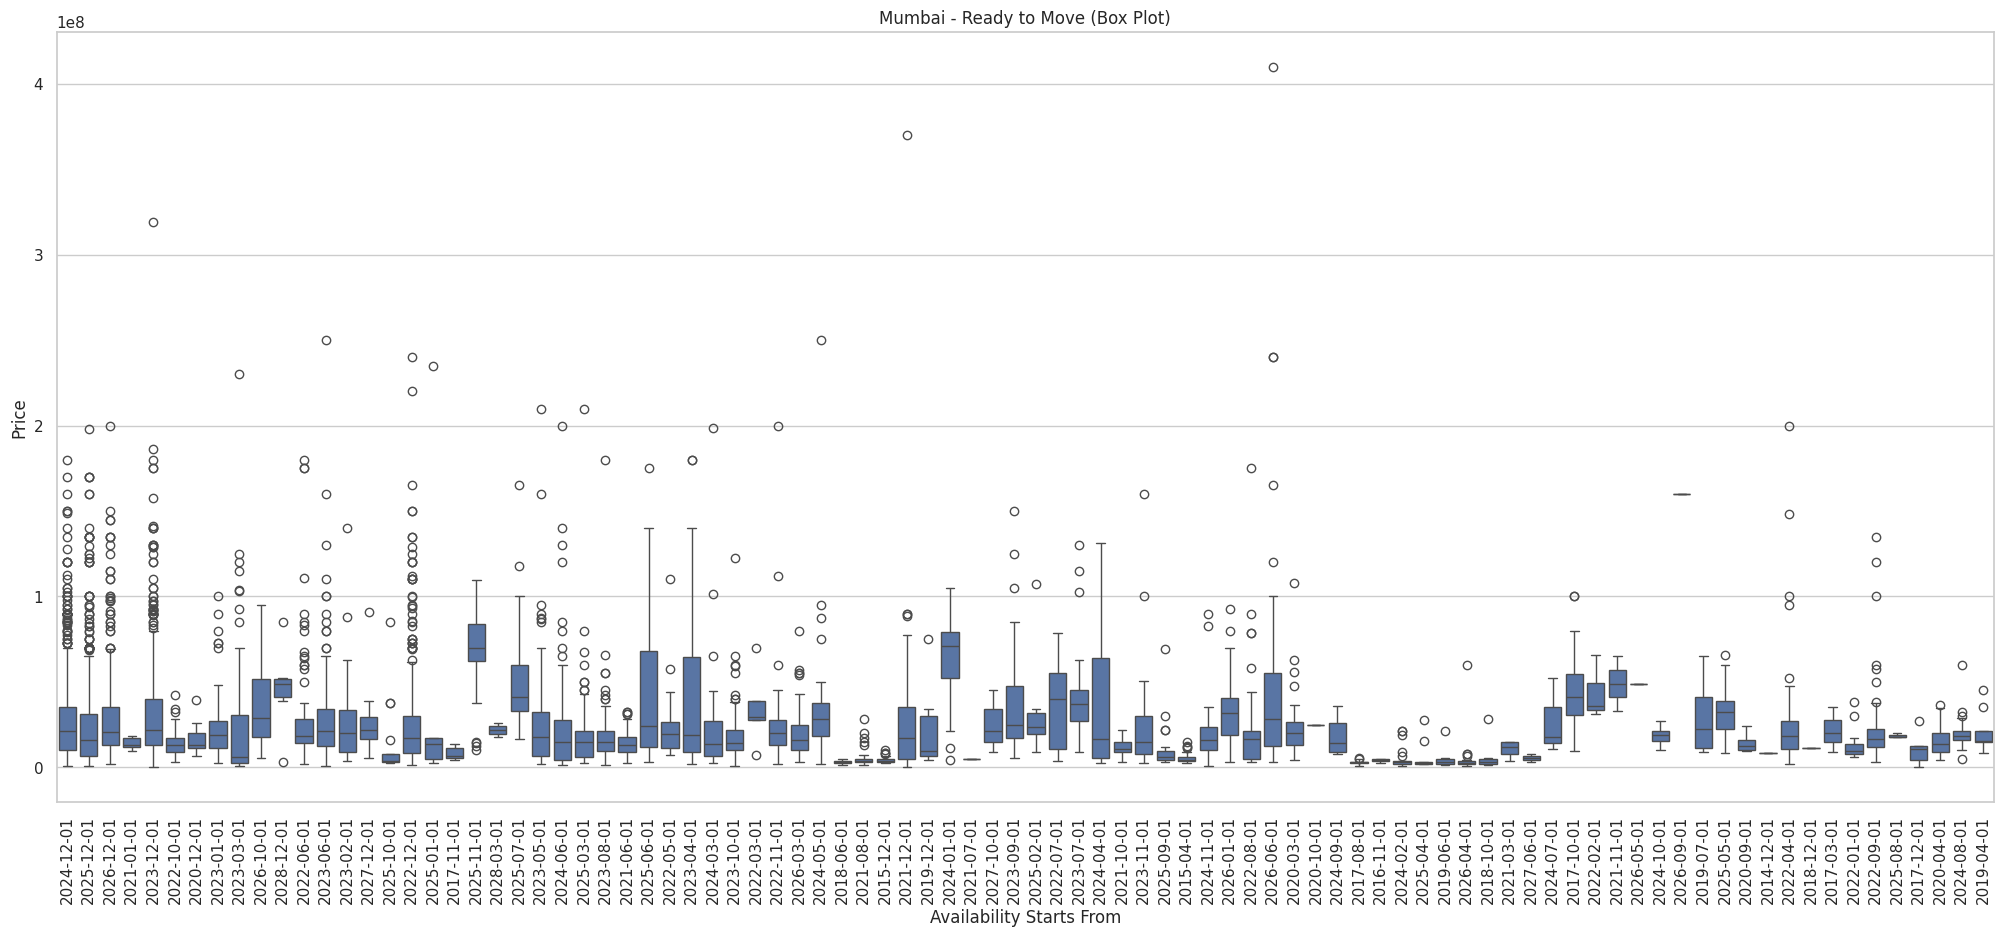

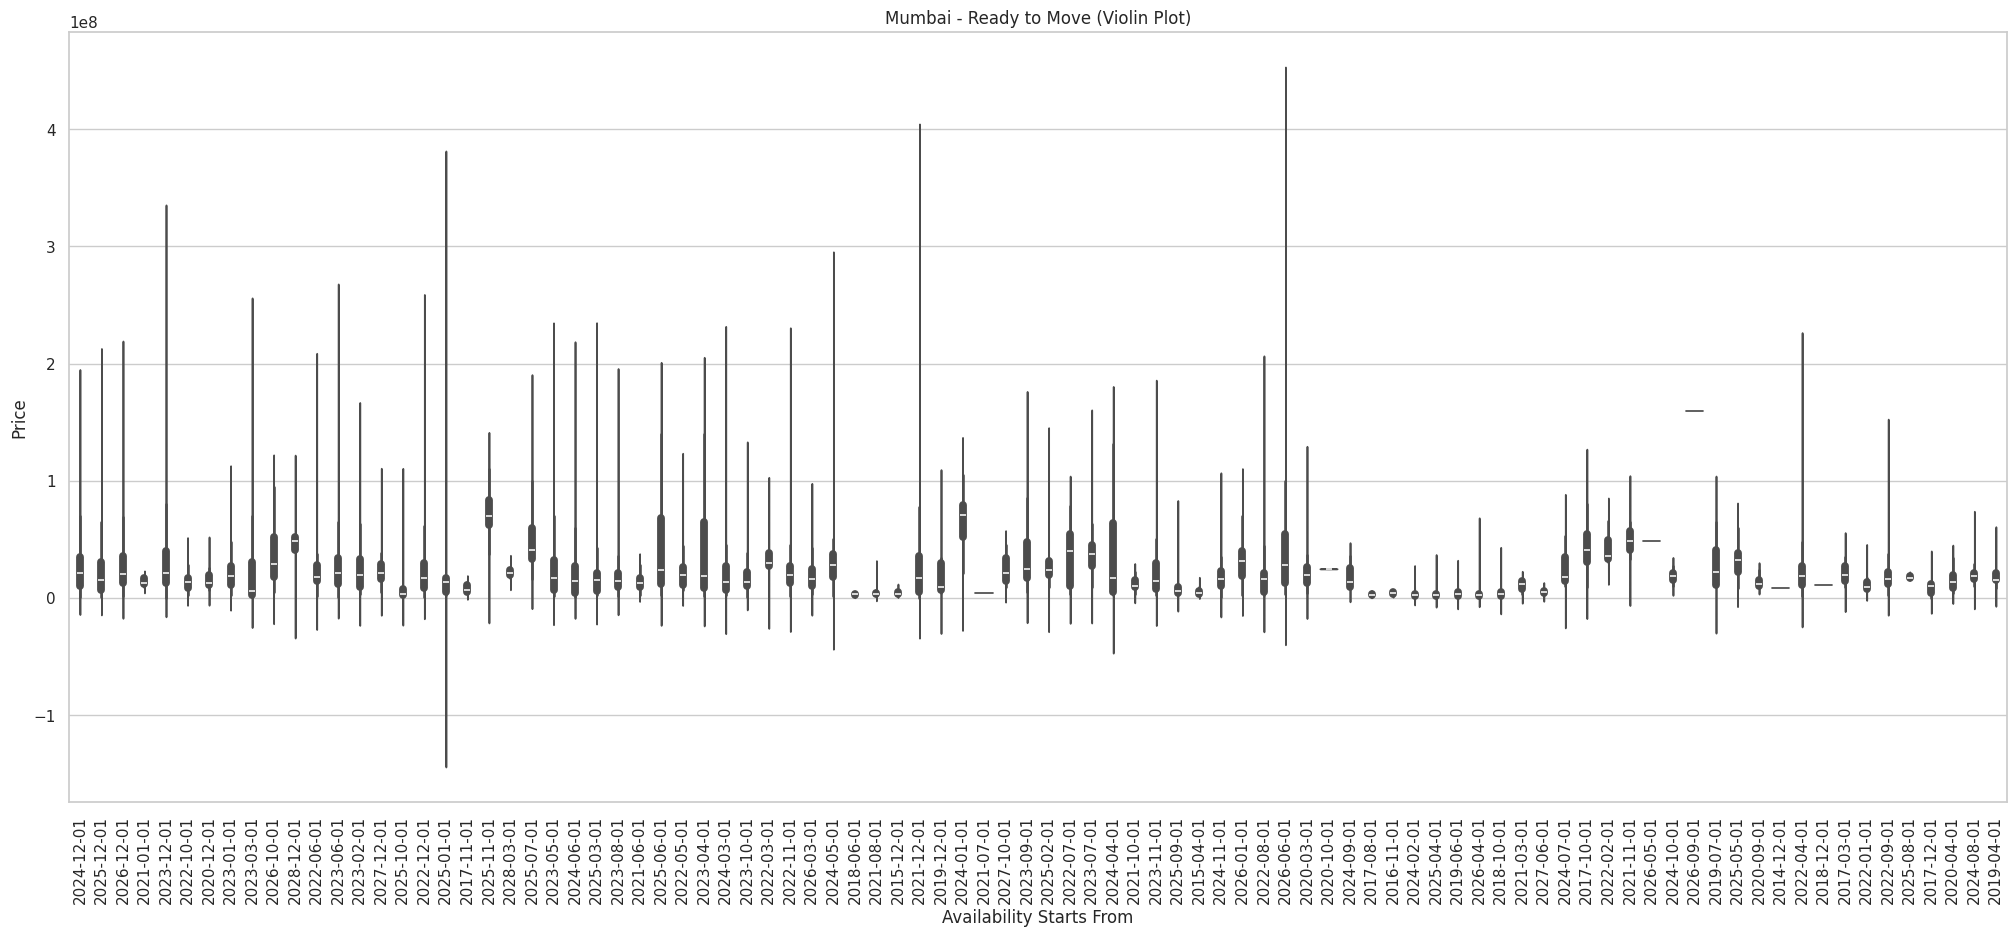

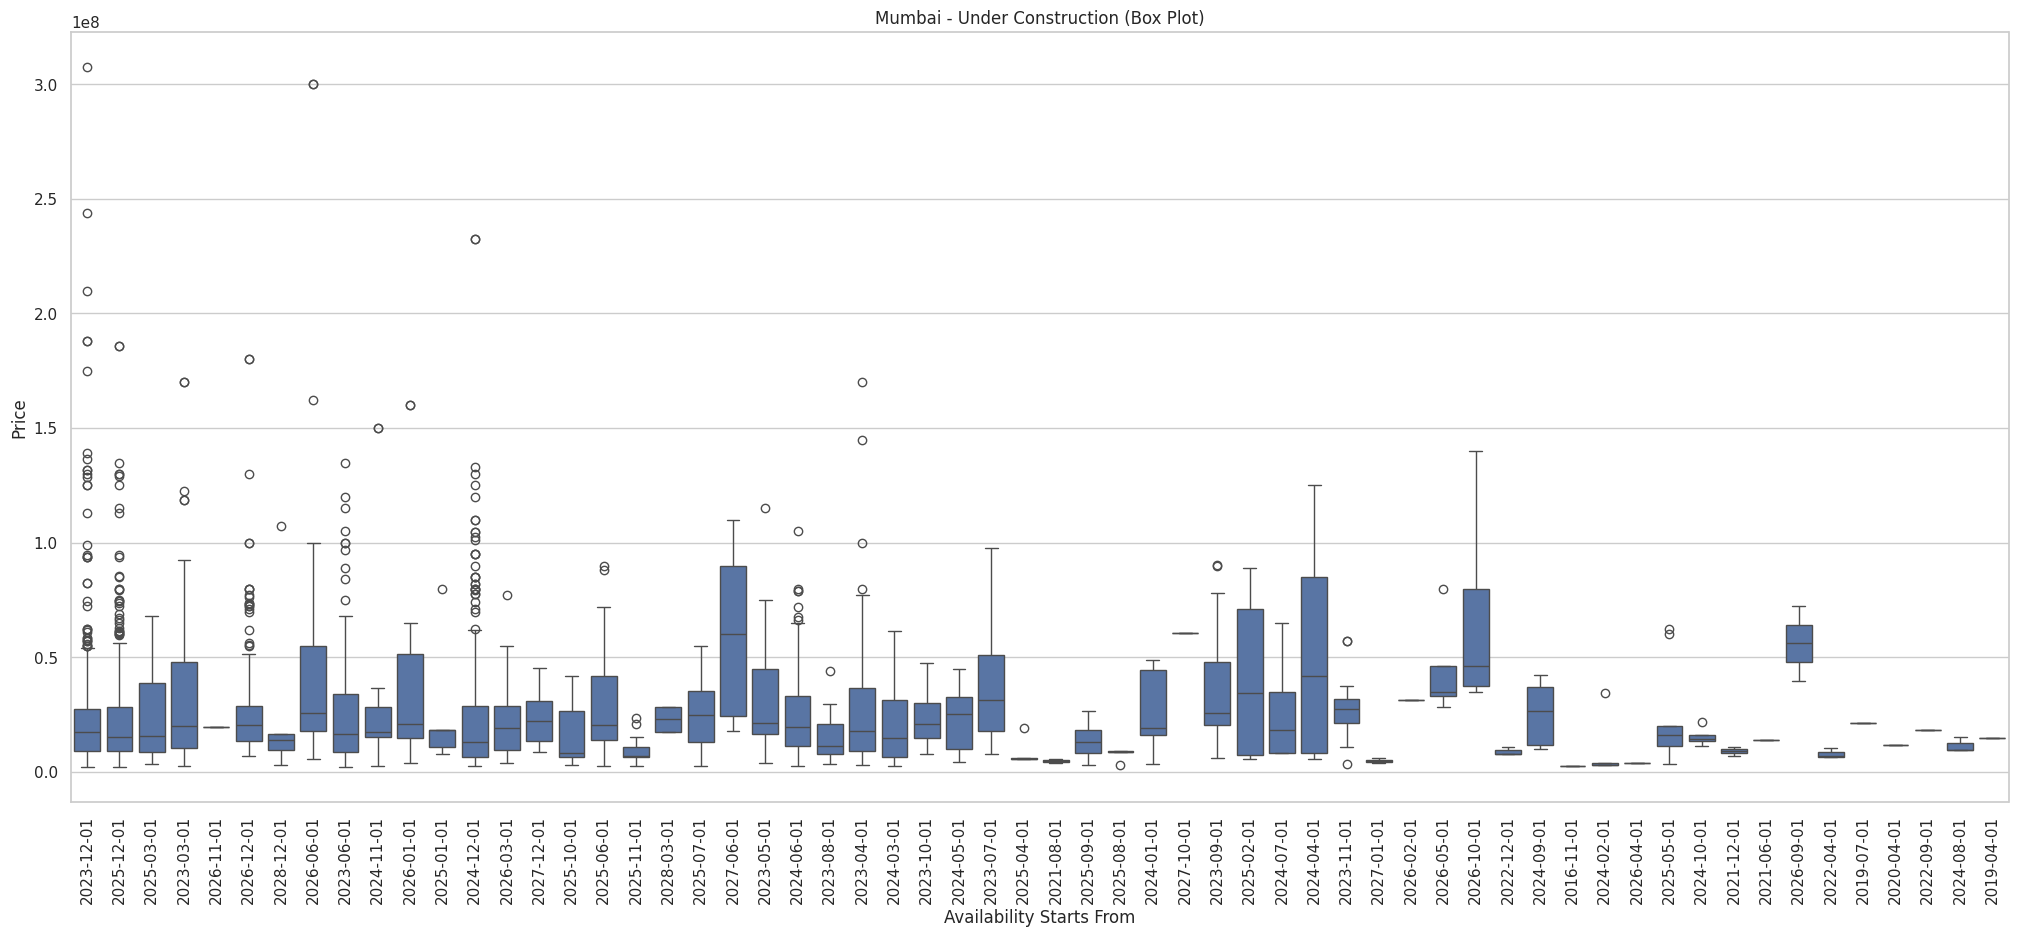

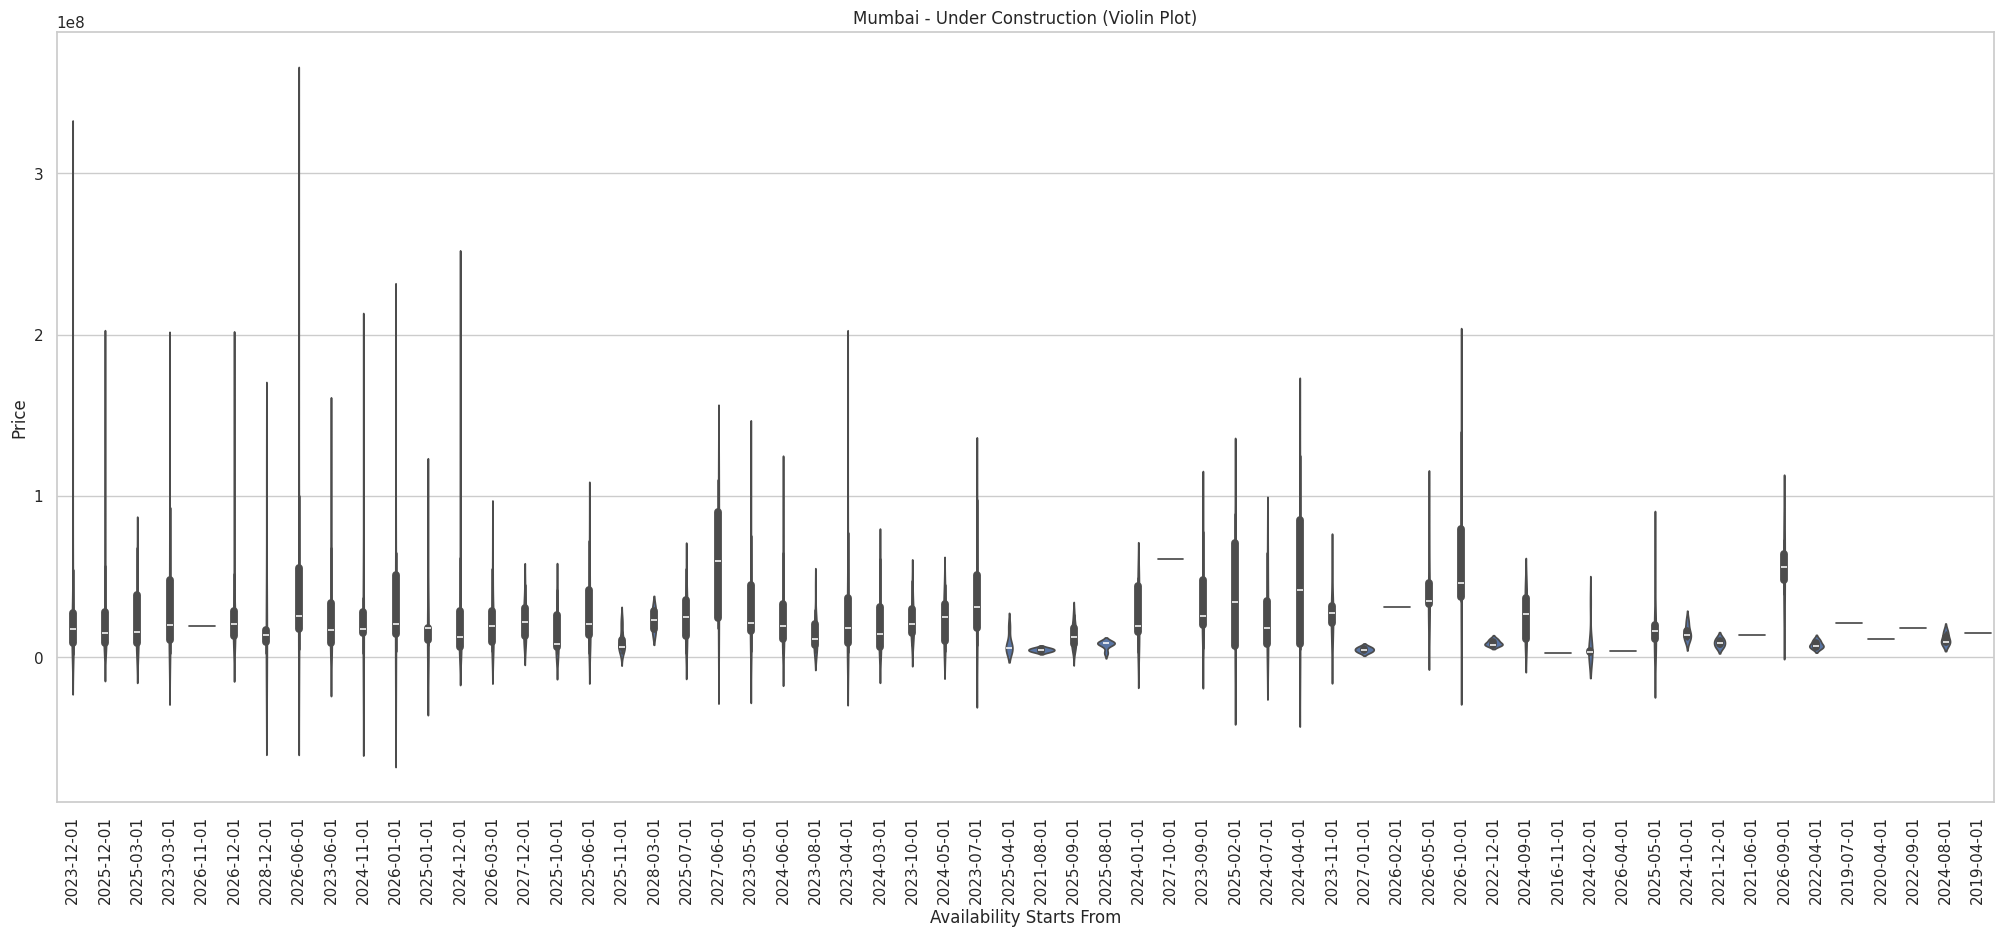

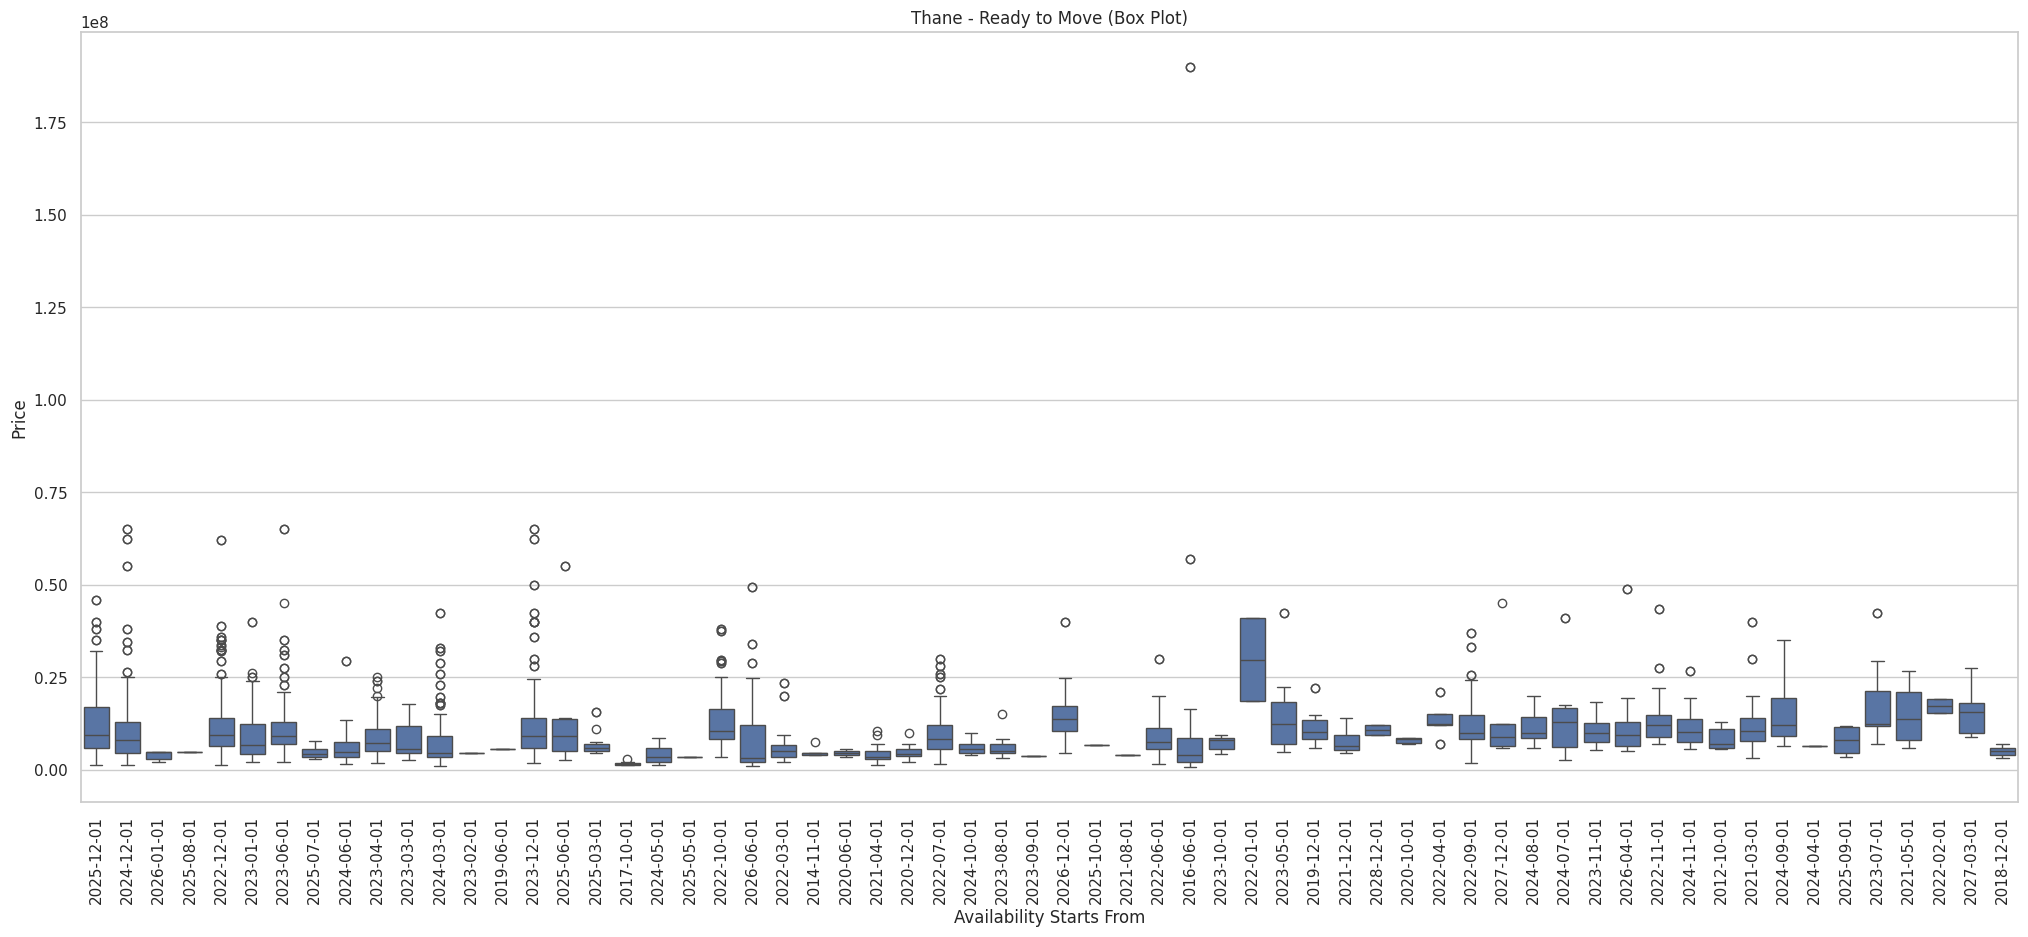

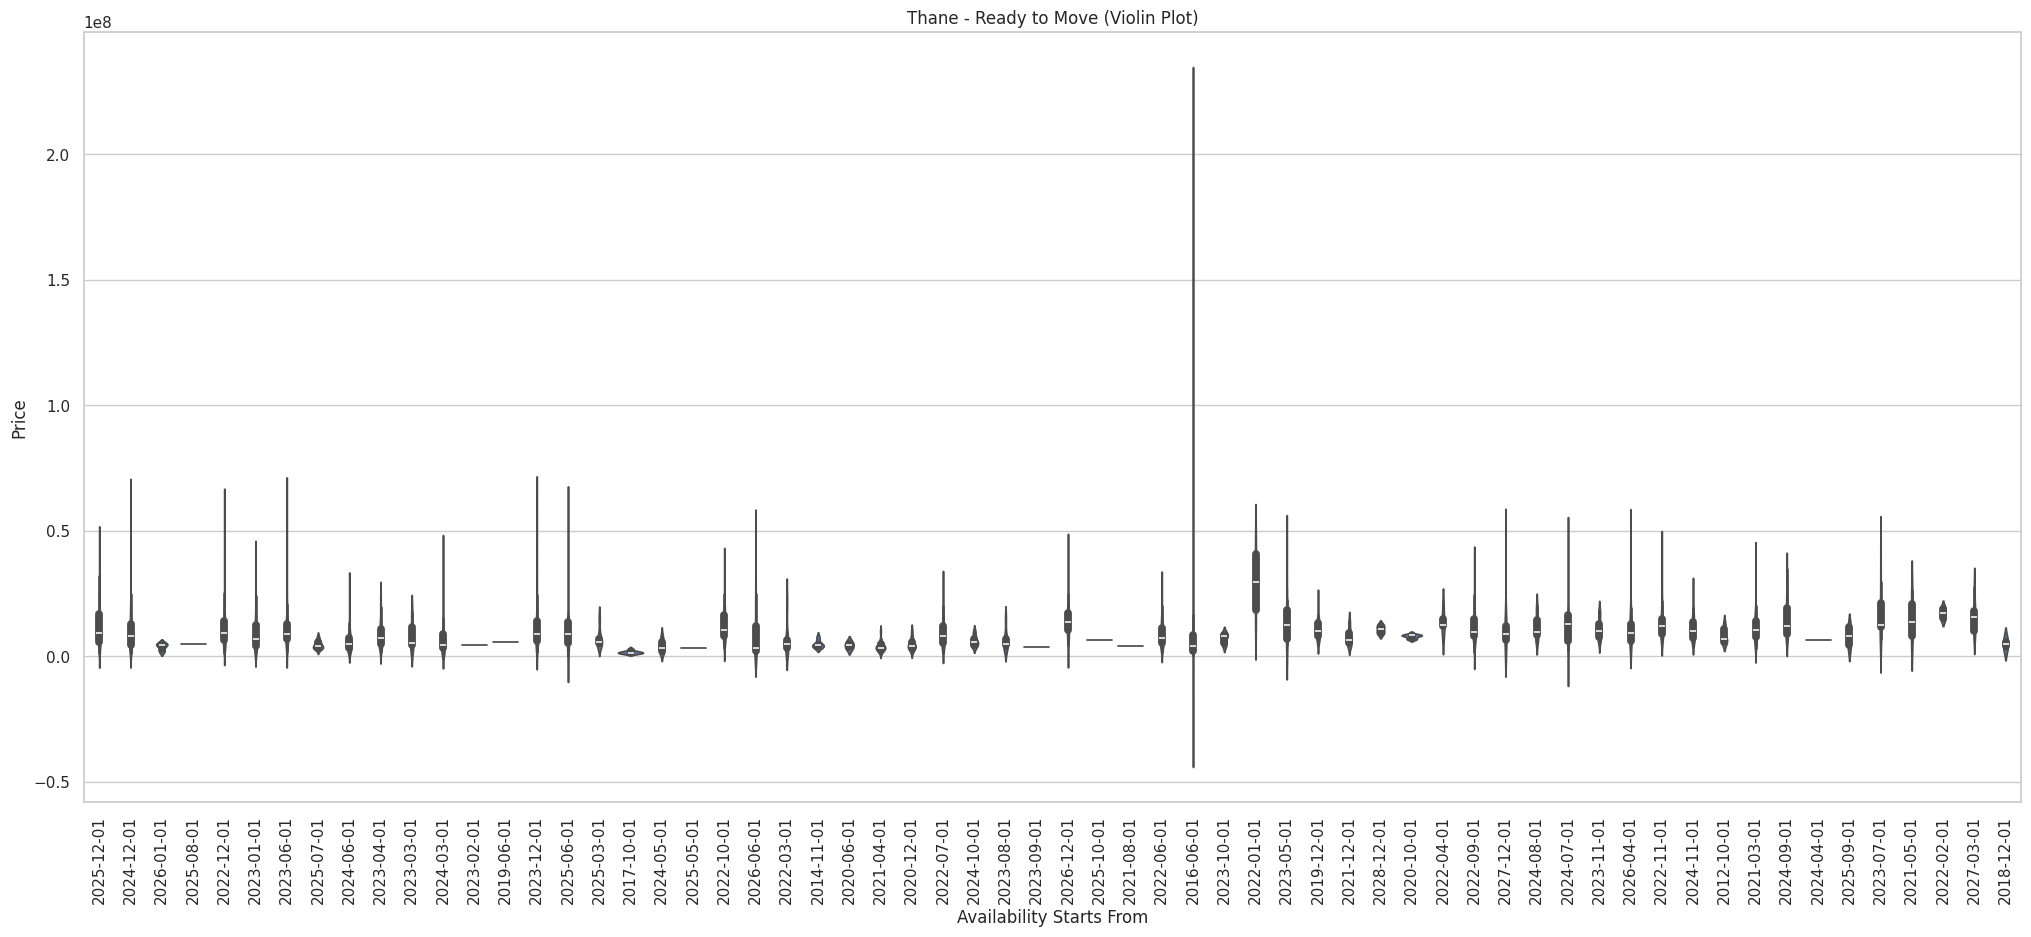

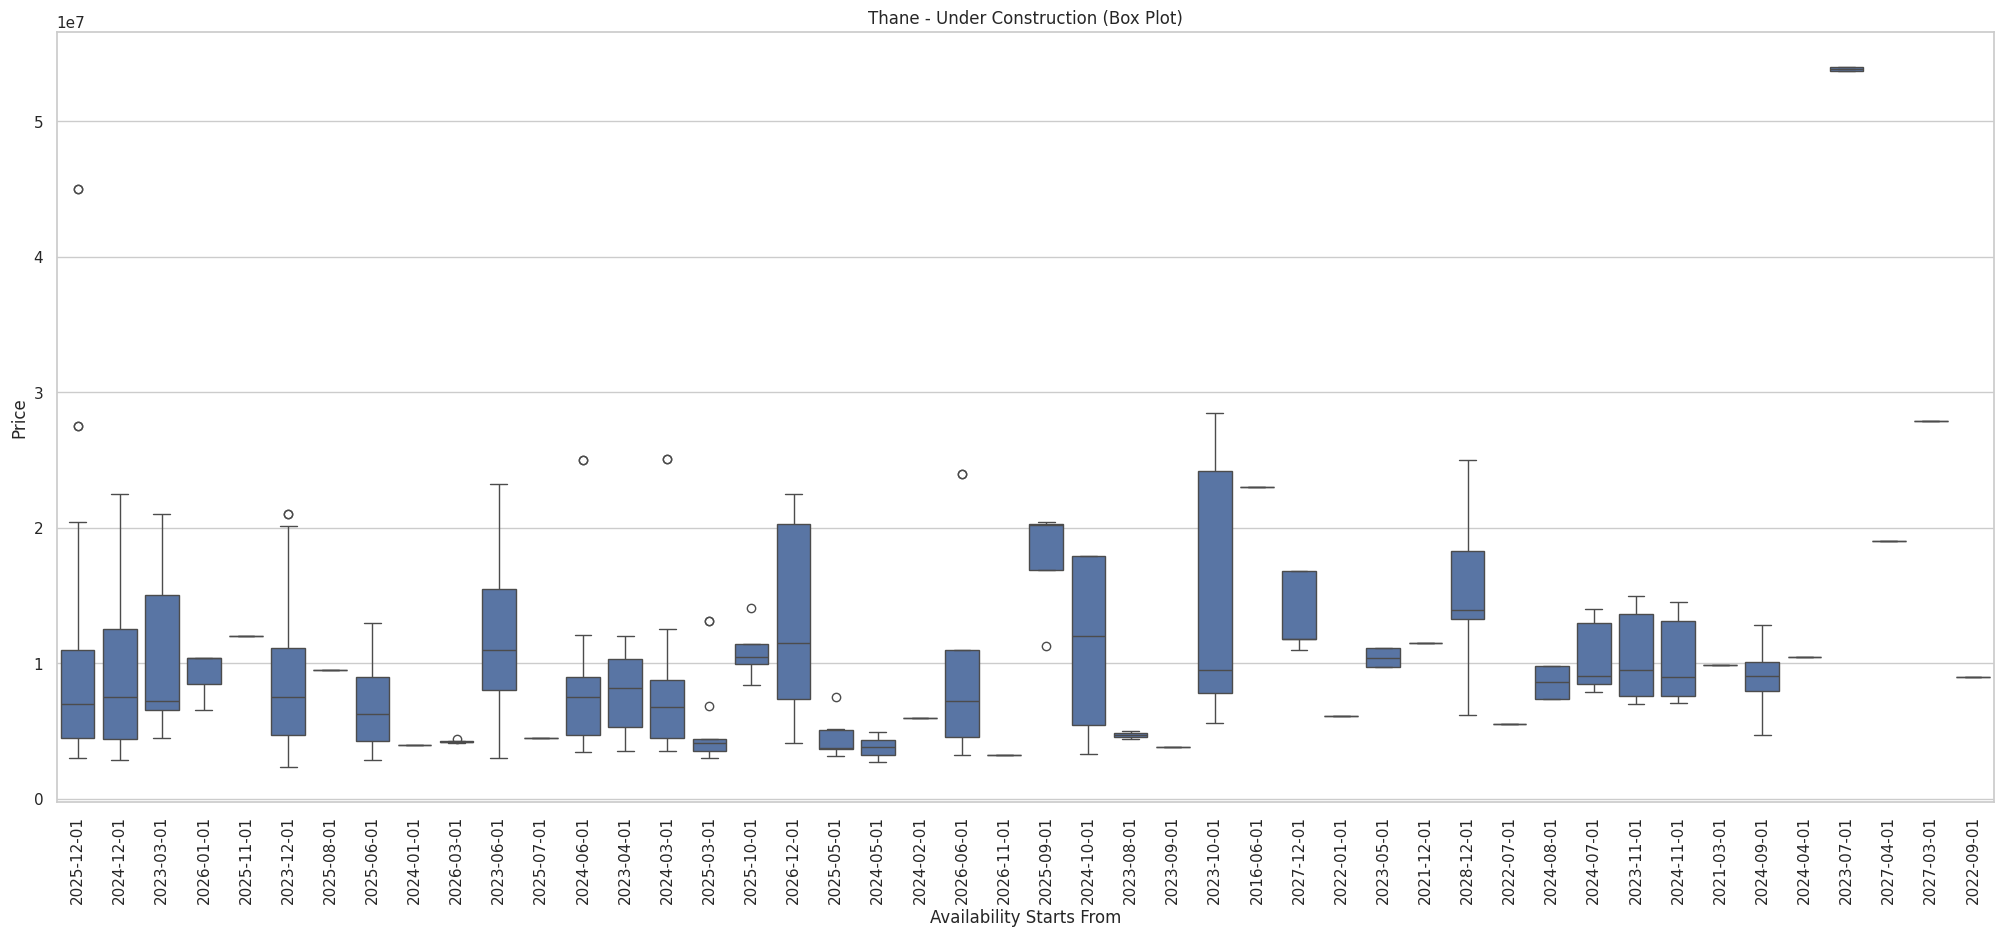

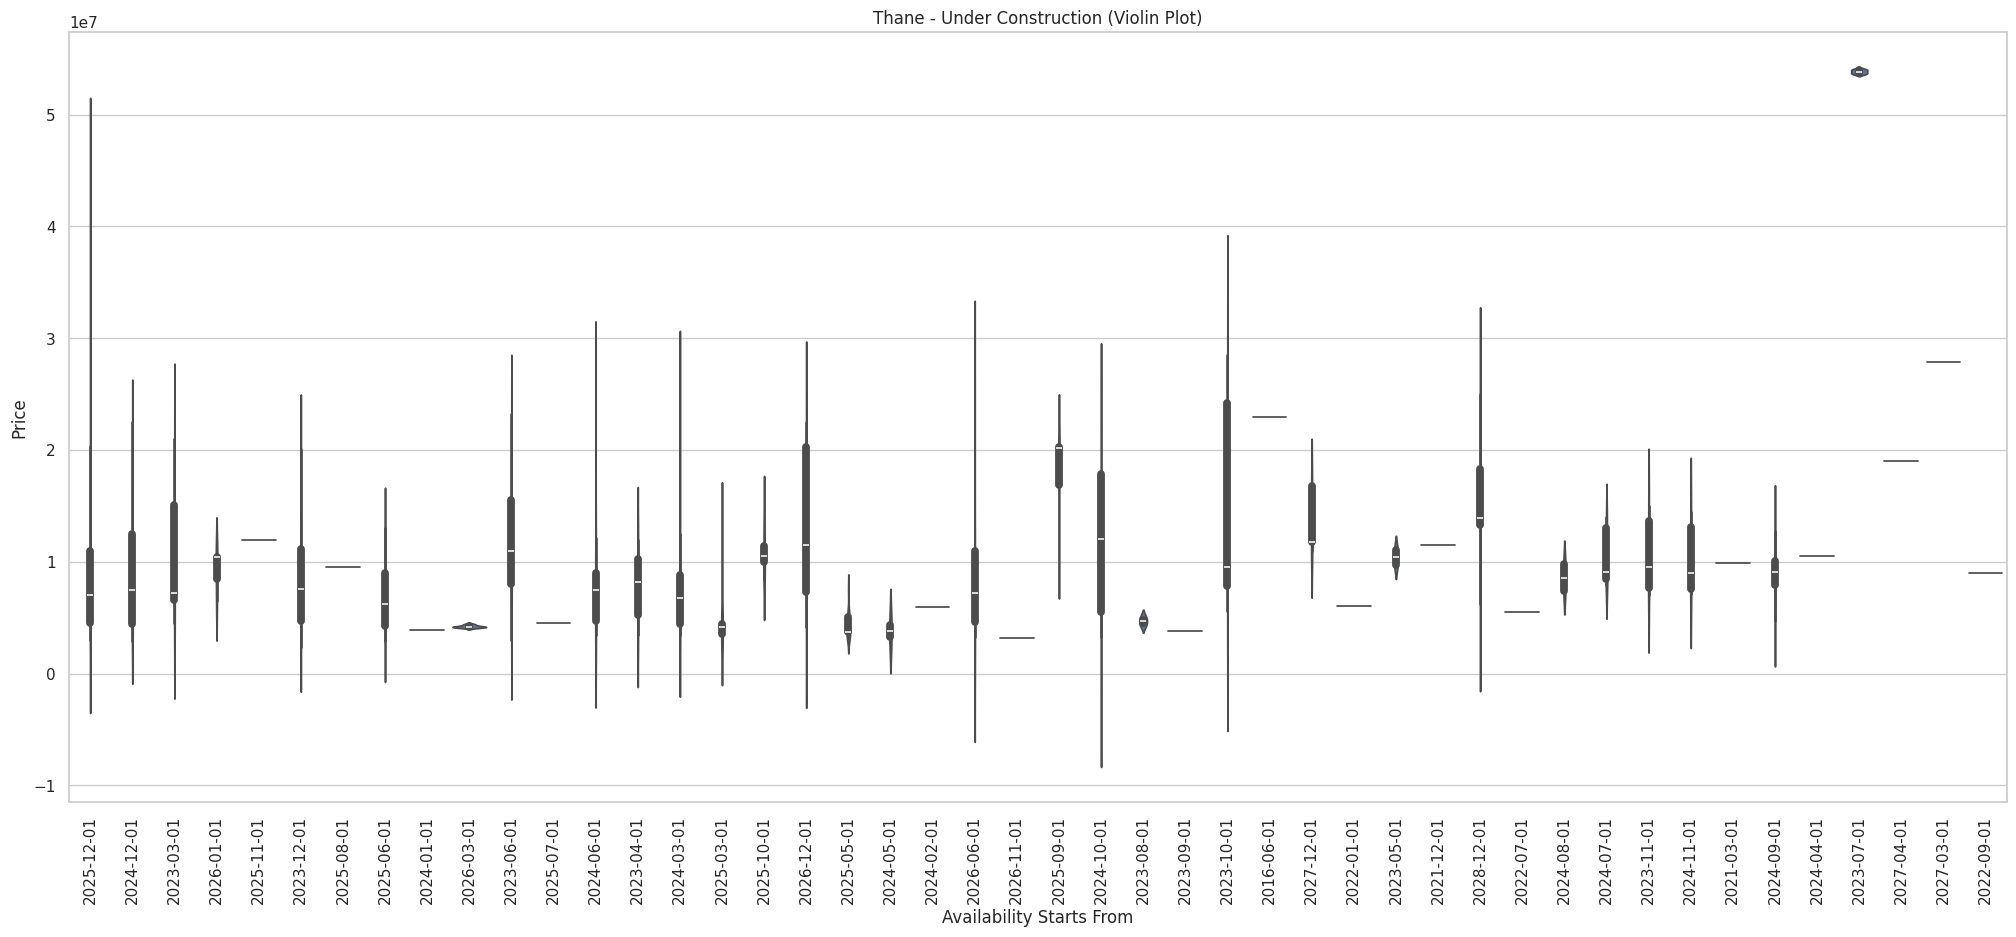

In [ ]:
# Define the combinations of City and Possession Status
combinations = [
    ('Mumbai', 'Ready to Move'),
    ('Mumbai', 'Under Construction'),
    ('Thane', 'Ready to Move'),
    ('Thane', 'Under Construction')
]

# Generate box and violin plots for each combination
for city, status in combinations:
    # Filter data for the current combination
    subset = df11[(df11['City'] == city) & (df11['Possession Status'] == status)]

    # Create box plot
    plt.figure(figsize=(25, 10))
    sns.boxplot(x='Availability Starts From', y='Price', data=subset)
    plt.title(f'{city} - {status} (Box Plot)')
    plt.xlabel('Availability Starts From')
    plt.ylabel('Price')
    plt.xticks(rotation=90)
    # plt.tight_layout()
    plt.show()

    # Create violin plot
    plt.figure(figsize=(25, 10))
    sns.violinplot(x='Availability Starts From', y='Price', data=subset)
    plt.title(f'{city} - {status} (Violin Plot)')
    plt.xlabel('Availability Starts From')
    plt.ylabel('Price')
    plt.xticks(rotation=90)
    # plt.tight_layout()
    plt.show()

6. Some investors are interested in knowing the hotspots for their offices in Mumbai and Thane. Analyze commercial properties in these cities, considering factors like Price, Carpet Area, Amenities, and Location.


In [ ]:
df12 = df9.copy()
df12 = df9[(df4['City'].isin(['Mumbai', 'Thane'])) & (df9['Type of Property'] == 'Builder Floor Apartment')]
print(df9['Type of Property'].unique())
print(df12)

['Apartment' 'Residential House' 'Builder Floor Apartment' 'Penthouse'
 'Villa']
          ID   Possession Status Availability Starts From  Floor No  \
100    12585       Ready to Move               2023-04-01         1   
106    12579       Ready to Move               2023-04-01         1   
160    12525       Ready to Move               2023-04-01         2   
270    12403       Ready to Move               2024-12-01         3   
273    12400       Ready to Move               2024-12-01         3   
...      ...                 ...                      ...       ...   
11738    465       Ready to Move               2026-12-01         3   
11802    401  Under Construction               2026-01-01         0   
11890    313       Ready to Move               2025-12-01         9   
11942    260       Ready to Move               2024-12-01         0   
12075    122       Ready to Move               2023-12-01         2   

       Commercial     Developer Approved Authority Name  Units Ava

In [ ]:
# Key metrics for analysis
metrics = ['Price', 'Carpet Area']

amenities = ['isPrimeLocationProperty', 'Power Back Up', 'Lift', 'Parking', 'Security', 'Air Conditioned', 'Visitor Parking', 'Intercom Facility', 'Maintenance Staff', 'Cafeteria/Food Court', 'Conference Room']


grouped = df12.groupby(['City', 'Location'])[metrics + amenities].agg({
    'Price': 'mean',
    'Carpet Area': 'mean',
    **{amenity: 'sum' for amenity in amenities}
}).reset_index()

grouped_sorted_by_price = grouped.sort_values(by='Price', ascending=False)

# Display the top locations by average price
print("Top Locations by Average Price:")
print(grouped_sorted_by_price.head(10))


Top Locations by Average Price:
      City                 Location       Price  Carpet Area  \
27  Mumbai        Sion West, Mumbai  65000000.0        600.0   
4   Mumbai       Dadar West, Mumbai  56250000.0       1055.0   
16  Mumbai     Marine Lines, Mumbai  55000000.0        900.0   
5   Mumbai            Danda, Mumbai  42500000.0        900.0   
7   Mumbai       Grant Road, Mumbai  40000000.0        700.0   
24  Mumbai   Santacruz East, Mumbai  30000000.0        650.0   
13  Mumbai       Mahim East, Mumbai  27000000.0        360.0   
22  Mumbai         Oshiwara, Mumbai  25000000.0        350.0   
17  Mumbai            Marol, Mumbai  22500000.0        675.0   
31  Mumbai  Vile Parle West, Mumbai  19050000.0        695.0   

    isPrimeLocationProperty  Power Back Up  Lift  Parking  Security  \
27                        2              0     0        0         0   
4                         1              0     1        0         0   
16                        1              1     1  

<ipython-input-48-9f0b47ce9cd9>:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


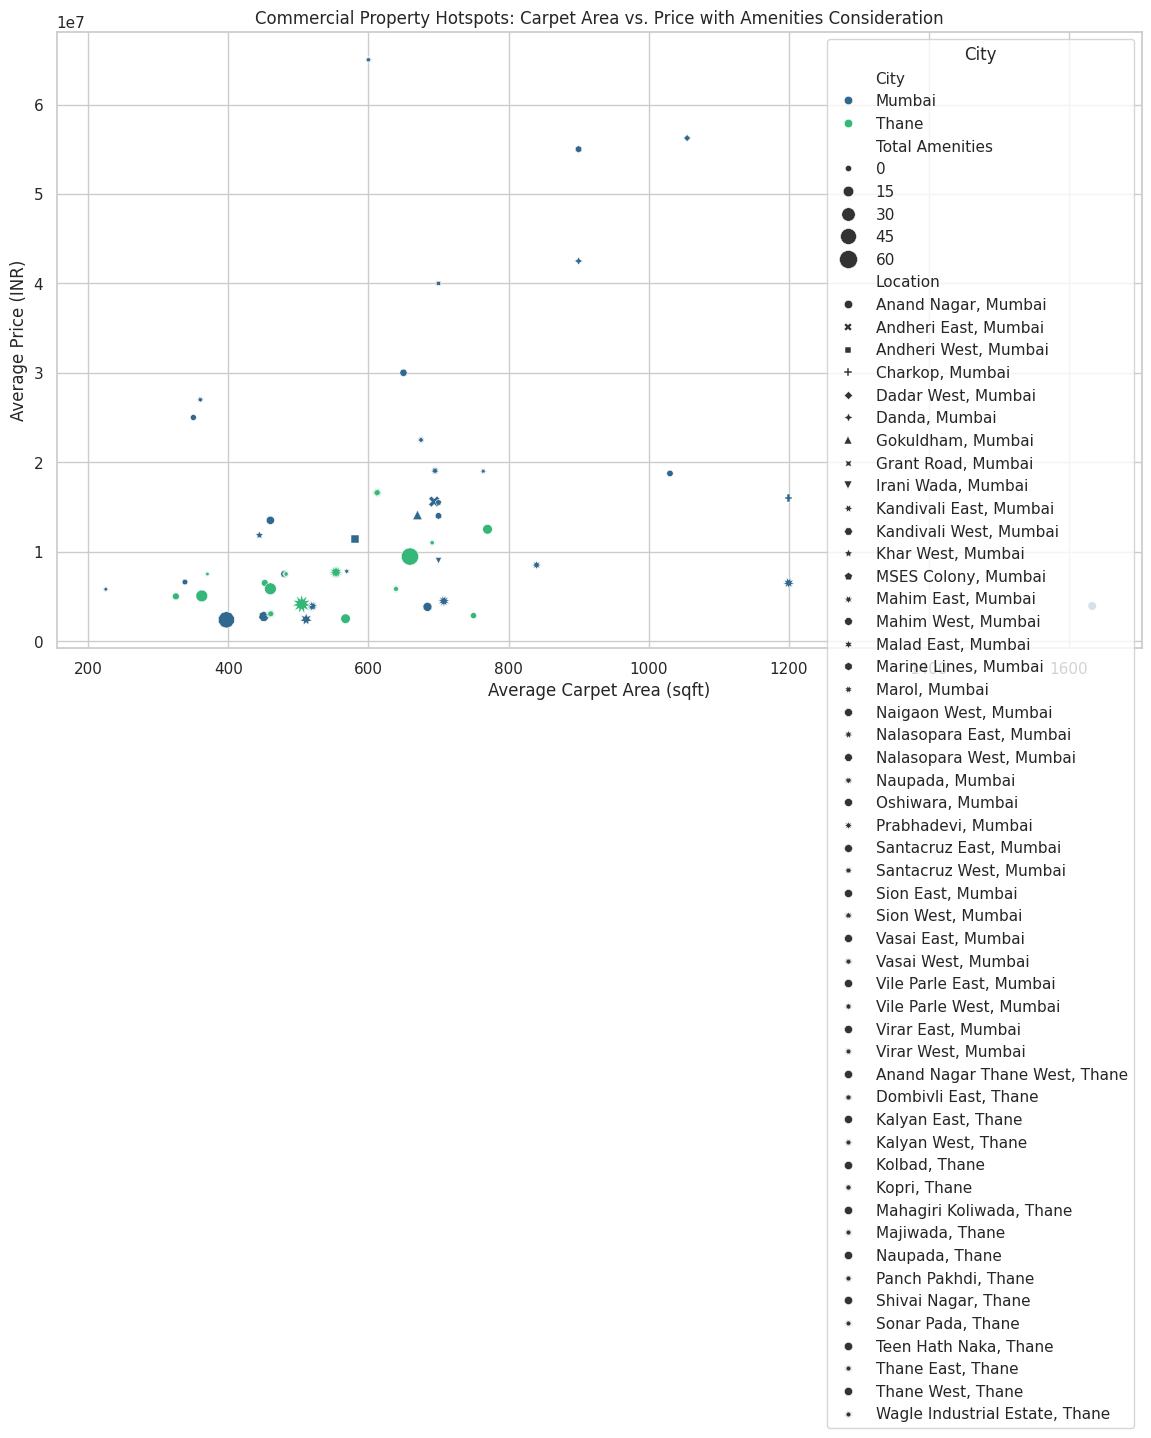

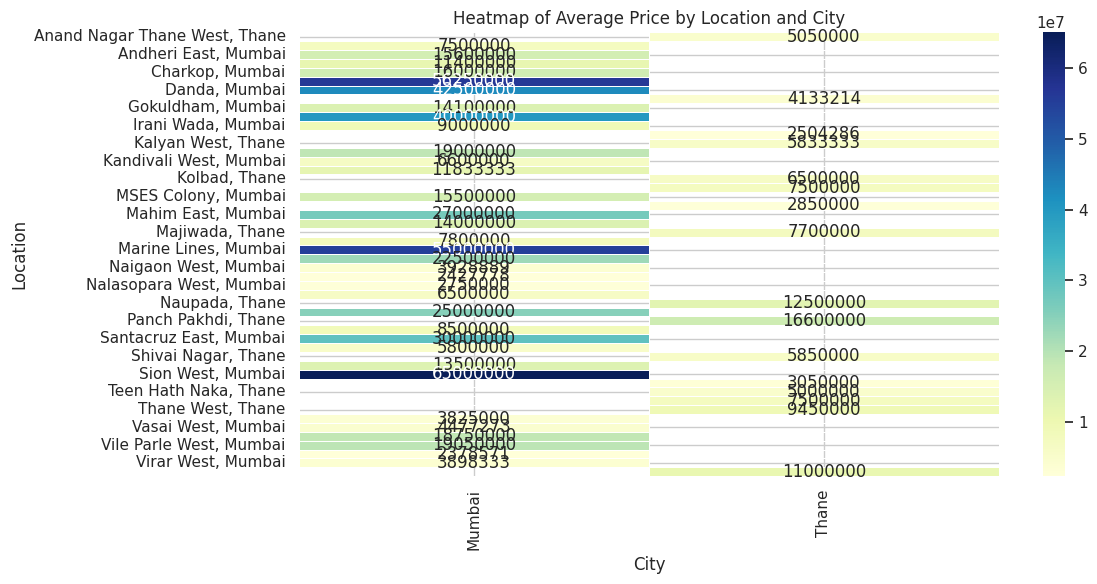

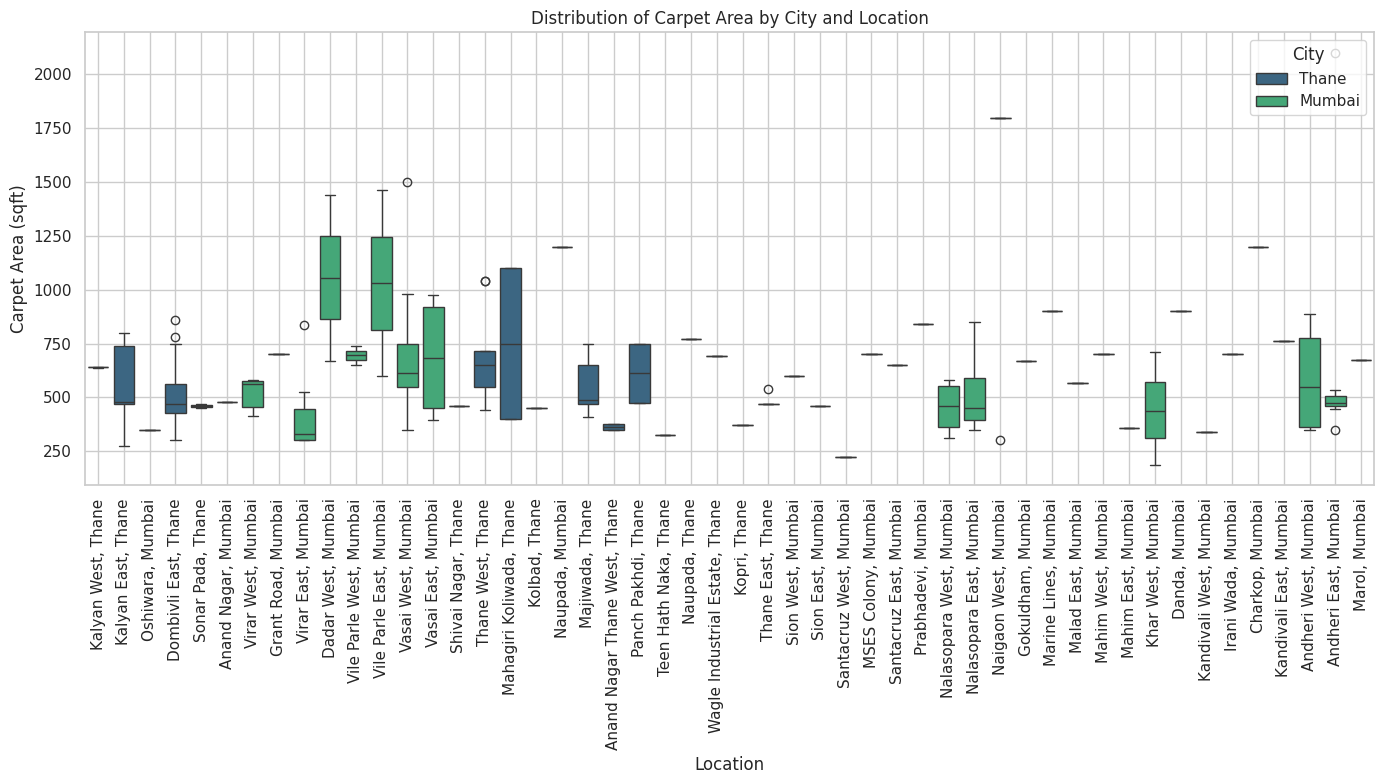

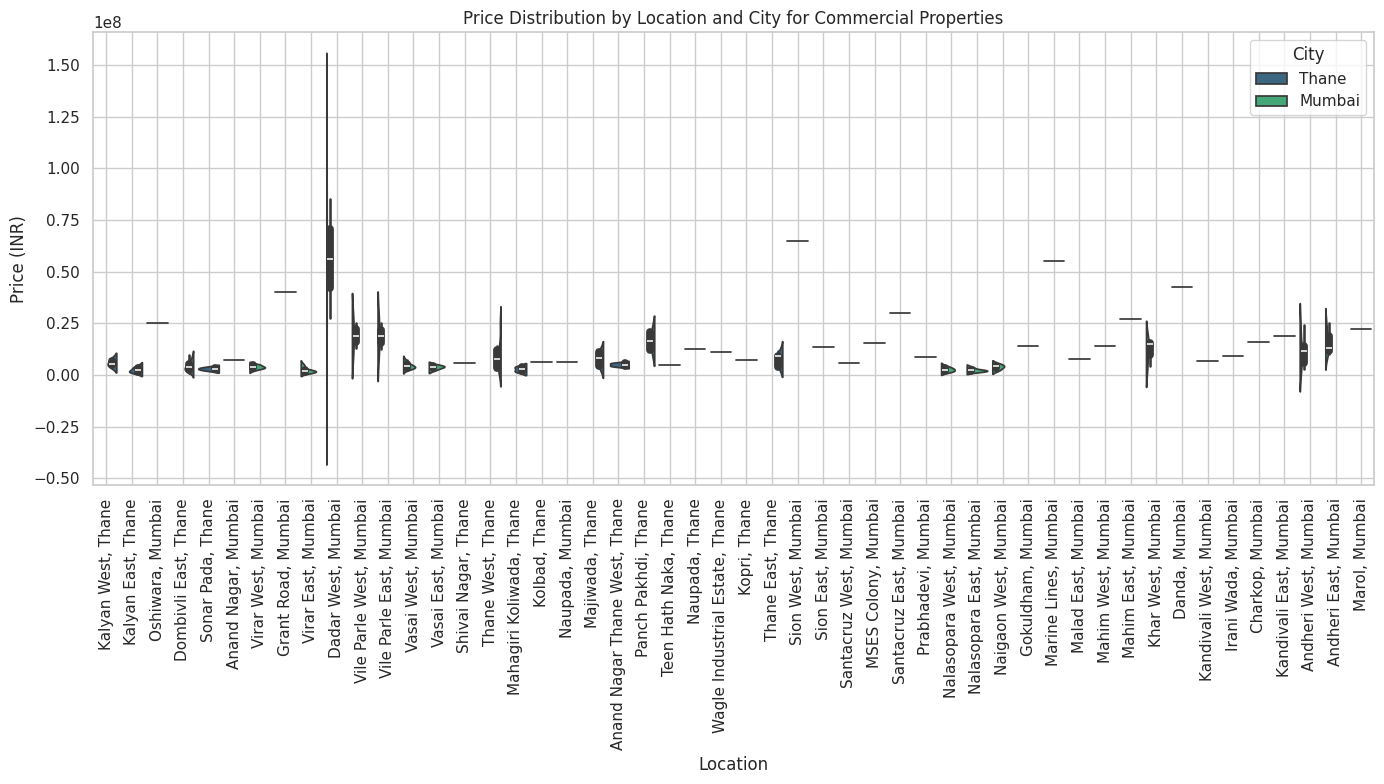

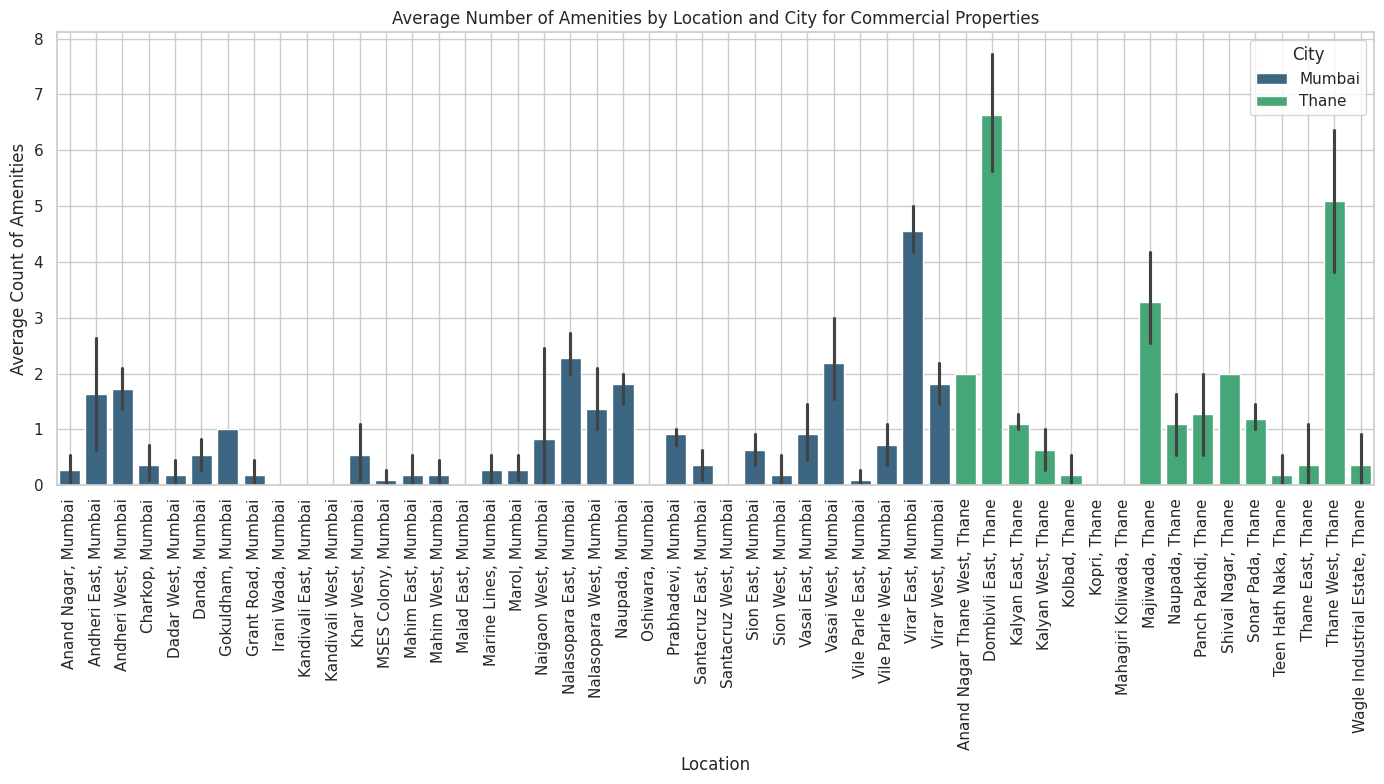

In [ ]:
plt.figure(figsize=(14, 8))
grouped['Total Amenities'] = grouped[amenities].sum(axis=1)
sns.scatterplot(
    data=grouped,
    x='Carpet Area',
    y='Price',
    hue='City',
    size='Total Amenities',
    sizes=(20, 200),
    palette='viridis',
    style='Location'
)
plt.title('Commercial Property Hotspots: Carpet Area vs. Price with Amenities Consideration')
plt.xlabel('Average Carpet Area (sqft)')
plt.ylabel('Average Price (INR)')
plt.legend(title='City', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualization 2: Heatmap of Price by Location and City, highlighting locations with most amenities
plt.figure(figsize=(12, 6))
heatmap_data = grouped.pivot(index='Location', columns='City', values='Price')
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap of Average Price by Location and City')
plt.xlabel('City')
plt.ylabel('Location')
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
plt.tight_layout()
plt.show()

# Visualization 3: Box plot of Carpet Area by City and Location
plt.figure(figsize=(14, 8))
sns.boxplot(data=df12, x='Location', y='Carpet Area', hue='City', palette='viridis')
plt.title('Distribution of Carpet Area by City and Location')
plt.xlabel('Location')
plt.ylabel('Carpet Area (sqft)')
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
plt.legend(title='City', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualization 4: Violin plot for Price distribution by City and Location, with hue based on Total Amenities
plt.figure(figsize=(14, 8))
sns.violinplot(data=df12, x='Location', y='Price', hue='City', split=True, palette='viridis')
plt.title('Price Distribution by Location and City for Commercial Properties')
plt.xlabel('Location')
plt.ylabel('Price (INR)')
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
plt.legend(title='City', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualization 5: Bar plot showing average number of amenities by location
plt.figure(figsize=(14, 8))
amenity_counts = grouped.melt(id_vars=['City', 'Location'], value_vars=amenities, var_name='Amenity', value_name='Count')
sns.barplot(data=amenity_counts, x='Location', y='Count', hue='City', palette='viridis')
plt.title('Average Number of Amenities by Location and City for Commercial Properties')
plt.xlabel('Location')
plt.ylabel('Average Count of Amenities')
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
plt.legend(title='City', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

9. Analyze the impact of developers on property prices and features. Are there certain developers associated with higher-end properties or better amenities?

In [ ]:
df13 = df9.copy()

In [ ]:
# Select numerical columns, ensuring 'Price' is included
numerical_features = df13.select_dtypes(include=['number']).columns.tolist()
numerical_features = [feature for feature in numerical_features if feature != 'Price']  # Exclude 'Price' from the list

# Include 'Developer' and 'Price'
columns_of_interest = ['Developer', 'Price'] + numerical_features
df13 = df13[columns_of_interest]

# Group by Developer and calculate mean values for Price and all other numerical features
grouped_developer = df13.groupby('Developer').agg({
    'Price': 'mean',
    **{feature: 'mean' for feature in numerical_features}
}).reset_index()

# Sort by average price to identify high-end developers
grouped_developer_sorted_by_price = grouped_developer.sort_values(by='Price', ascending=False)

<ipython-input-51-27f8c0339a1f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_developers, x='Price', y='Developer', palette='viridis')


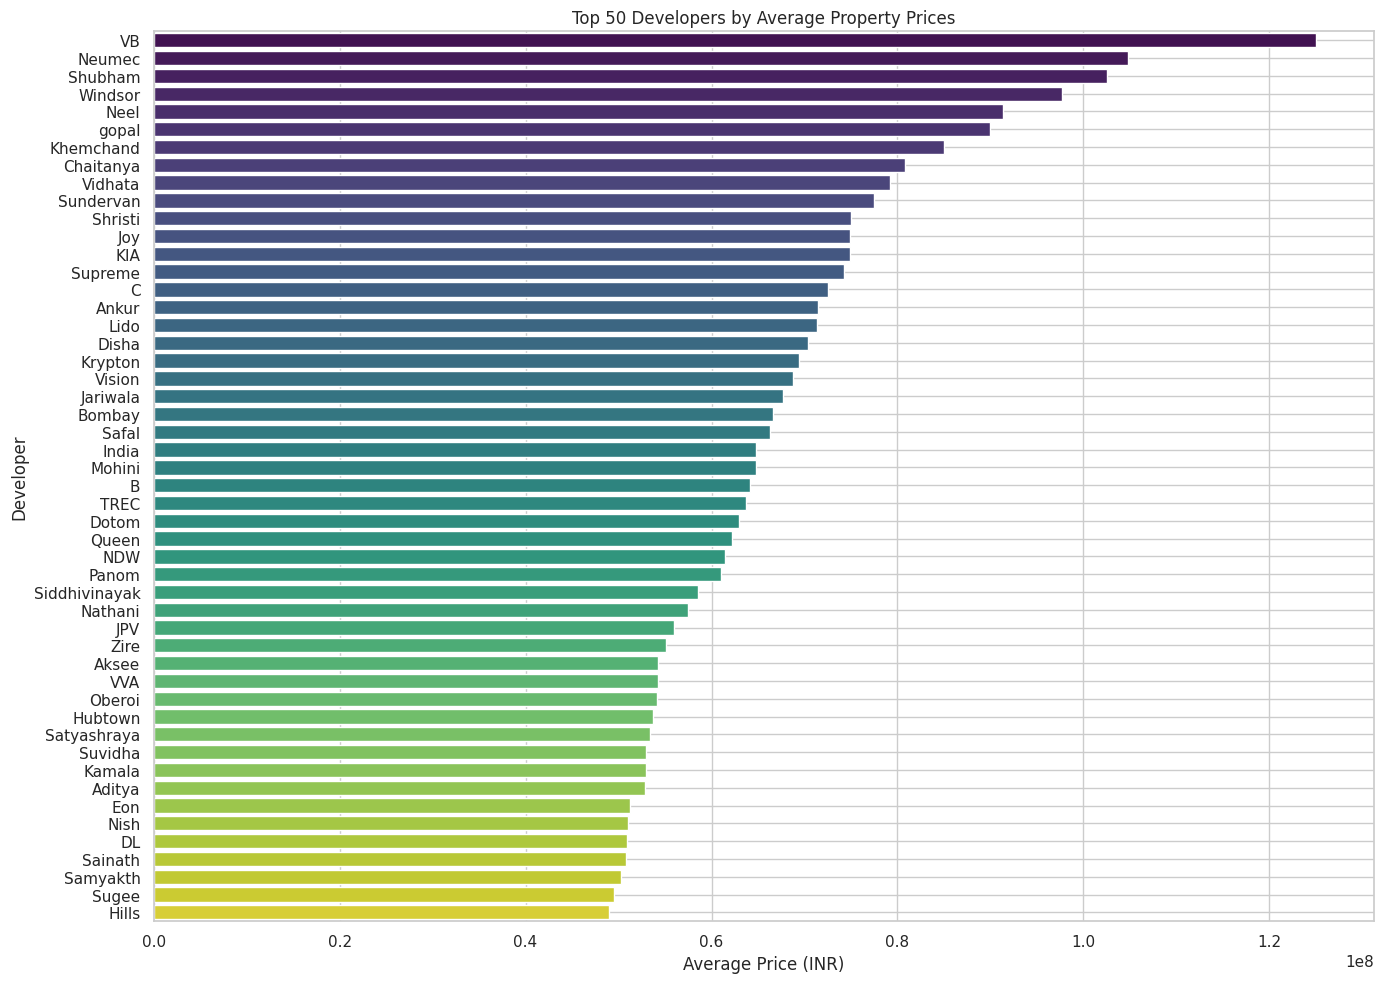

In [ ]:
top_n = 50  # Adjust this number based on how many top developers you want to show
top_developers = grouped_developer_sorted_by_price.head(top_n)

plt.figure(figsize=(14, 10))
sns.barplot(data=top_developers, x='Price', y='Developer', palette='viridis')
plt.title(f'Top {top_n} Developers by Average Property Prices')
plt.xlabel('Average Price (INR)')
plt.ylabel('Developer')
plt.grid(True)
plt.tight_layout()
plt.show()



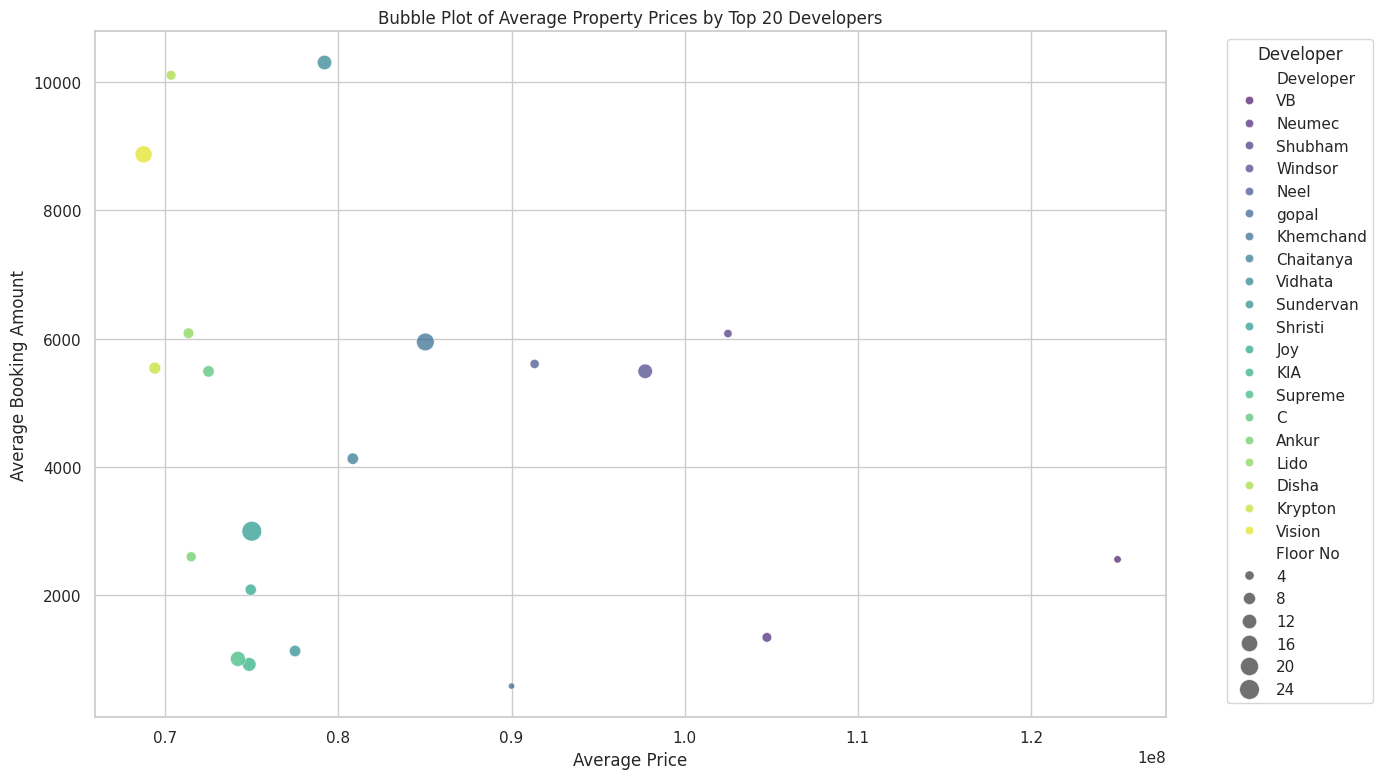

In [ ]:
# Bubble Plot of Average Property Prices by Developer
top_20_developers = grouped_developer_sorted_by_price.head(20)

# Create a bubble plot for these top 20 developers
plt.figure(figsize=(14, 8))
sns.scatterplot(data=top_20_developers, x='Price', y=numerical_features[0],
                size=numerical_features[1], sizes=(20, 200), hue='Developer', palette='viridis', alpha=0.7)
plt.title('Bubble Plot of Average Property Prices by Top 20 Developers')
plt.xlabel('Average Price')
plt.ylabel(f'Average {numerical_features[5]}')  # Change the index to plot different features
plt.legend(title='Developer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-53-7e695a4cd38b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_developer_sorted_by_price, x='Price', y='Developer', palette='viridis')


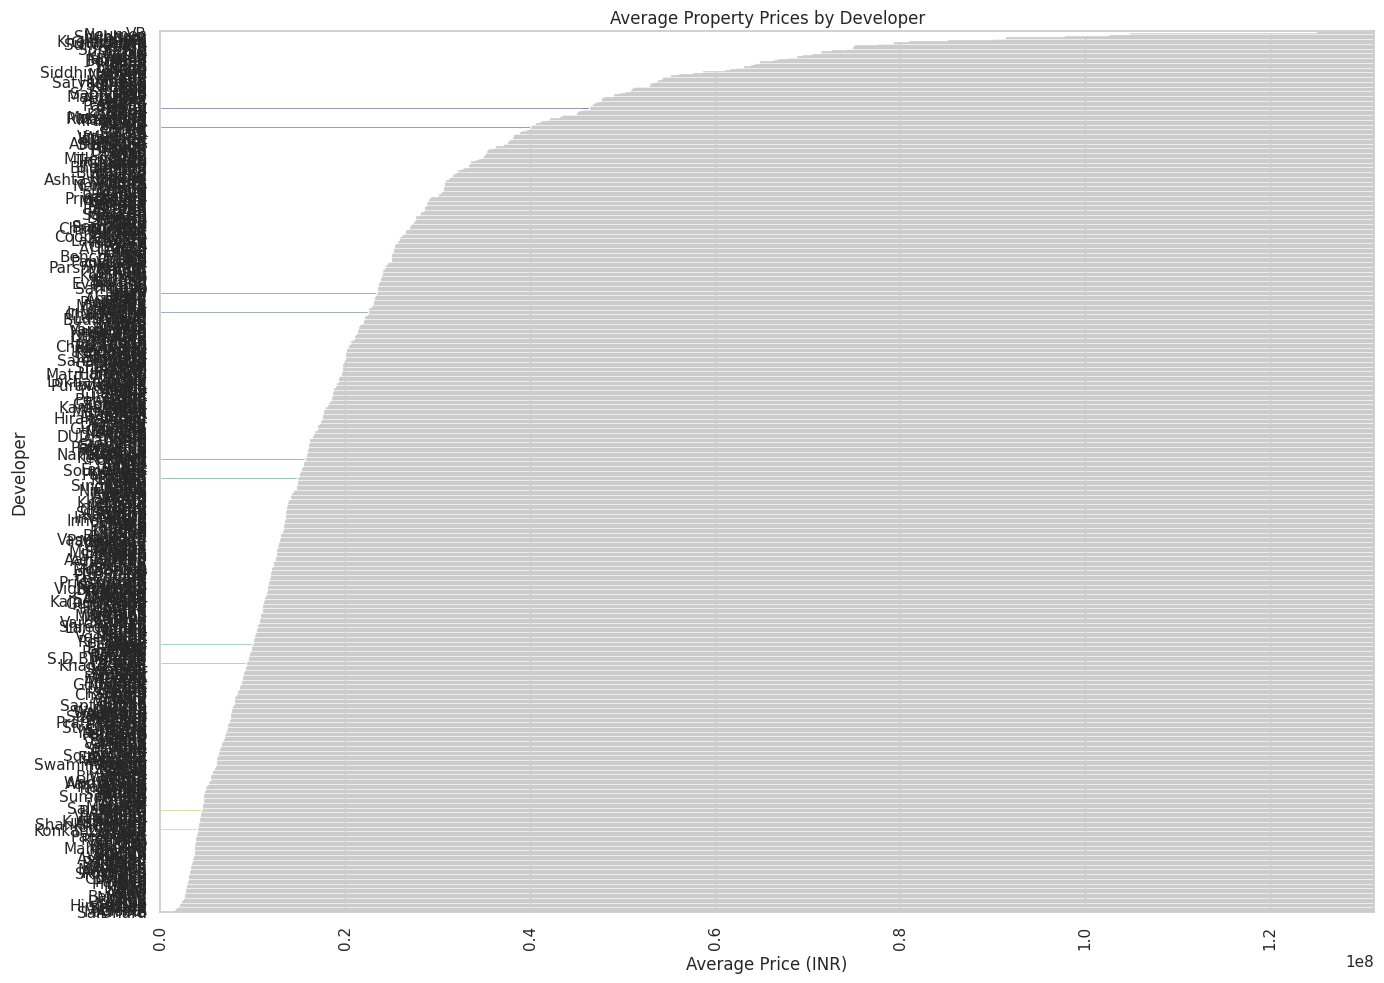

In [ ]:
plt.figure(figsize=(14, 10))
sns.barplot(data=grouped_developer_sorted_by_price, x='Price', y='Developer', palette='viridis')
plt.title('Average Property Prices by Developer')
plt.xlabel('Average Price (INR)')
plt.ylabel('Developer')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-54-6736855d5621>:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


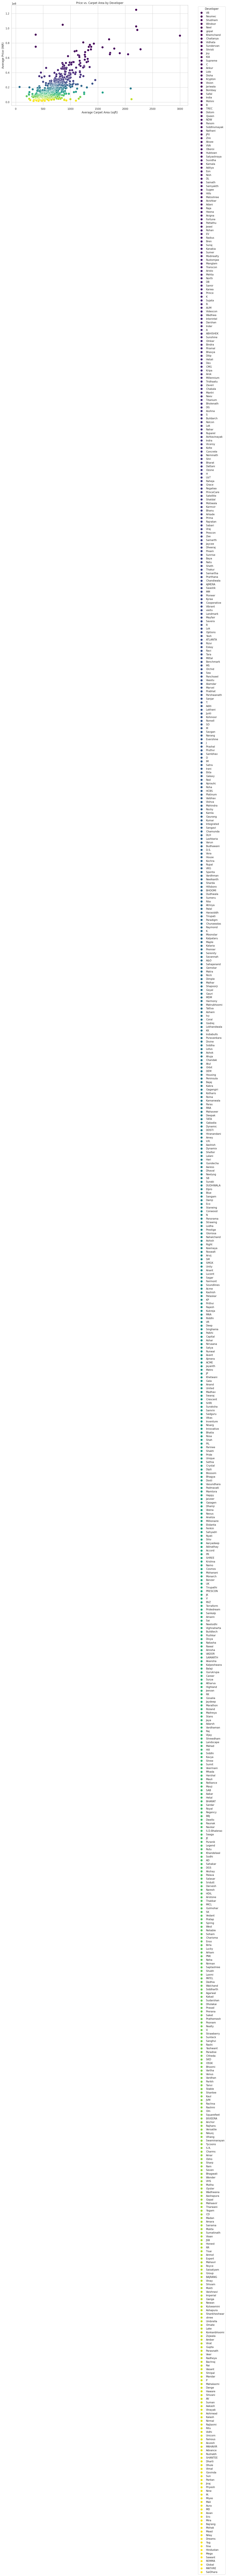

In [ ]:
if 'Carpet Area' in numerical_features:
    plt.figure(figsize=(14, 8))
    sns.scatterplot(data=grouped_developer_sorted_by_price, x='Carpet Area', y='Price', hue='Developer', palette='viridis', s=100)
    plt.title('Price vs. Carpet Area by Developer')
    plt.xlabel('Average Carpet Area (sqft)')
    plt.ylabel('Average Price (INR)')
    plt.legend(title='Developer', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Carpet Area is not a numerical feature in the dataset.")

<ipython-input-55-339840c1a329>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df13, x='Developer', y='Price', palette='viridis')


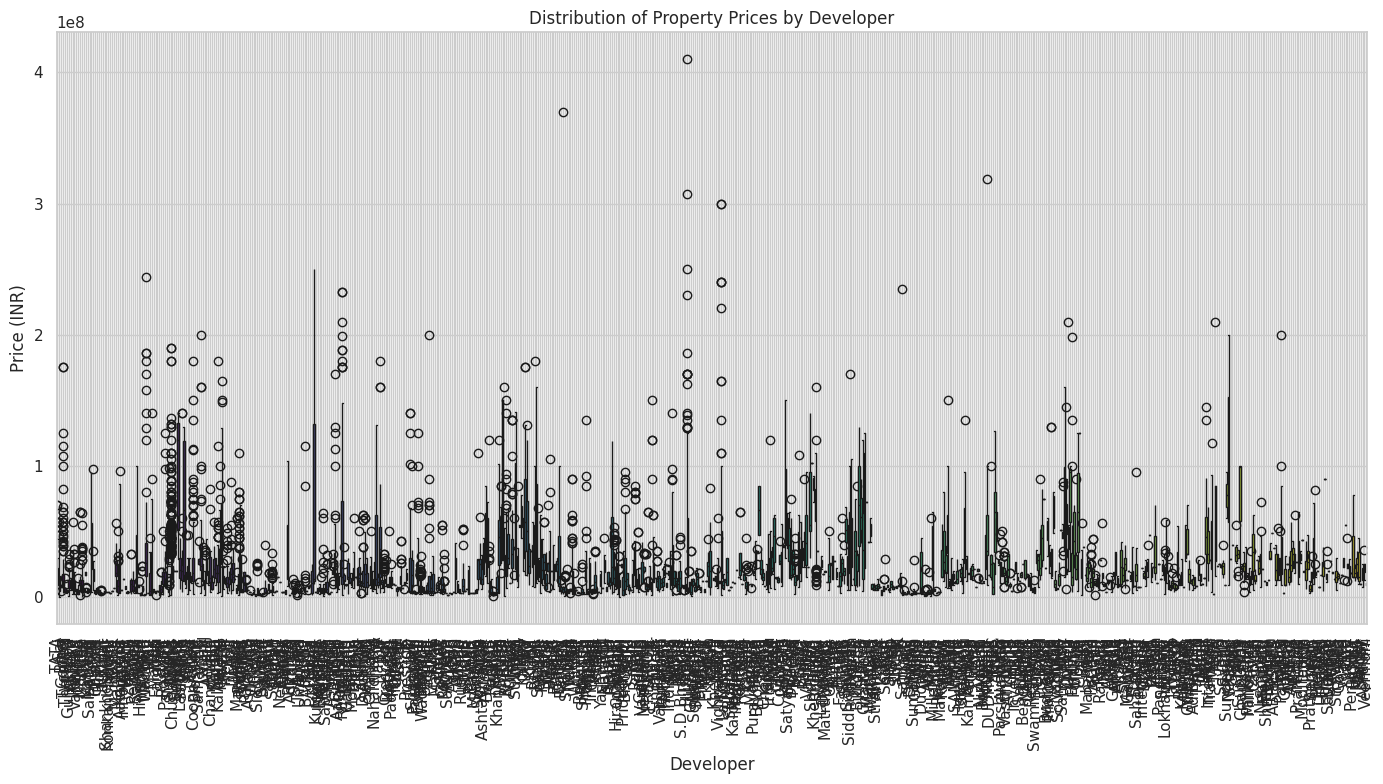

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df13, x='Developer', y='Price', palette='viridis')
plt.title('Distribution of Property Prices by Developer')
plt.xlabel('Developer')
plt.ylabel('Price (INR)')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()